## Comparison of Capacity Factor and Variability of Solar Enery for Some Libyan Cities

Data have already been downloaded and stored 

In [1]:
import os  # for getting environment variables
import pathlib  # for finding the example dataset
import pvlib
import pandas as pd  # for data wrangling
import matplotlib.pyplot as plt  # for visualization

from pvlib.iotools import get_pvgis_tmy
from pvlib import clearsky, solarposition, irradiance
import numpy as np

### Reading a TMY dataset 

In [2]:
import os
import pathlib  # for finding the example dataset
os.getcwd()
os.chdir("C:/Users/Mhdella/Desktop/TMY Libyan Cities")

In [3]:
cities=['Tripoli','Misurata','Sirte','Benghazi','Derna','Houn','Gadamis','Sabha','Kufra','Berlin']
df_dt=['df_Trip', 'df_Mis', 'df_Sirte', 'df_Beng', 'df_Derna', 'df_Houn', 'df_Gadam', 'df_Sabha', 'df_Kufra', 'df_Berlin']

for i in np.arange(len(cities)):
    
    data = pd.read_csv(cities[i]+'_get_pvgis_tmy.csv',index_col='time(UTC)')
    data_clearsky= pd.read_csv(cities[i]+'_get_clearsky.csv')
    data['cl_ghi']=data_clearsky['ghi'].values
    data['cl_dni']=data_clearsky['dni'].values
    data['cl_dhi']=data_clearsky['dhi'].values
    vars()[df_dt[i]] = data
    vars()[df_dt[i]].index=pd.to_datetime(vars()[df_dt[i]].index, format='%Y-%m-%d')

    vars()[df_dt[i]]['Year']=vars()[df_dt[i]].index.year
    vars()[df_dt[i]]['Month']=vars()[df_dt[i]].index.month
    vars()[df_dt[i]]['Day']=vars()[df_dt[i]].index.day
    vars()[df_dt[i]]['Hour']=vars()[df_dt[i]].index.hour
    vars()[df_dt[i]]['Year'] = 2021
    vars()[df_dt[i]].index=pd.to_datetime(df_Trip[['Year', 'Month', 'Day', 'Hour']])

# df_Berlin

In [4]:
cities=['Tripoli','Misurata','Sirte','Benghazi','Derna','Houn','Gadamis','Sabha','Kufra','Berlin']
df_dt=['df_Trip', 'df_Mis', 'df_Sirte', 'df_Beng', 'df_Derna', 'df_Houn', 'df_Gadam', 'df_Sabha', 'df_Kufra', 'df_Berlin']


df_tem=pd.DataFrame({'Tripoli':df_Trip['G(h)'].resample('M').sum()})
df_tem
for i in np.arange(len(cities)):
    df_tem[cities[i]]=vars()[df_dt[i]]['G(h)'].resample('M').sum()

ghi_comparison_and_Berlin=df_tem

ghi_comparison_and_Berlin.describe()

Tripoli       Misurata          Sirte       Benghazi  \
count      12.000000      12.000000      12.000000      12.000000   
mean   170965.337500  176413.137500  177637.070833  170496.045833   
std     57096.312586   57031.592821   57643.394637   59999.303919   
min     90866.200000   98449.850000  100587.000000   92463.250000   
25%    118622.612500  121392.800000  123702.737500  114400.312500   
50%    176399.450000  182762.100000  189114.500000  178027.000000   
75%    224629.037500  234075.137500  229552.525000  213805.787500   
max    250964.200000  255145.000000  256146.650000  256634.950000   

               Derna           Houn        Gadamis          Sabha  \
count      12.000000      12.000000      12.000000      12.000000   
mean   166653.966667  190454.375000  189731.275000  191935.554167   
std     64280.799826   52444.226778   52905.030968   49274.130556   
min     74532.000000  114965.050000  114487.800000  121941.250000   
25%    107231.587500  133464.500000  135328.500000  137611.250000   
50%    175930.775000  200145.625000  201793.100000  196819.650000   
75%    231589.500000  234531.550000  235969.012500  240172.537500   
max    253433.850000  259247.350000  259026.000000  256691.000000   

               Kufra         Berlin  
count      12.000000      12.000000  
mean   204133.337500   91774.829167  
std     41149.192607   62209.568367  
min    144407.000000   15628.900000  
25%    161048.225000   37218.425000  
50%    214395.275000   82916.000000  
75%    235536.962500  149575.000000  
max    258233.250000  182560.550000

In [5]:
ghi_comparison_and_Berlin.index=ghi_comparison_and_Berlin.index.month

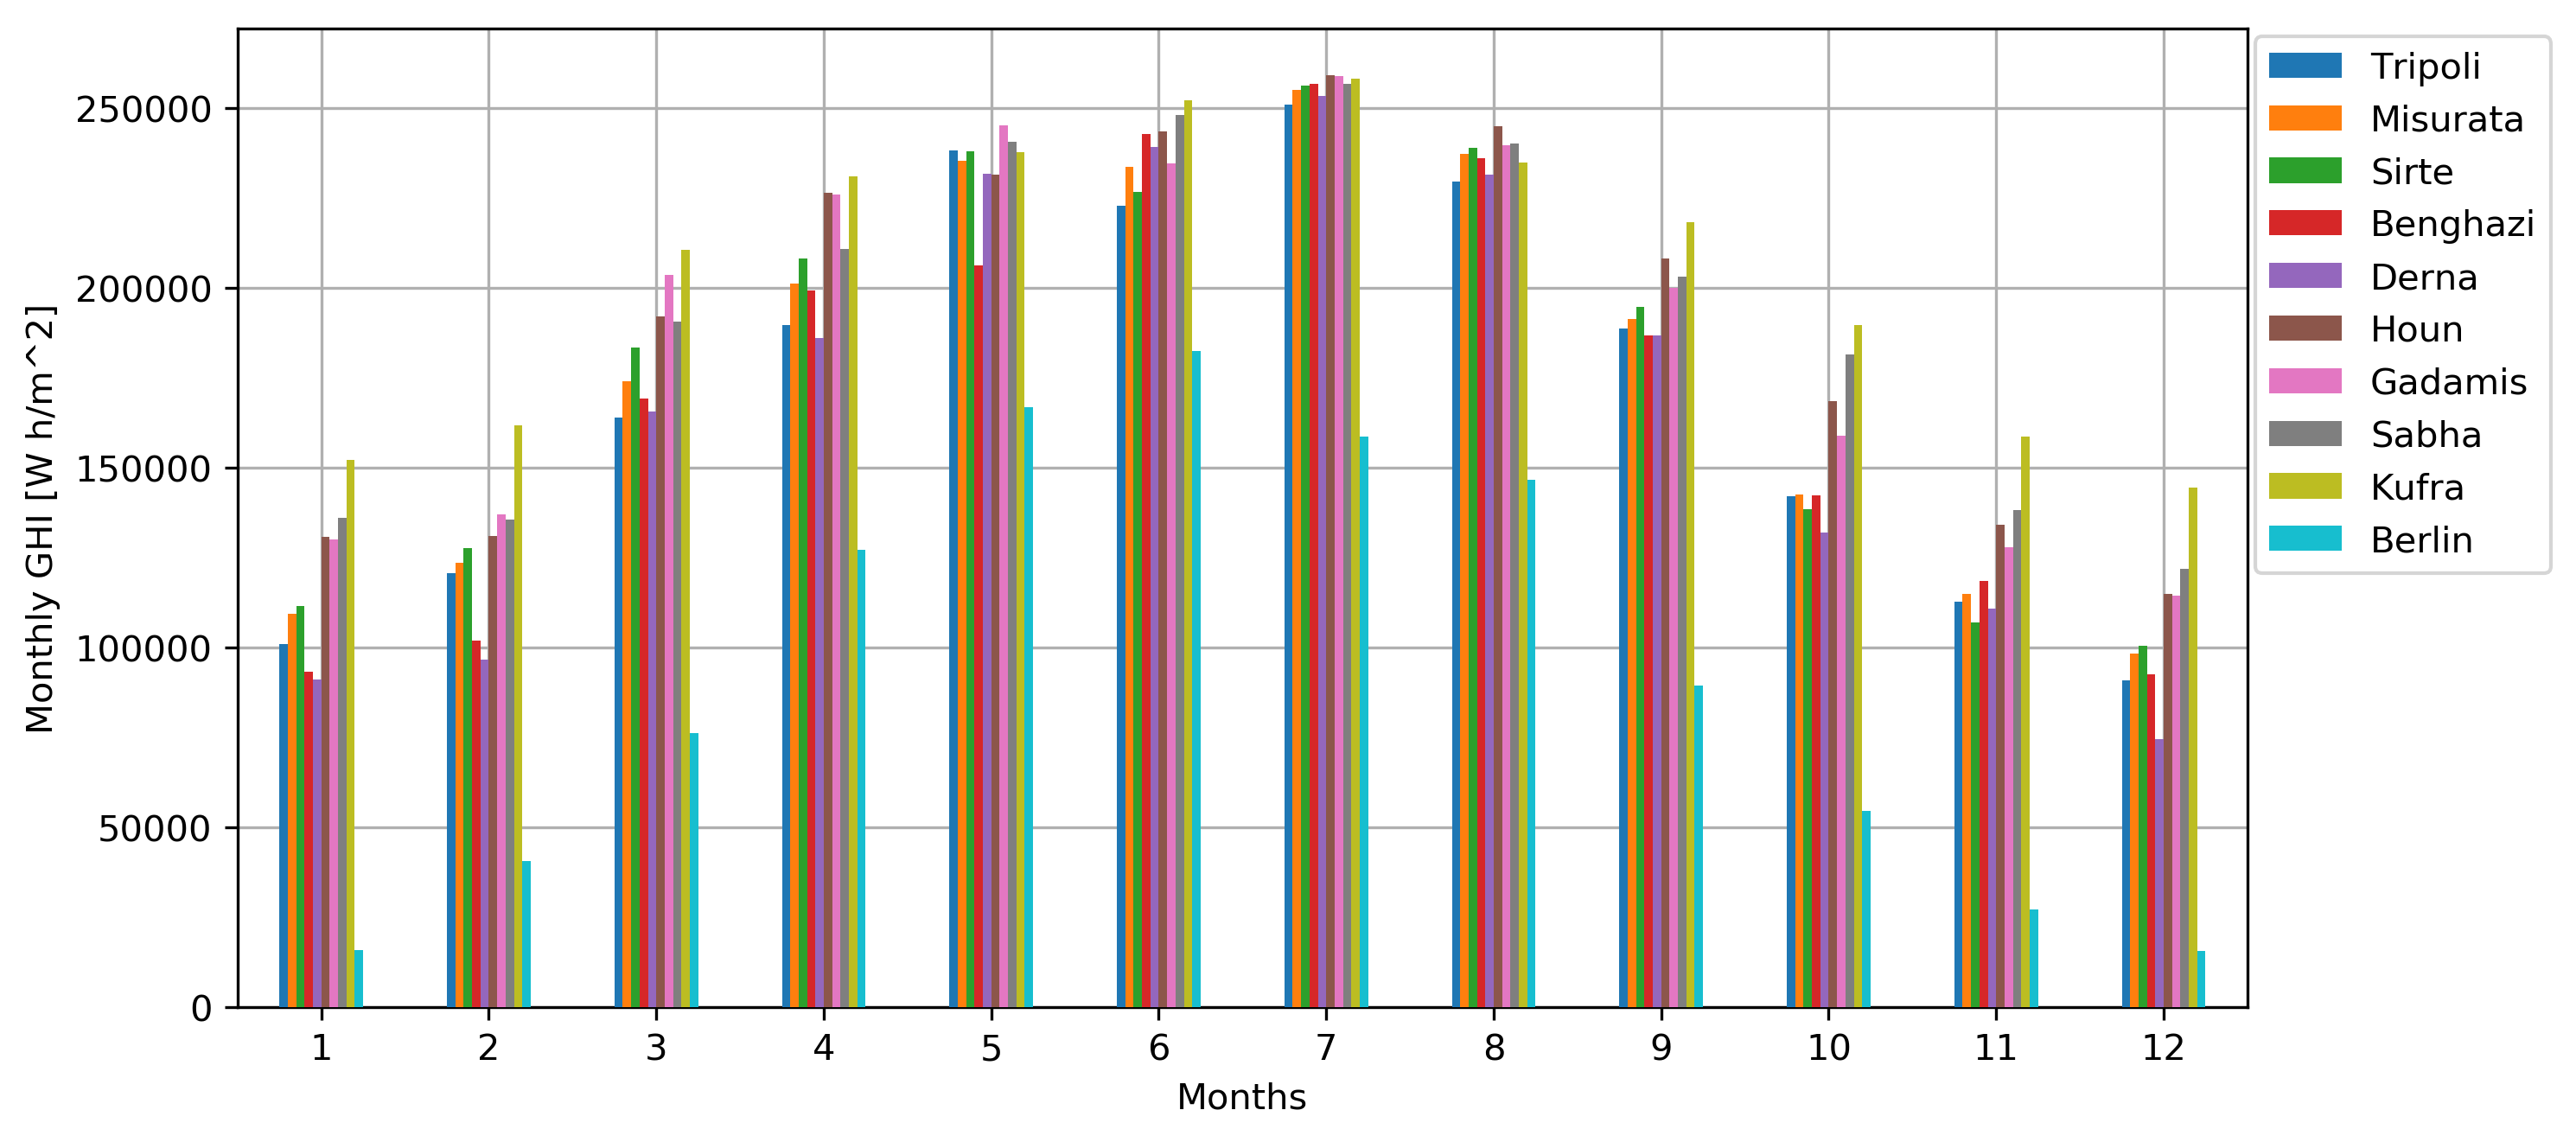

In [6]:
plt.rcParams['figure.figsize'] = [10, 5.0]
plt.rcParams['figure.dpi'] = 300

ghi_comparison_and_Berlin.plot.bar(zorder=3)
# plt.bar(ghi_comparison_and_Berlin)
# plt.xticks(ghi_comparison_and_Berlin.index)
plt.xticks(rotation=0)
plt.xlabel('Months');
plt.ylabel('Monthly GHI [W h/m^2]');
plt.legend(bbox_to_anchor=(1.16, 1.01),loc='upper right')
plt.grid()

# print(ghi_comparison_and_Berlin.describe())

In [7]:
ghi_comparison= pd.DataFrame({
#     'Tripoli': df_Trip['G(h)'].resample('M').sum(),
    'Misurata': df_Mis['G(h)'].resample('M').sum(),
#     'Sirte': df_Sirte['G(h)'].resample('M').sum(),
#     'Benghazi': df_Beng['G(h)'].resample('M').sum(),
#     'Derna': df_Derna['G(h)'].resample('M').sum(),
#     'Houn': df_Houn['G(h)'].resample('M').sum(),
#     'Gadamis': df_Gadam['G(h)'].resample('M').sum(),
#     'Sabha': df_Sabha['G(h)'].resample('M').sum(),
#     'Kufra': df_Kufra['G(h)'].resample('M').sum(),
    'Berlin': df_Berlin['G(h)'].resample('M').sum(),
})

In [8]:
ghi_comparison.index=ghi_comparison.index.month

            Misurata         Berlin
count      12.000000      12.000000
mean   176413.137500   91774.829167
std     57031.592821   62209.568367
min     98449.850000   15628.900000
25%    121392.800000   37218.425000
50%    182762.100000   82916.000000
75%    234075.137500  149575.000000
max    255145.000000  182560.550000


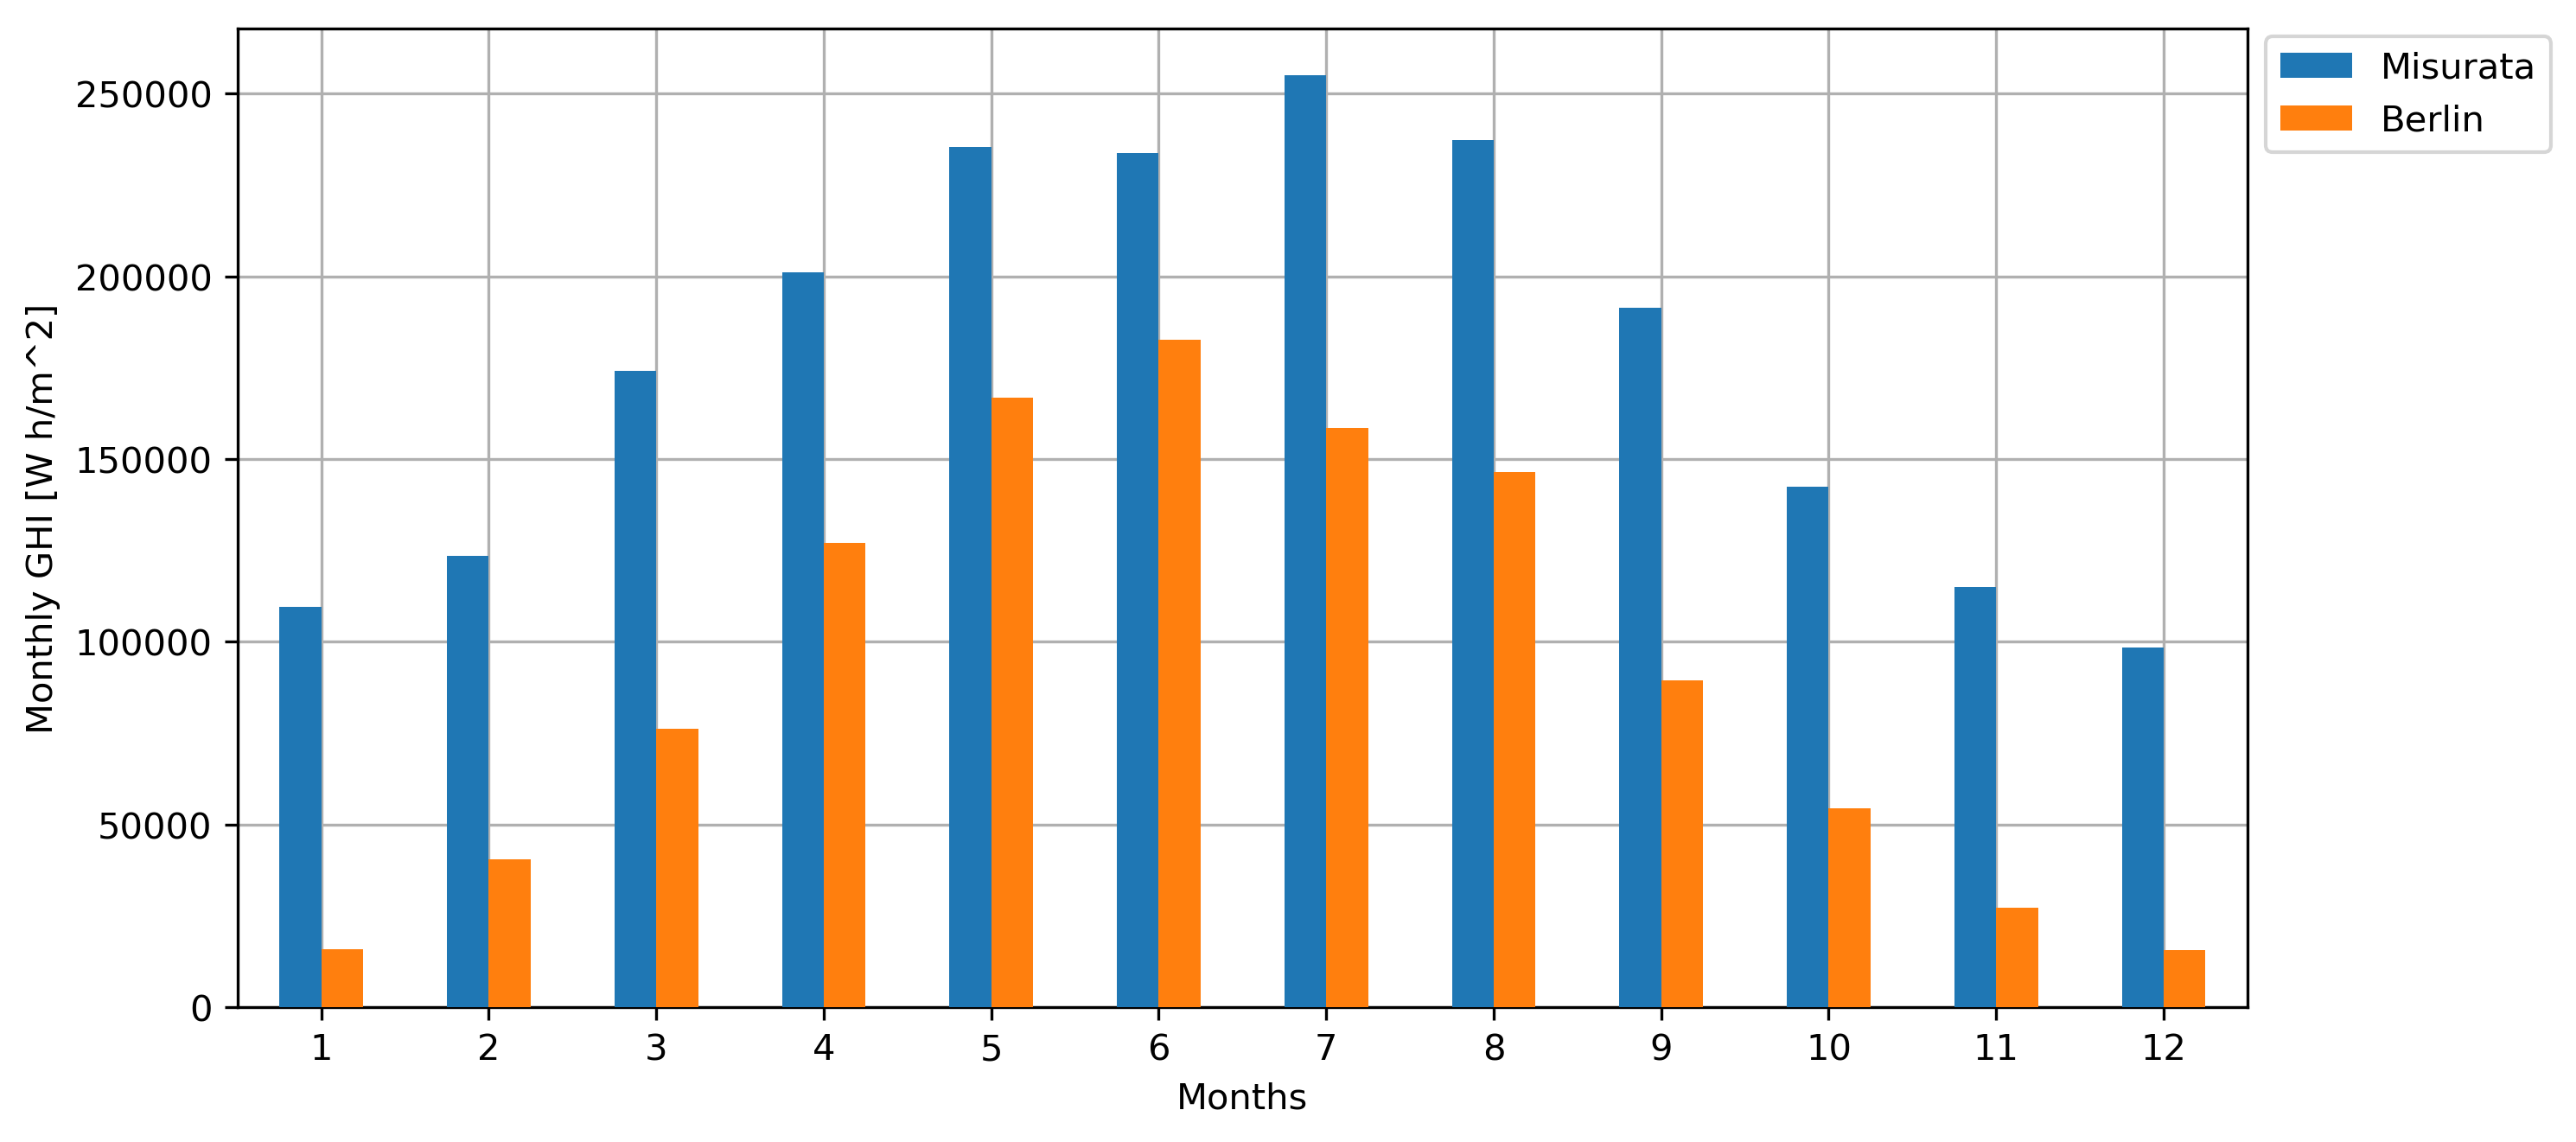

In [9]:
plt.rcParams['figure.figsize'] = [10, 5.0]
plt.rcParams['figure.dpi'] = 300

ghi_comparison.plot.bar(zorder=3)
# plt.bar(ghi_comparison)
# plt.xticks(ghi_comparison.index)
plt.xticks(rotation=0)
plt.xlabel('Months');
plt.ylabel('Monthly GHI [W h/m^2]');
plt.legend(bbox_to_anchor=(1.16, 1.01),loc='upper right')
plt.grid()

print(ghi_comparison.describe())

### Compare monthly DNI for some Libyan locations:

In [10]:
from matplotlib.pyplot import figure

cities=['Tripoli','Misurata','Sirte','Benghazi','Derna','Houn','Gadamis','Sabha','Kufra','Berlin']
df_dt=['df_Trip', 'df_Mis', 'df_Sirte', 'df_Beng', 'df_Derna', 'df_Houn', 'df_Gadam', 'df_Sabha', 'df_Kufra', 'df_Berlin']


df_tem=pd.DataFrame({'Tripoli':df_Trip['Gb(n)'].resample('M').sum()})
df_tem
for i in np.arange(len(cities)):
    df_tem[cities[i]]=vars()[df_dt[i]]['Gb(n)'].resample('M').sum()

dni_comparison_and_Berlin=df_tem

dni_comparison_and_Berlin.describe()


Tripoli       Misurata          Sirte       Benghazi  \
count      12.000000      12.000000      12.000000      12.000000   
mean   189332.666667  193701.401667  193241.196667  187382.380000   
std     43144.647956   43830.259222   47092.053510   54672.540787   
min    133866.620000  141108.580000  131825.290000  108636.020000   
25%    157665.985000  154384.337500  149859.270000  155855.310000   
50%    174106.345000  189058.000000  203278.530000  187803.150000   
75%    219102.665000  226803.422500  221665.402500  214177.822500   
max    264091.660000  268236.330000  267209.640000  278319.270000   

               Derna           Houn        Gadamis          Sabha  \
count      12.000000      12.000000      12.000000      12.000000   
mean   175859.345833  212114.911667  217854.295000  217250.583333   
std     61571.163930   36065.562416   32540.096528   32881.728701   
min     90366.200000  148820.370000  169733.920000  169385.240000   
25%    134312.300000  192782.980000  188163.167500  194804.980000   
50%    167370.895000  208290.630000  218473.110000  212099.665000   
75%    225168.332500  233895.997500  241966.095000  235302.637500   
max    278329.240000  270300.600000  272030.230000  276311.100000   

               Kufra        Berlin  
count      12.000000      12.00000  
mean   230757.025833   87936.20250  
std     22293.366472   47866.83539  
min    191810.290000   21871.11000  
25%    217795.755000   56281.67750  
50%    233032.325000   75147.65000  
75%    240676.892500  124970.21750  
max    270335.360000  161330.34000

In [11]:
dni_comparison_and_Berlin.index=dni_comparison_and_Berlin.index.month

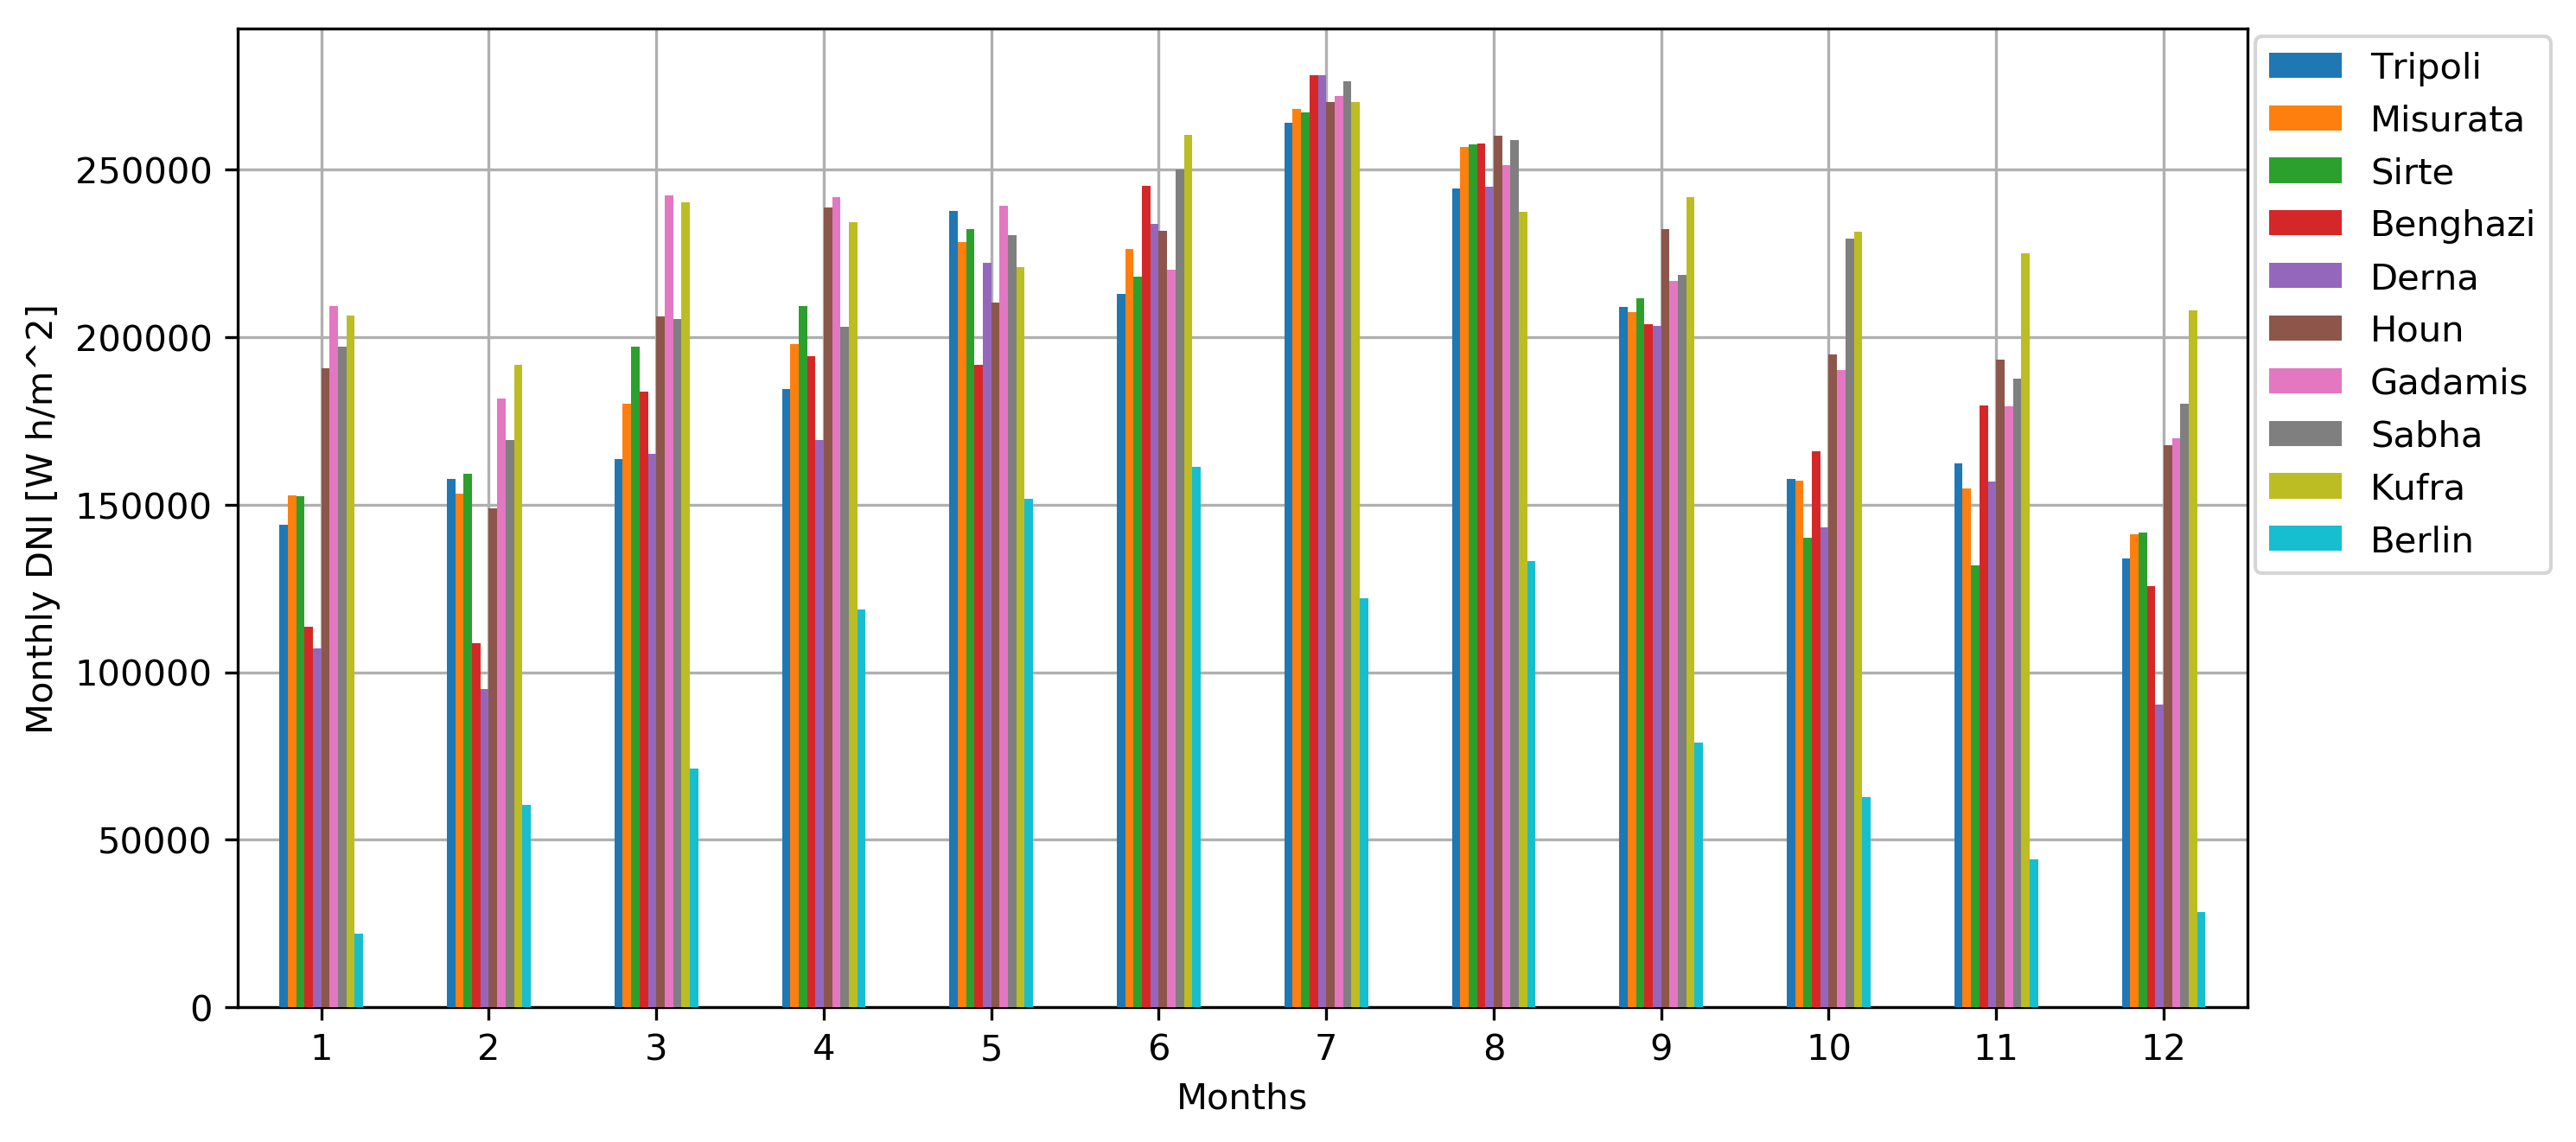

In [12]:
plt.rcParams['figure.figsize'] = [10, 5.0]
plt.rcParams['figure.dpi'] = 300

dni_comparison_and_Berlin.plot.bar(zorder=3)
plt.xticks(rotation=0)
plt.xlabel('Months');
plt.ylabel('Monthly DNI [W h/m^2]');
plt.legend(bbox_to_anchor=(1.16, 1.01),loc='upper right')
plt.grid()

In [13]:
# print(dni_comparison_and_Berlin.describe())

### Compare monthly RI (Infrared or Thermal Irradiance) for some Libyan locations:
IR(h): Surface infrared (thermal) irradiance on a horizontal plane (W/m2)

In [14]:
cities=['Tripoli','Misurata','Sirte','Benghazi','Derna','Houn','Gadamis','Sabha','Kufra','Berlin']
df_dt=['df_Trip', 'df_Mis', 'df_Sirte', 'df_Beng', 'df_Derna', 'df_Houn', 'df_Gadam', 'df_Sabha', 'df_Kufra', 'df_Berlin']


df_tem=pd.DataFrame({'Tripoli':df_Trip['IR(h)'].resample('M').sum()})
df_tem
for i in np.arange(len(cities)):
    df_tem[cities[i]]=vars()[df_dt[i]]['IR(h)'].resample('M').sum()

IR_comparison=df_tem

# IR_comparison.describe()
IR_comparison

Tripoli   Misurata      Sirte   Benghazi      Derna       Houn  \
2021-01-31  208052.76  223117.39  220060.47  220304.60  224434.49  199202.93   
2021-02-28  180775.39  196385.51  194594.90  206411.18  199188.11  198310.25   
2021-03-31  229302.37  224224.06  228798.74  234027.01  233306.53  225866.21   
2021-04-30  236349.28  238970.52  235809.73  238813.37  236990.11  224826.32   
2021-05-31  257077.98  258356.38  258233.62  278213.82  265523.26  270672.48   
2021-06-30  275403.41  275811.07  276387.56  280039.68  264632.36  266625.80   
2021-07-31  286592.10  285098.25  284109.92  295726.77  287386.81  270359.11   
2021-08-31  285573.22  286932.29  287506.42  294742.65  286743.66  270629.42   
2021-09-30  269311.53  274541.95  278315.21  281981.07  267690.77  254884.43   
2021-10-31  256765.01  268551.04  263067.63  268479.37  267830.04  260094.04   
2021-11-30  225916.27  237188.80  236639.09  234678.03  236321.98  220572.96   
2021-12-31  212726.88  224498.37  222044.22  226708.01  224772.30  211057.47   

              Gadamis      Sabha      Kufra     Berlin  
2021-01-31  210230.66  204997.71  200029.40  205280.23  
2021-02-28  173790.41  201888.82  199851.30  188617.42  
2021-03-31  219280.90  239379.97  227504.17  205565.89  
2021-04-30  229200.50  246815.31  227957.68  203897.81  
2021-05-31  251600.90  264598.93  264543.25  244775.70  
2021-06-30  277285.40  263120.34  259823.18  242364.97  
2021-07-31  278793.61  276921.80  271182.96  262494.84  
2021-08-31  279054.43  278833.40  292281.96  257763.94  
2021-09-30  269962.17  272086.87  253309.25  235343.38  
2021-10-31  263994.25  245288.75  246338.86  240785.41  
2021-11-30  220763.10  228410.87  212613.32  218591.13  
2021-12-31  209760.88  214399.56  204649.69  218562.21

In [15]:
IR_comparison.index=IR_comparison.index.month

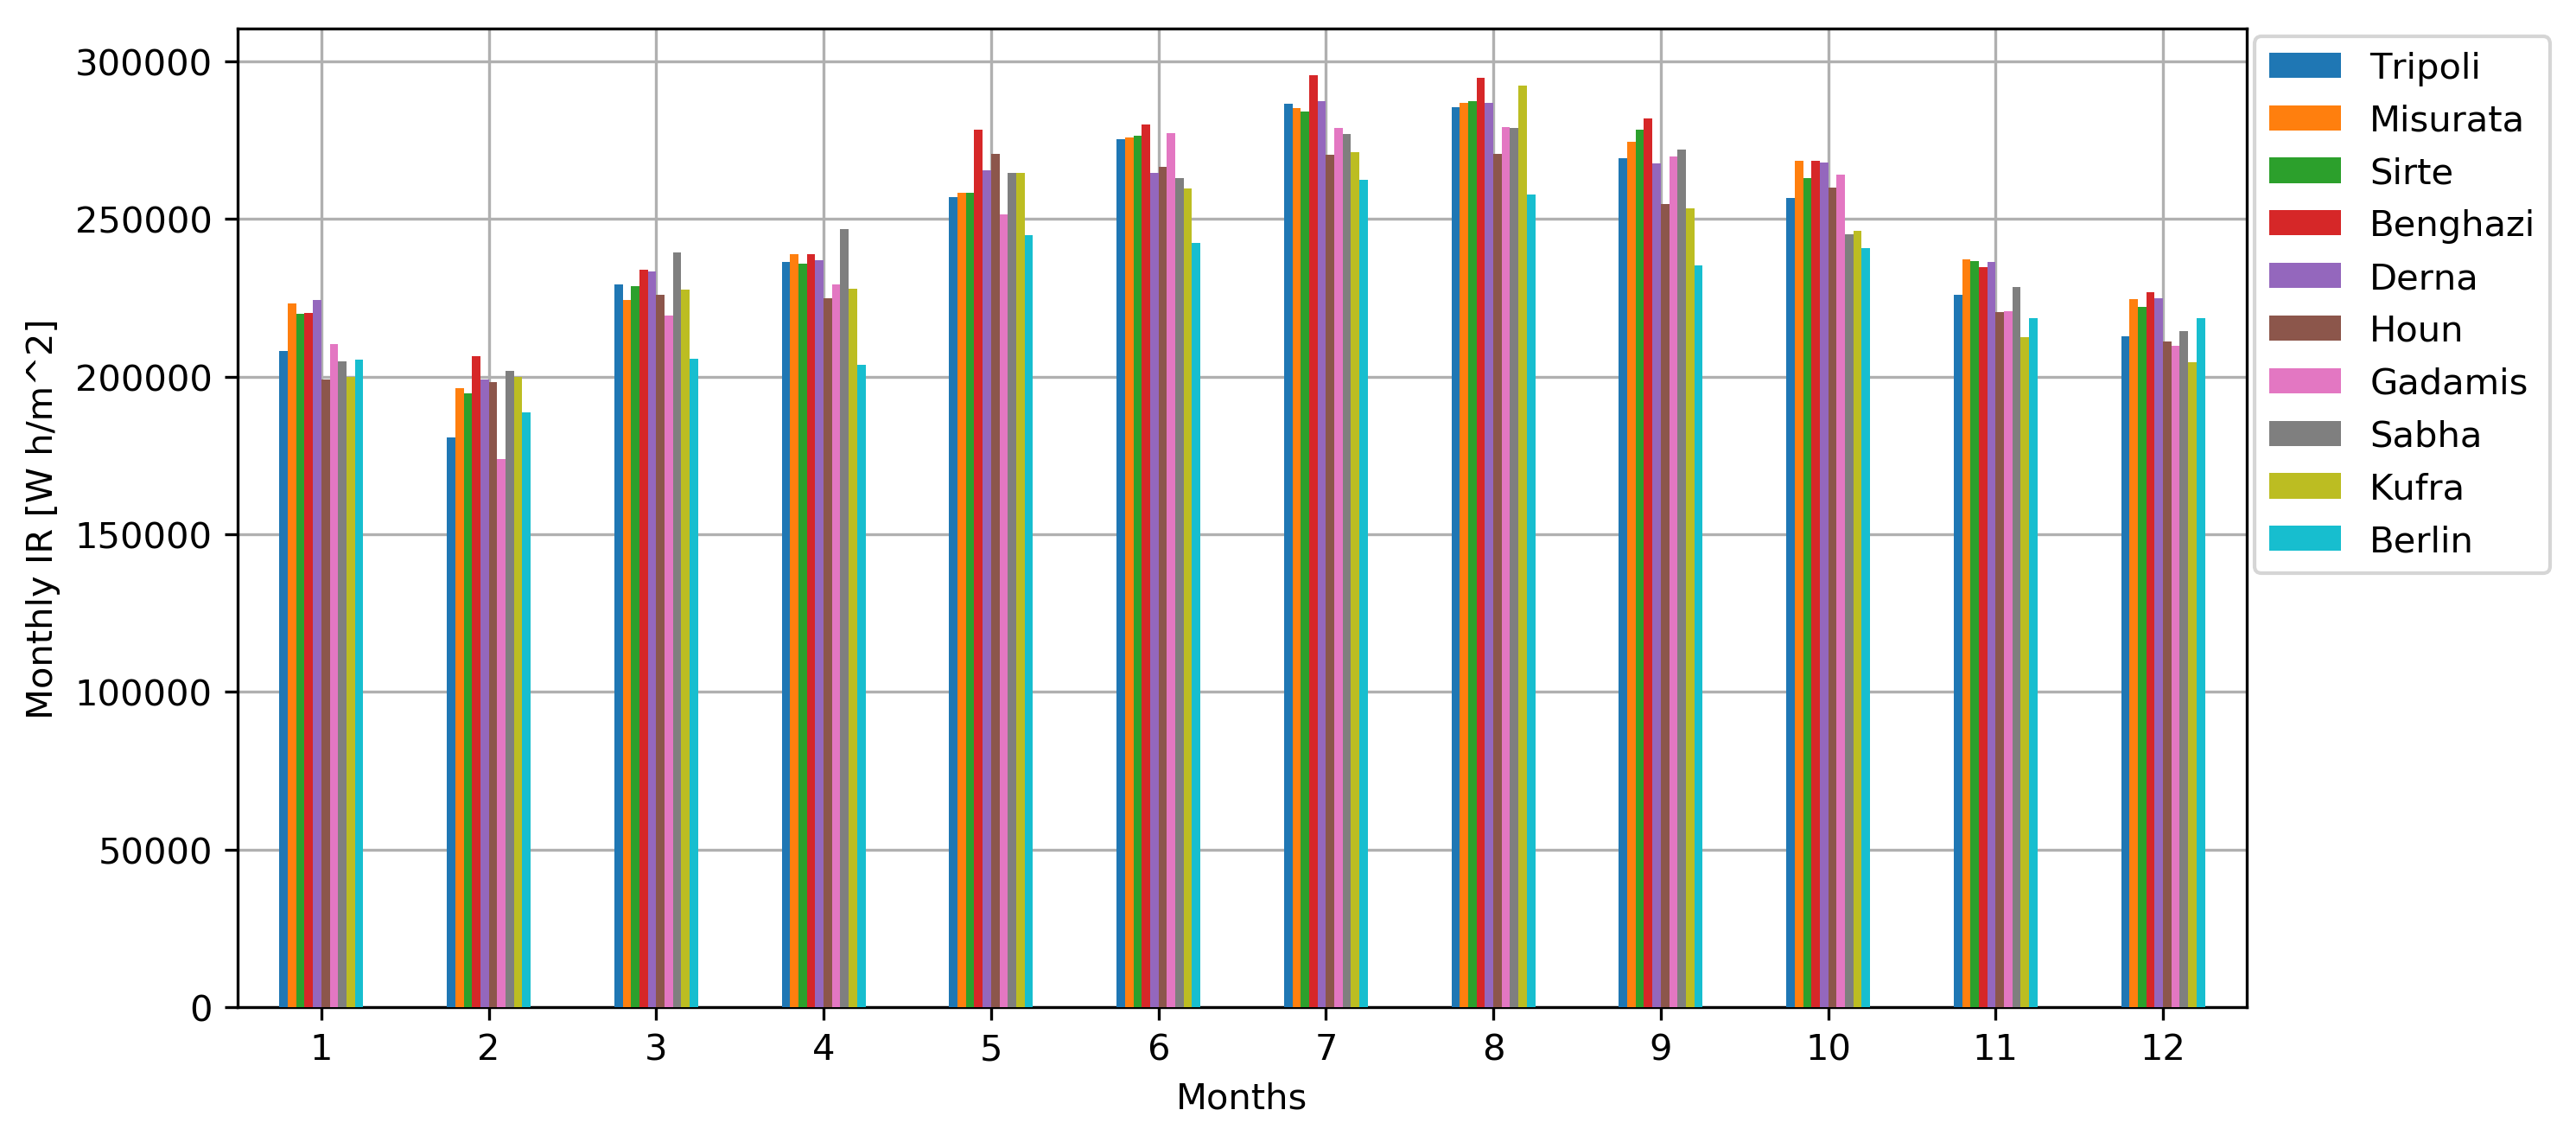

In [16]:
plt.rcParams['figure.figsize'] = [10, 5.0]
plt.rcParams['figure.dpi'] = 300

IR_comparison.plot.bar(zorder=3)
plt.xticks(rotation=0)
plt.xlabel('Months');
plt.ylabel('Monthly IR [W h/m^2]');
plt.legend(bbox_to_anchor=(1.16, 1.01),loc='upper right')
plt.grid()

In [17]:
print(IR_comparison.describe())

             Tripoli       Misurata          Sirte       Benghazi  \
count      12.000000      12.000000      12.000000      12.000000   
mean   243653.850000  249472.969167  248797.292500  255010.463333   
std     33535.526698   29345.486914   29949.149805   31324.724407   
min    180775.390000  196385.510000  194594.900000  206411.180000   
25%    222618.922500  224429.792500  227110.110000  232197.260000   
50%    246557.145000  248663.450000  247436.355000  253646.370000   
75%    270834.500000  274859.230000  276869.472500  280525.027500   
max    286592.100000  286932.290000  287506.420000  295726.770000   

               Derna           Houn        Gadamis          Sabha  \
count      12.000000      12.000000      12.000000      12.000000   
mean   249568.368333  239425.118333  240309.767500  244728.527500   
std     27532.597861   28886.049957   34545.852565   27492.620301   
min    199188.110000  198310.250000  173790.410000  201888.820000   
25%    231172.972500  218194.0875

### Calculate thermal irradiance for night hours only (without day hours)

In [18]:
cities=['Tripoli','Misurata','Sirte','Benghazi','Derna','Houn','Gadamis','Sabha','Kufra','Berlin']
df_dt=['df_Trip', 'df_Mis', 'df_Sirte', 'df_Beng', 'df_Derna', 'df_Houn', 'df_Gadam', 'df_Sabha', 'df_Kufra', 'df_Berlin']

for i in np.arange(len(cities)):
    vars()[df_dt[i]+'_IR_night']=vars()[df_dt[i]][vars()[df_dt[i]]['G(h)']<0.01]
    
# df_Berlin_IR_night

In [19]:
cities=['Tripoli','Misurata','Sirte','Benghazi','Derna','Houn','Gadamis','Sabha','Kufra','Berlin']
df_dt=['df_Trip', 'df_Mis', 'df_Sirte', 'df_Beng', 'df_Derna', 'df_Houn', 'df_Gadam', 'df_Sabha', 'df_Kufra', 'df_Berlin']


df_tem=pd.DataFrame({'Tripoli':df_Trip_IR_night['IR(h)'].resample('M').sum()})
df_tem
for i in np.arange(len(cities)):
    df_tem[cities[i]]=vars()[df_dt[i]+'_IR_night']['IR(h)'].resample('M').sum()

IR_night_comparison_and_Berlin=df_tem

# IR_night_comparison_and_Berlin.describe()
IR_night_comparison_and_Berlin

# IR_night_comparison = IR_night_comparison_and_Berlin.drop('Berlin', 1)


Tripoli   Misurata      Sirte   Benghazi      Derna       Houn  \
2021-01-31  124140.69  134960.93  125770.48  125240.40  127708.35  110765.75   
2021-02-28   98139.37  104312.09  103144.85  112305.56  107948.49  105892.60   
2021-03-31  113285.19  115835.94  117947.62  118246.41  112596.27  118545.75   
2021-04-30  104315.11  107832.52  109419.80  114291.56  109533.45  106929.29   
2021-05-31  112382.93  113315.82  109864.51  113960.07  111782.83  121228.62   
2021-06-30  120239.22  115140.77  110946.85  110899.34  103313.05  118900.93   
2021-07-31  122476.05  124354.01  123287.07  117763.49  116837.38  120987.68   
2021-08-31  124924.43  125288.60  126087.80  134990.57  127338.20  122006.03   
2021-09-30  129956.23  131840.35  134121.44  135426.71  129563.93  124663.22   
2021-10-31  137487.99  144391.36  139478.94  141846.96  140190.65  138090.97   
2021-11-30  129166.31  135864.03  135595.30  133361.30  133769.61  126461.13   
2021-12-31  130051.54  133664.19  127513.98  129299.55  135627.98  121683.74   

              Gadamis      Sabha      Kufra     Berlin  
2021-01-31  121461.51  112230.36  114912.64  142493.03  
2021-02-28   98443.77  109515.47  109907.94  115481.52  
2021-03-31  108605.36  127550.96  113454.73  108159.63  
2021-04-30  107182.15  113922.61  110951.75   90304.03  
2021-05-31  112352.11  118662.66  118594.23   91130.29  
2021-06-30  119462.25  117710.20  116659.31   82967.41  
2021-07-31  119436.35  123952.21  120799.62   96244.90  
2021-08-31  127527.33  124543.05  143122.50  105659.61  
2021-09-30  135834.35  132910.74  126196.14  114734.59  
2021-10-31  140266.04  131083.57  130960.03  138640.26  
2021-11-30  122688.51  130922.41  113347.42  145413.71  
2021-12-31  126134.85  123494.98  117261.10  154709.46

In [20]:
# IR_night_comparison.index=IR_night_comparison.index.month'
IR_night_comparison_and_Berlin.index=IR_night_comparison_and_Berlin.index.month

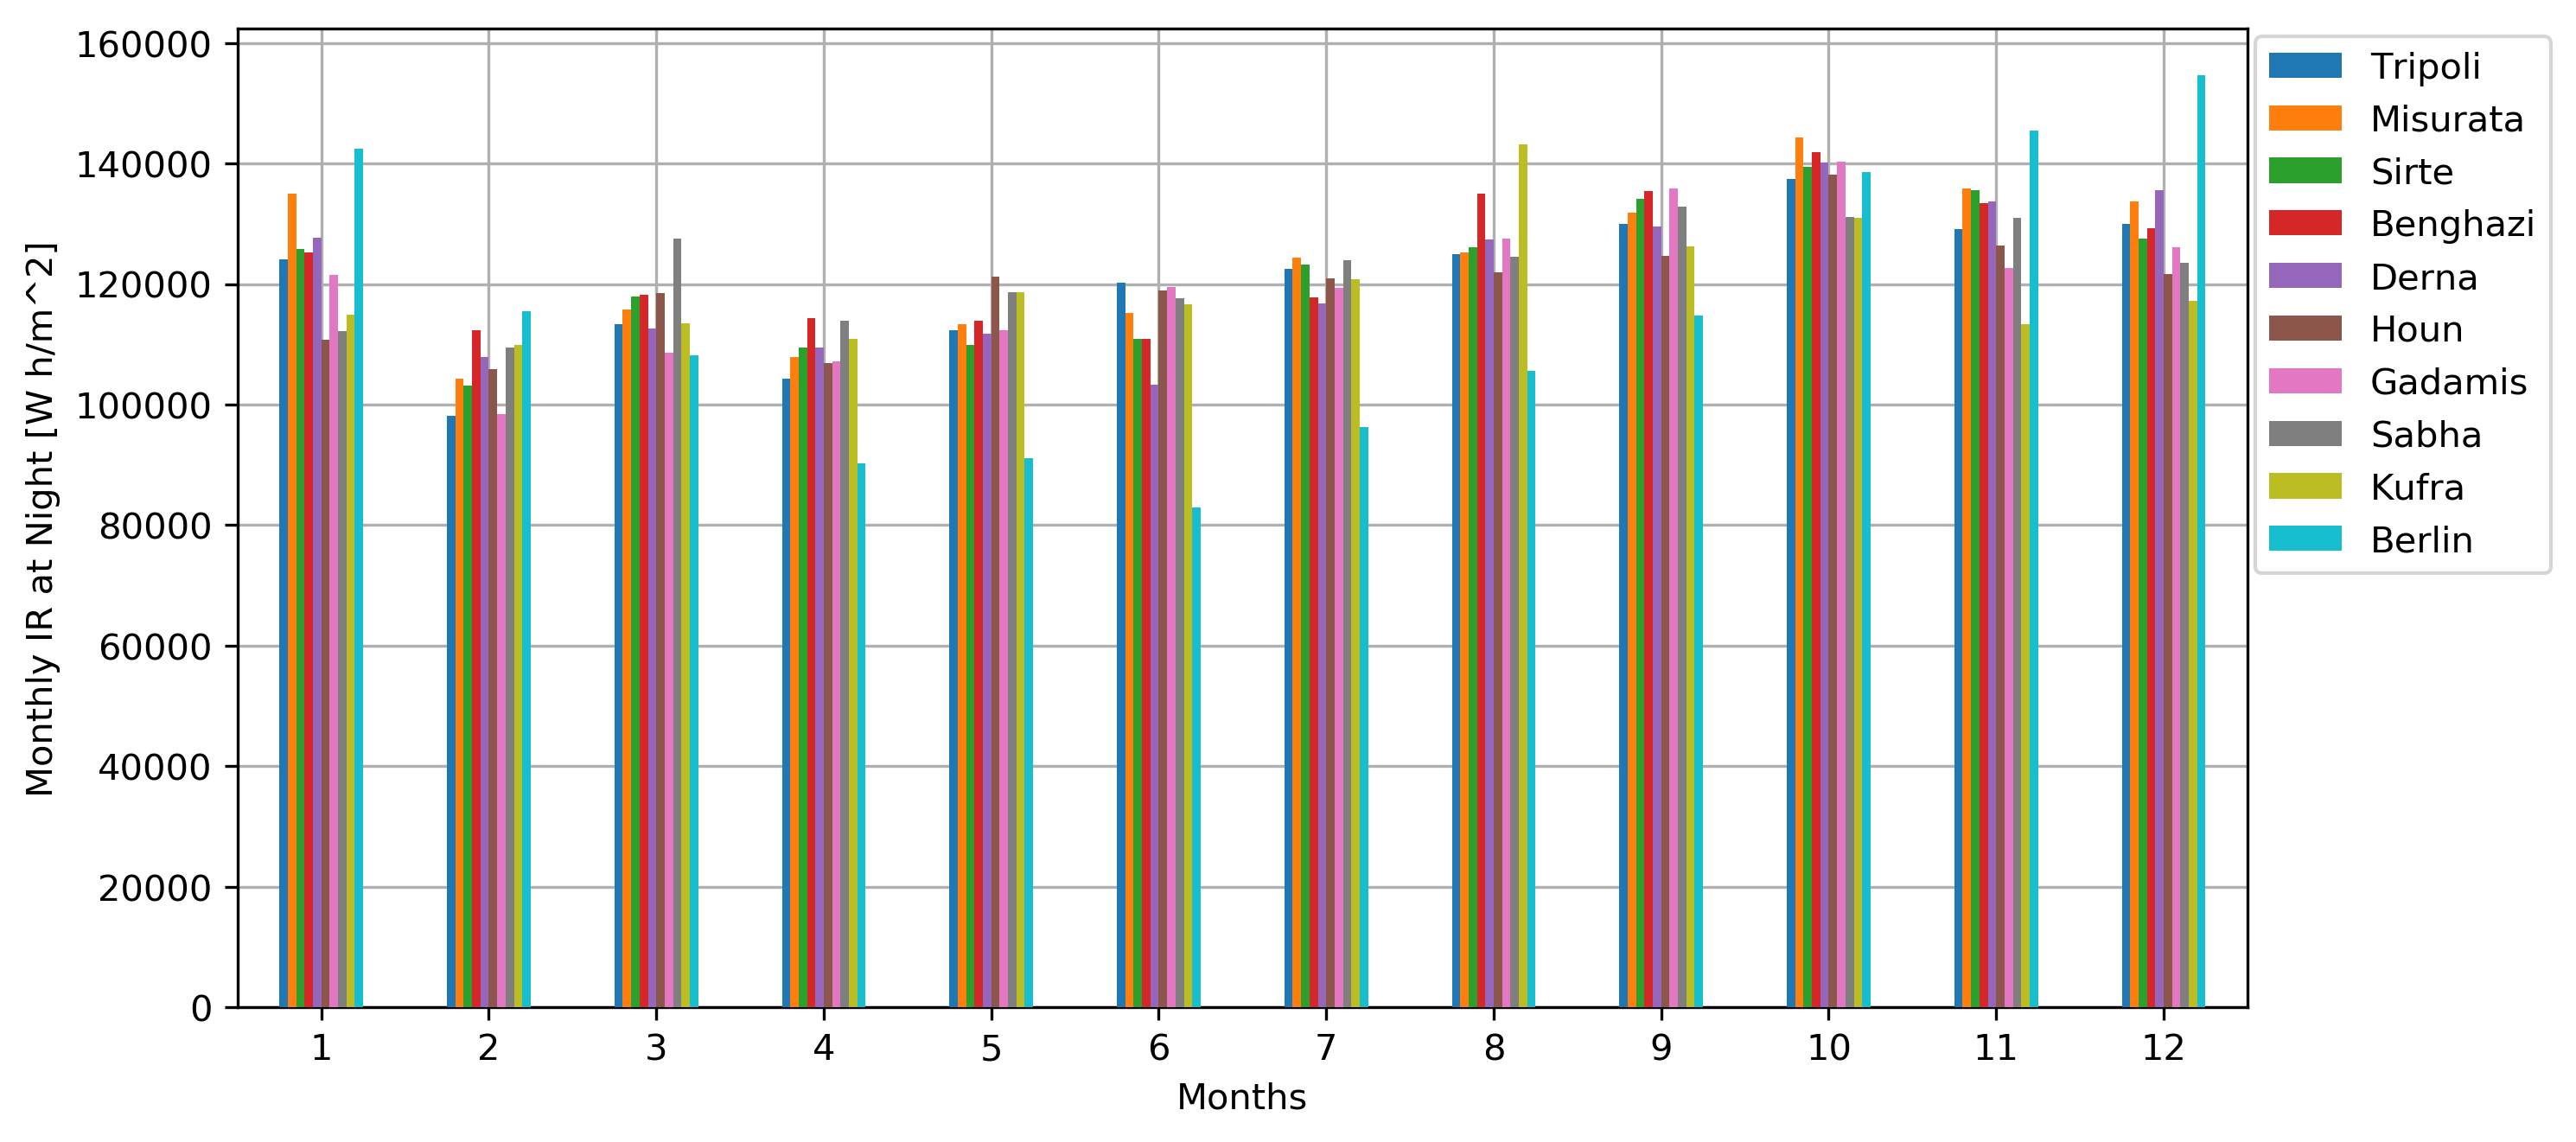

In [21]:
plt.rcParams['figure.figsize'] = [10, 5.0]
plt.rcParams['figure.dpi'] = 300

# IR_night_comparison.plot.bar(zorder=3)
IR_night_comparison_and_Berlin.plot.bar(zorder=3)
plt.xticks(rotation=0)
plt.xlabel('Months');
plt.ylabel('Monthly IR at Night [W h/m^2]');
plt.legend(bbox_to_anchor=(1.16, 1.01),loc='upper right')
plt.grid()

In [22]:
# print(IR_night_comparison.describe())
print(IR_night_comparison_and_Berlin.describe())

             Tripoli       Misurata          Sirte       Benghazi  \
count      12.000000      12.000000      12.000000      12.000000   
mean   120547.088333  123900.050833  121931.553333  123969.326667   
std     11524.732531   12582.560414   11676.892124   10713.465857   
min     98139.370000  104312.090000  103144.850000  110899.340000   
25%    113059.625000  114684.532500  110676.265000  114208.687500   
50%    123308.370000  124821.305000  124528.775000  121743.405000   
75%    129363.790000  133988.375000  129165.845000  133768.617500   
max    137487.990000  144391.360000  139478.940000  141846.960000   

               Derna           Houn        Gadamis          Sabha  \
count      12.000000      12.000000      12.000000      12.000000   
mean   121350.849167  119679.642500  119949.548333  122208.268333   
std     12394.714668    8828.383932   11996.108842    7804.803527   
min    103313.050000  105892.600000   98443.770000  109515.470000   
25%    111220.485000  116600.7500

### IR Comparison for Misurata and Berlin

In [23]:
# cols=['Tripoli', 'Benghazi', 'Gadamis', 'Sabha', 'Kufra']
cols=['Tripoli', 'Sirte','Benghazi', 'Derna','Houn','Gadamis', 'Sabha', 'Kufra']

IR_night_comparison_Mis_Berlin=IR_night_comparison_and_Berlin.drop(columns=cols)

In [24]:
IR_night_comparison_Mis_Berlin

Misurata     Berlin
1   134960.93  142493.03
2   104312.09  115481.52
3   115835.94  108159.63
4   107832.52   90304.03
5   113315.82   91130.29
6   115140.77   82967.41
7   124354.01   96244.90
8   125288.60  105659.61
9   131840.35  114734.59
10  144391.36  138640.26
11  135864.03  145413.71
12  133664.19  154709.46

In [25]:
IR_night_comparison_Mis_Berlin.index=IR_night_comparison_Mis_Berlin.index

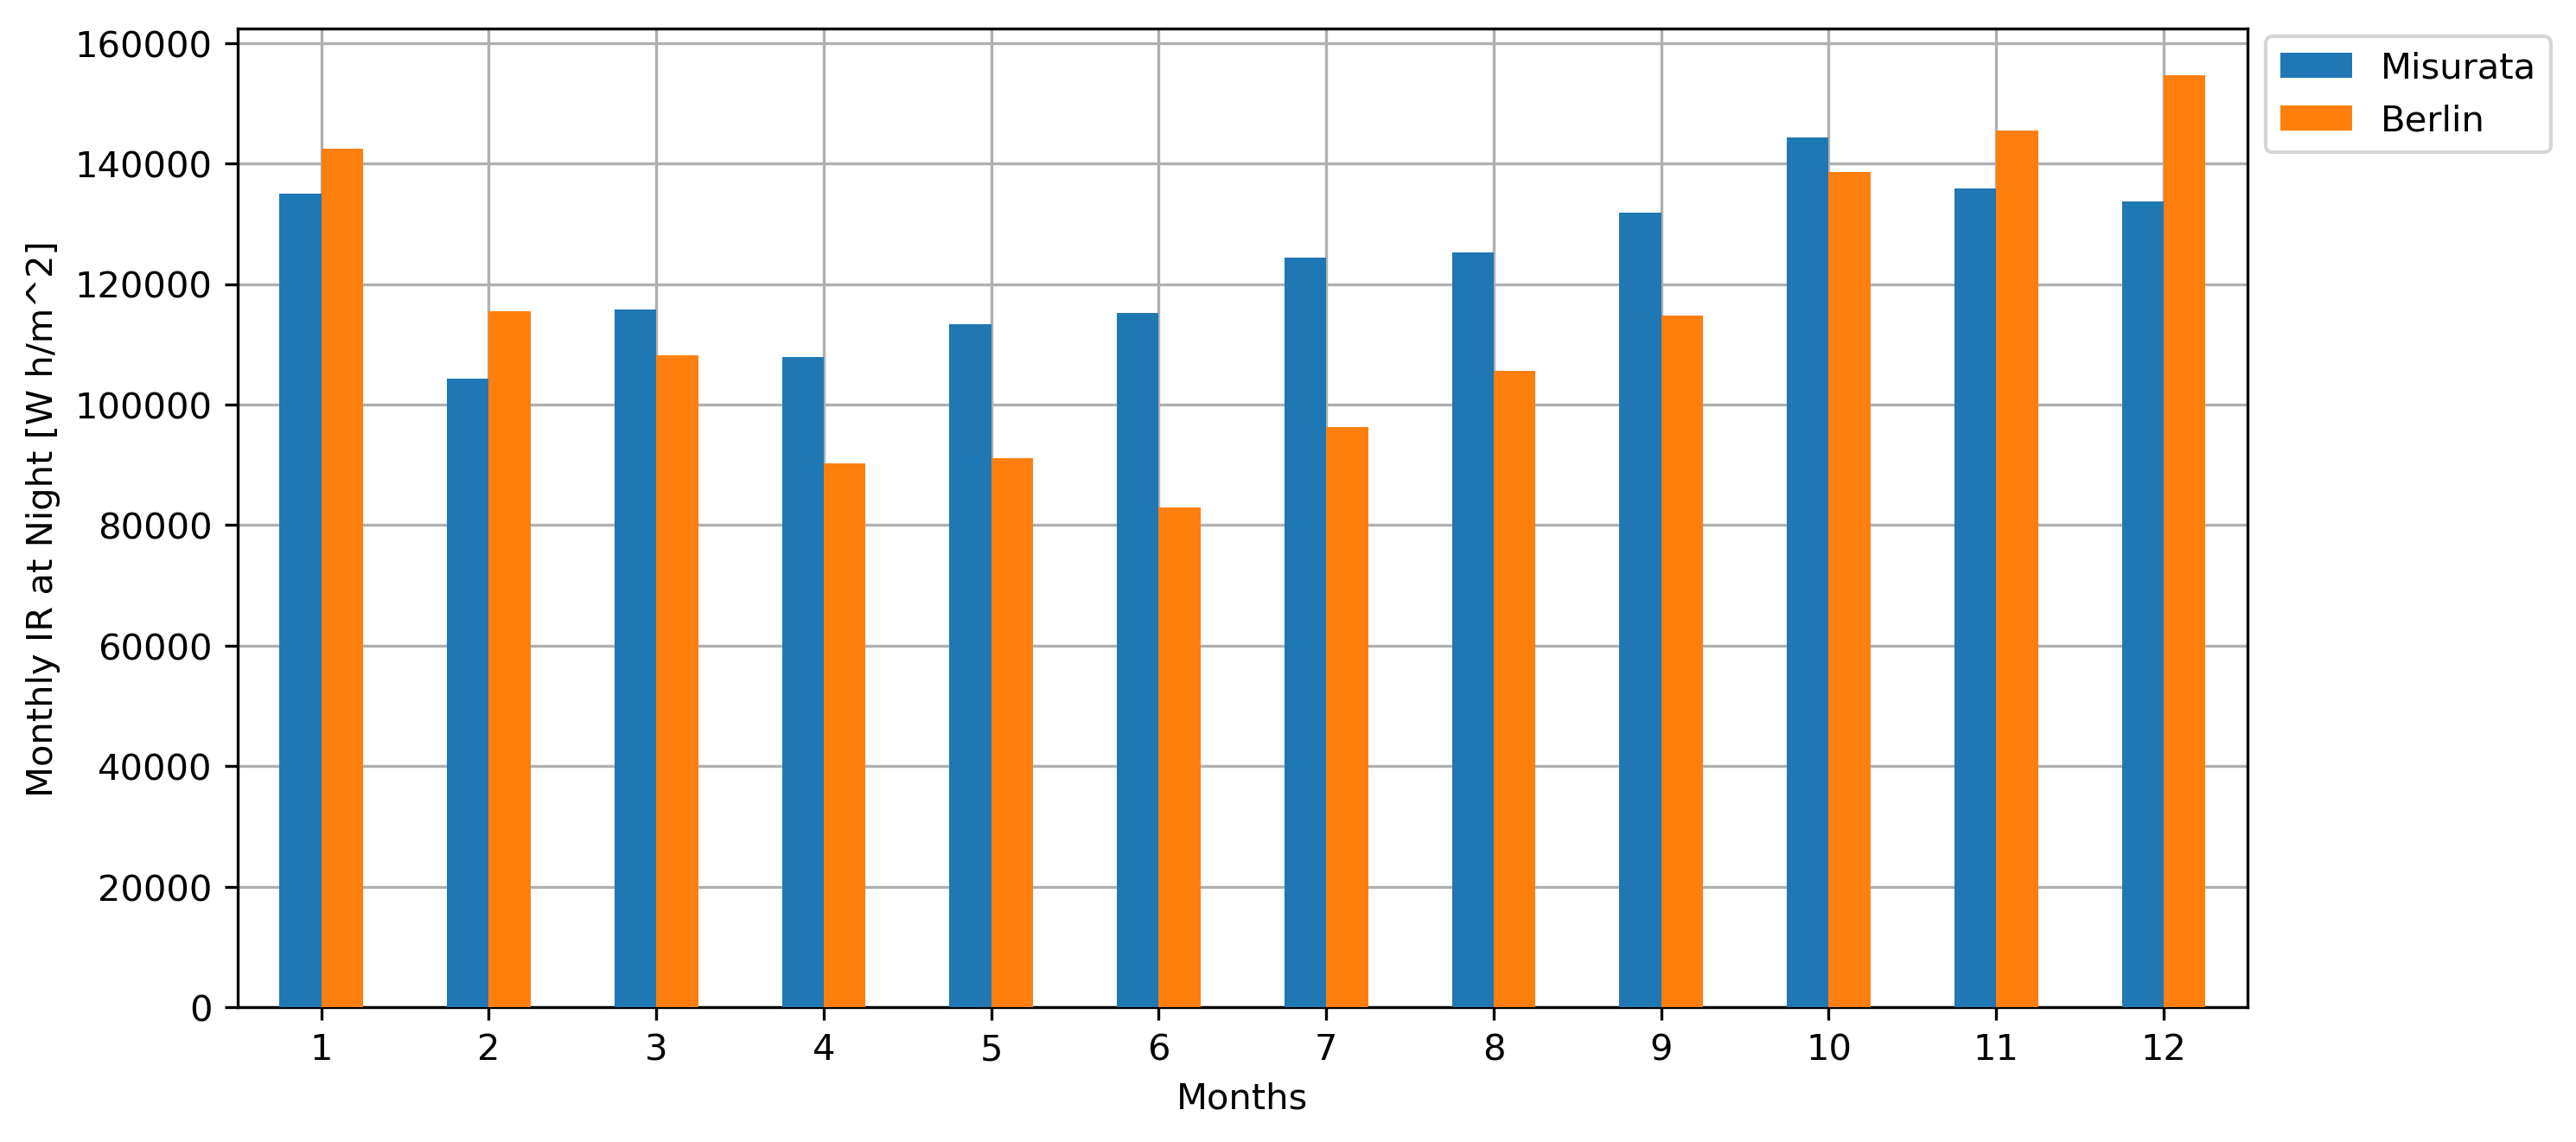

In [26]:
plt.rcParams['figure.figsize'] = [10, 5.0]
plt.rcParams['figure.dpi'] = 300

IR_night_comparison_Mis_Berlin.plot.bar(zorder=3)
plt.xticks(rotation=0)
plt.xlabel('Months');
plt.ylabel('Monthly IR at Night [W h/m^2]');
plt.legend(bbox_to_anchor=(1.16, 1.01),loc='upper right')
plt.grid()

In [27]:
IR_night_comparison_Mis_Berlin.describe()

Misurata         Berlin
count      12.000000      12.000000
mean   123900.050833  115494.870000
std     12582.560414   24318.820329
min    104312.090000   82967.410000
25%    114684.532500   94966.247500
50%    124821.305000  111447.110000
75%    133988.375000  139603.452500
max    144391.360000  154709.460000

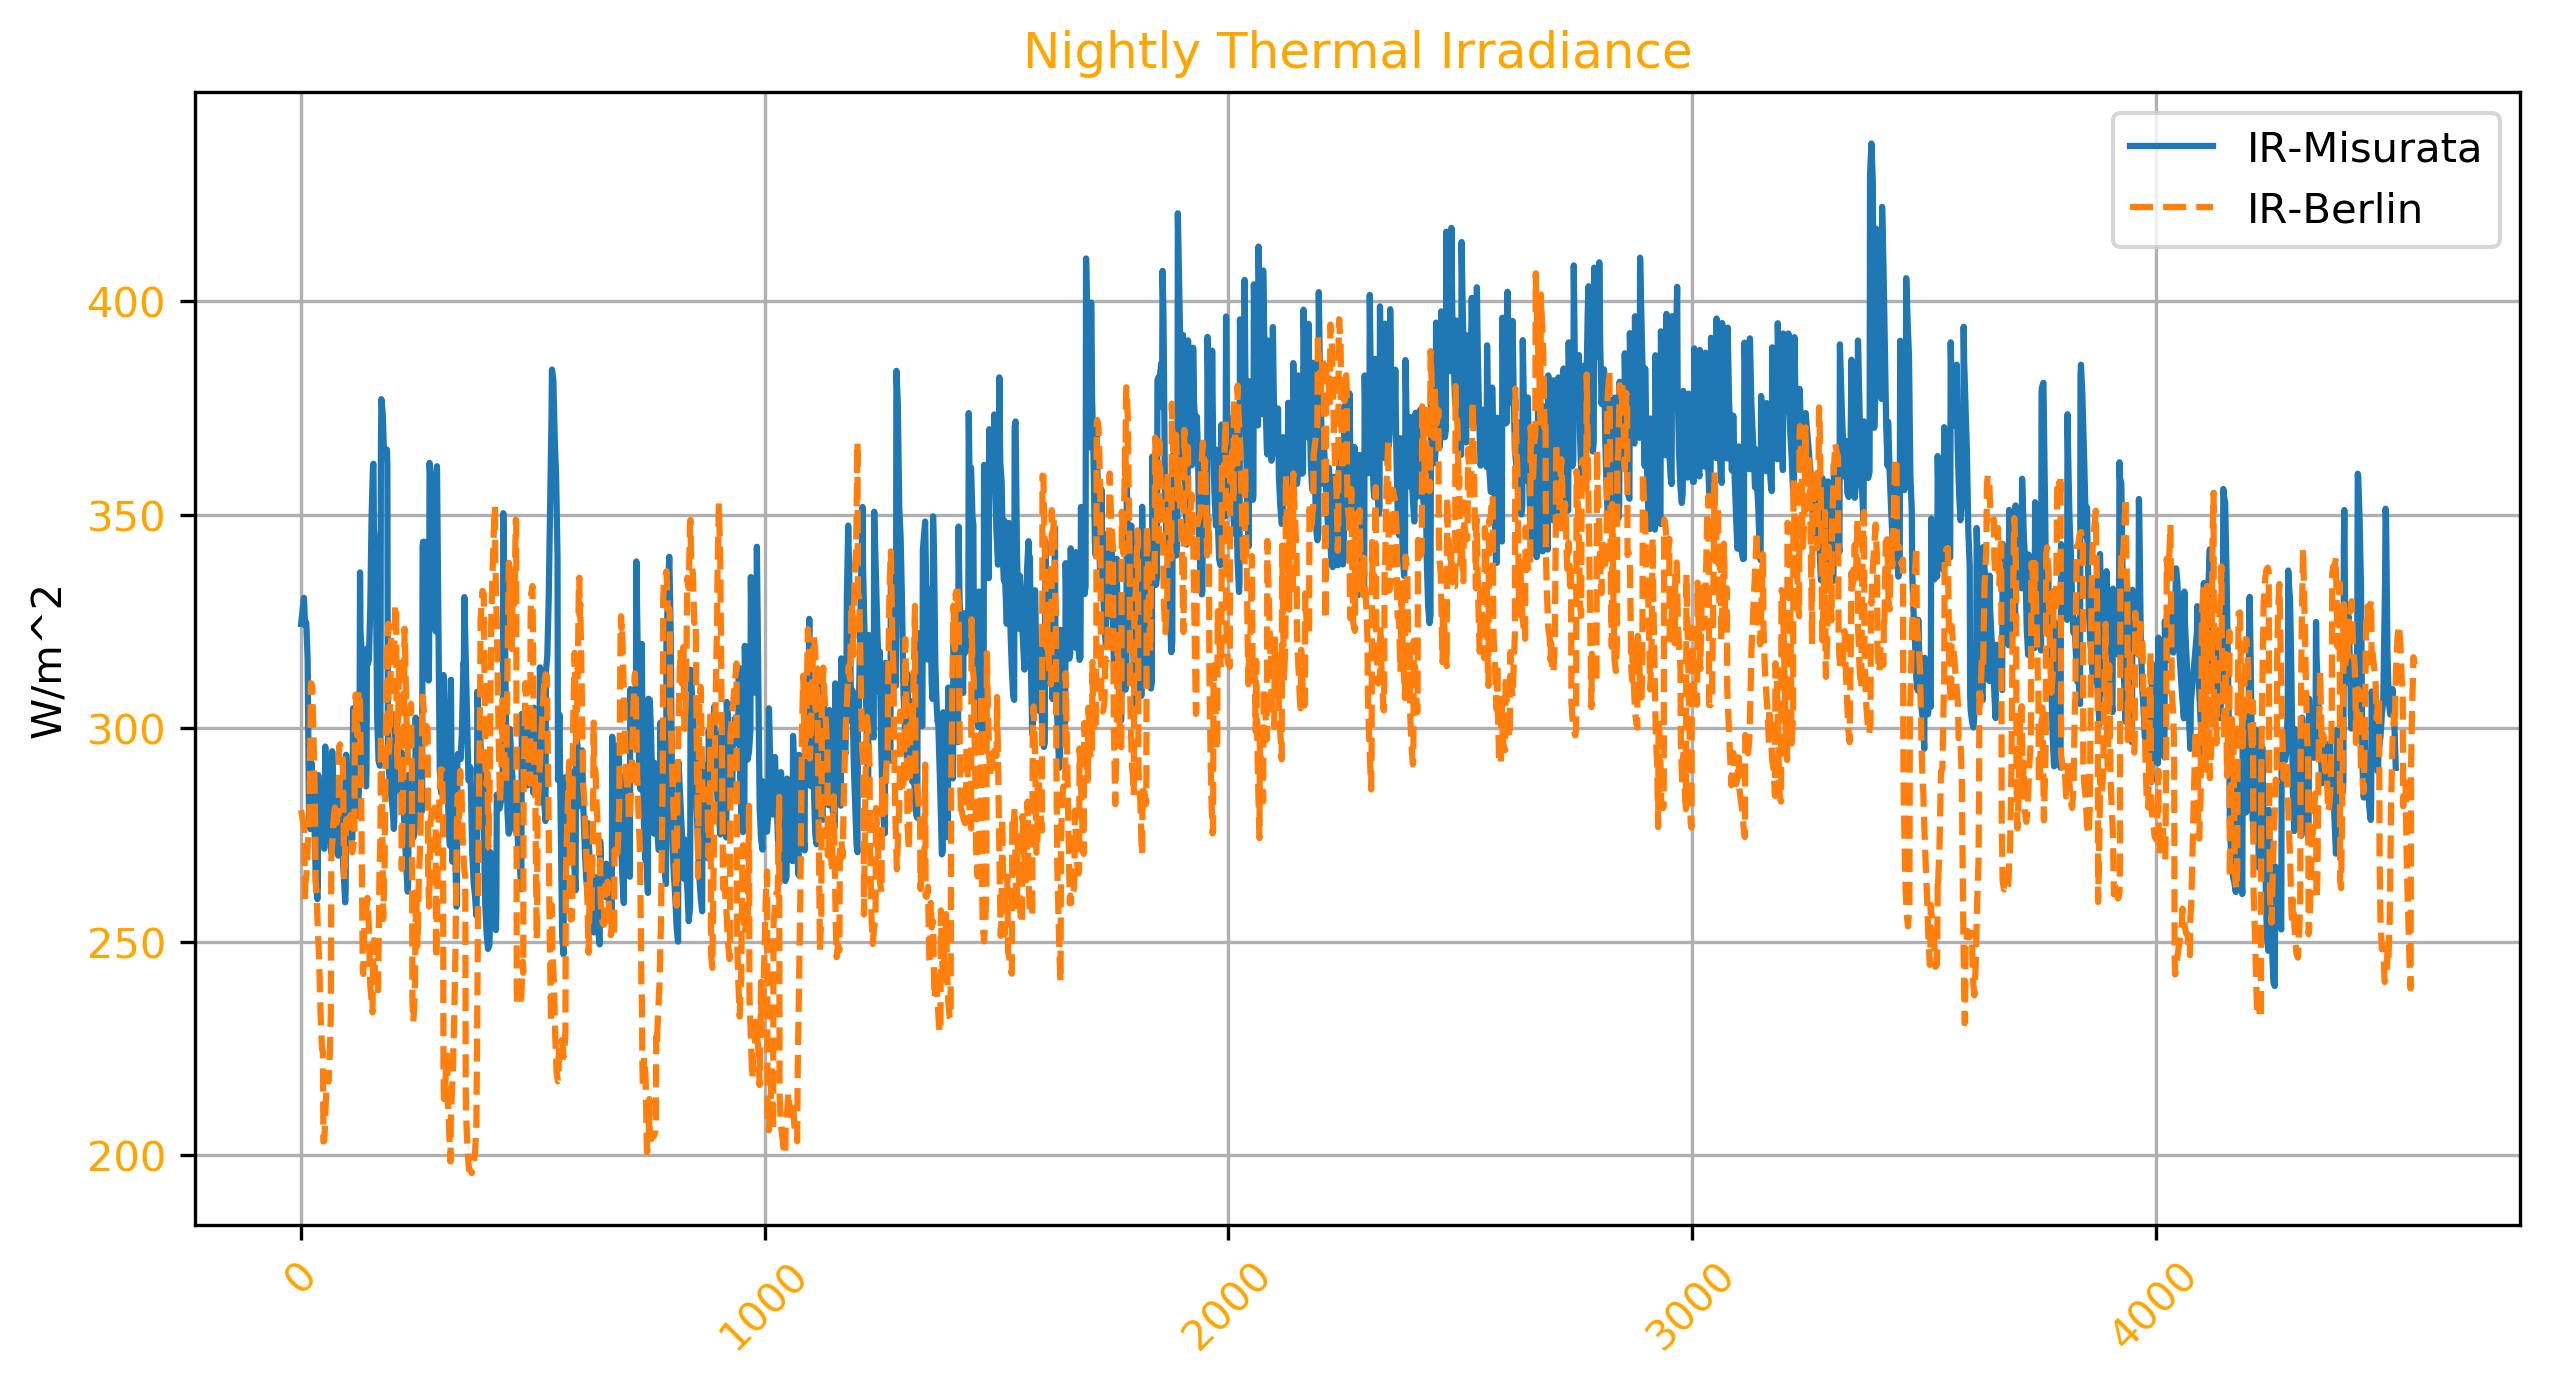

In [28]:
plt.plot(
#     times.values, df_Mis['2021-03':'2021-03-17']['G(h)'].values, '-',
#     times.values, df_Mis['cl_ghi'].values, '--')
df_Mis_IR_night['2021-01-01':'2021-12-30']['IR(h)'].values,'-',
df_Berlin_IR_night['2021-01-01':'2021-12-30']['IR(h)'].values,'--',zorder=3)

plt.legend(['IR-Misurata', 'IR-Berlin'])
plt.title('Nightly Thermal Irradiance', color='orange')
plt.ylabel('W/m^2')

plt.xticks(rotation=45, color='orange')
plt.yticks(color='orange')
plt.grid()

In [29]:
print(IR_night_comparison_Mis_Berlin.describe())

            Misurata         Berlin
count      12.000000      12.000000
mean   123900.050833  115494.870000
std     12582.560414   24318.820329
min    104312.090000   82967.410000
25%    114684.532500   94966.247500
50%    124821.305000  111447.110000
75%    133988.375000  139603.452500
max    144391.360000  154709.460000


### Wind speed at 10 meter (WS10m) for some Libyan CIties
WS10m: 10-m total wind speed (m/s)

In [30]:
cities=['Tripoli','Misurata','Sirte','Benghazi','Derna','Houn','Gadamis','Sabha','Kufra','Berlin']
df_dt=['df_Trip', 'df_Mis', 'df_Sirte', 'df_Beng', 'df_Derna', 'df_Houn', 'df_Gadam', 'df_Sabha', 'df_Kufra', 'df_Berlin']


df_tem=pd.DataFrame({'Tripoli':df_Trip['WS10m'].resample('M').mean()})
df_tem
for i in np.arange(len(cities)):
    df_tem[cities[i]]=vars()[df_dt[i]]['WS10m'].resample('M').mean()

Wind10m_comparison=df_tem

# Wind10m_comparison.describe()
Wind10m_comparison


Tripoli  Misurata     Sirte  Benghazi     Derna      Houn  \
2021-01-31  6.394113  6.287204  5.667231  4.561129  6.709933  4.963978   
2021-02-28  6.317589  6.621682  5.272128  5.466920  6.627321  4.988631   
2021-03-31  4.051640  4.527137  4.859247  4.673710  5.793602  4.901237   
2021-04-30  4.400028  6.228361  5.606972  5.350847  5.448764  5.222653   
2021-05-31  3.546062  5.335954  5.007513  4.853925  5.217312  5.417298   
2021-06-30  4.923917  5.360847  5.822528  4.790958  6.792208  5.319028   
2021-07-31  4.810202  3.278159  4.112433  5.161694  5.760726  4.325874   
2021-08-31  3.637594  3.159798  3.628414  4.727876  6.109341  4.470927   
2021-09-30  4.427556  3.988472  4.054931  4.547625  5.729458  3.924097   
2021-10-31  3.890954  4.188723  3.947110  4.131935  4.683253  4.475860   
2021-11-30  4.442611  4.047472  3.874056  4.973750  4.323903  3.968806   
2021-12-31  4.176116  4.575202  5.902581  4.521922  6.037876  4.057702   

             Gadamis     Sabha     Kufra    Berlin  
2021-01-31  3.436196  4.054597  3.205618  4.462917  
2021-02-28  3.956012  4.683036  3.689836  4.750818  
2021-03-31  3.886949  5.715027  4.465336  4.567110  
2021-04-30  4.264514  5.682056  3.634667  3.814361  
2021-05-31  4.813118  5.777903  4.088078  3.698911  
2021-06-30  4.193597  5.257264  4.089528  3.465681  
2021-07-31  3.893199  4.064704  4.073535  3.341317  
2021-08-31  3.835161  4.361680  3.537876  2.901949  
2021-09-30  3.443347  4.674139  3.215569  3.343597  
2021-10-31  4.334261  3.826505  4.635578  3.062392  
2021-11-30  3.798972  3.406056  3.832472  5.062264  
2021-12-31  3.848804  3.512728  3.276129  4.846237

In [31]:
Wind10m_comparison.index=Wind10m_comparison.index.month

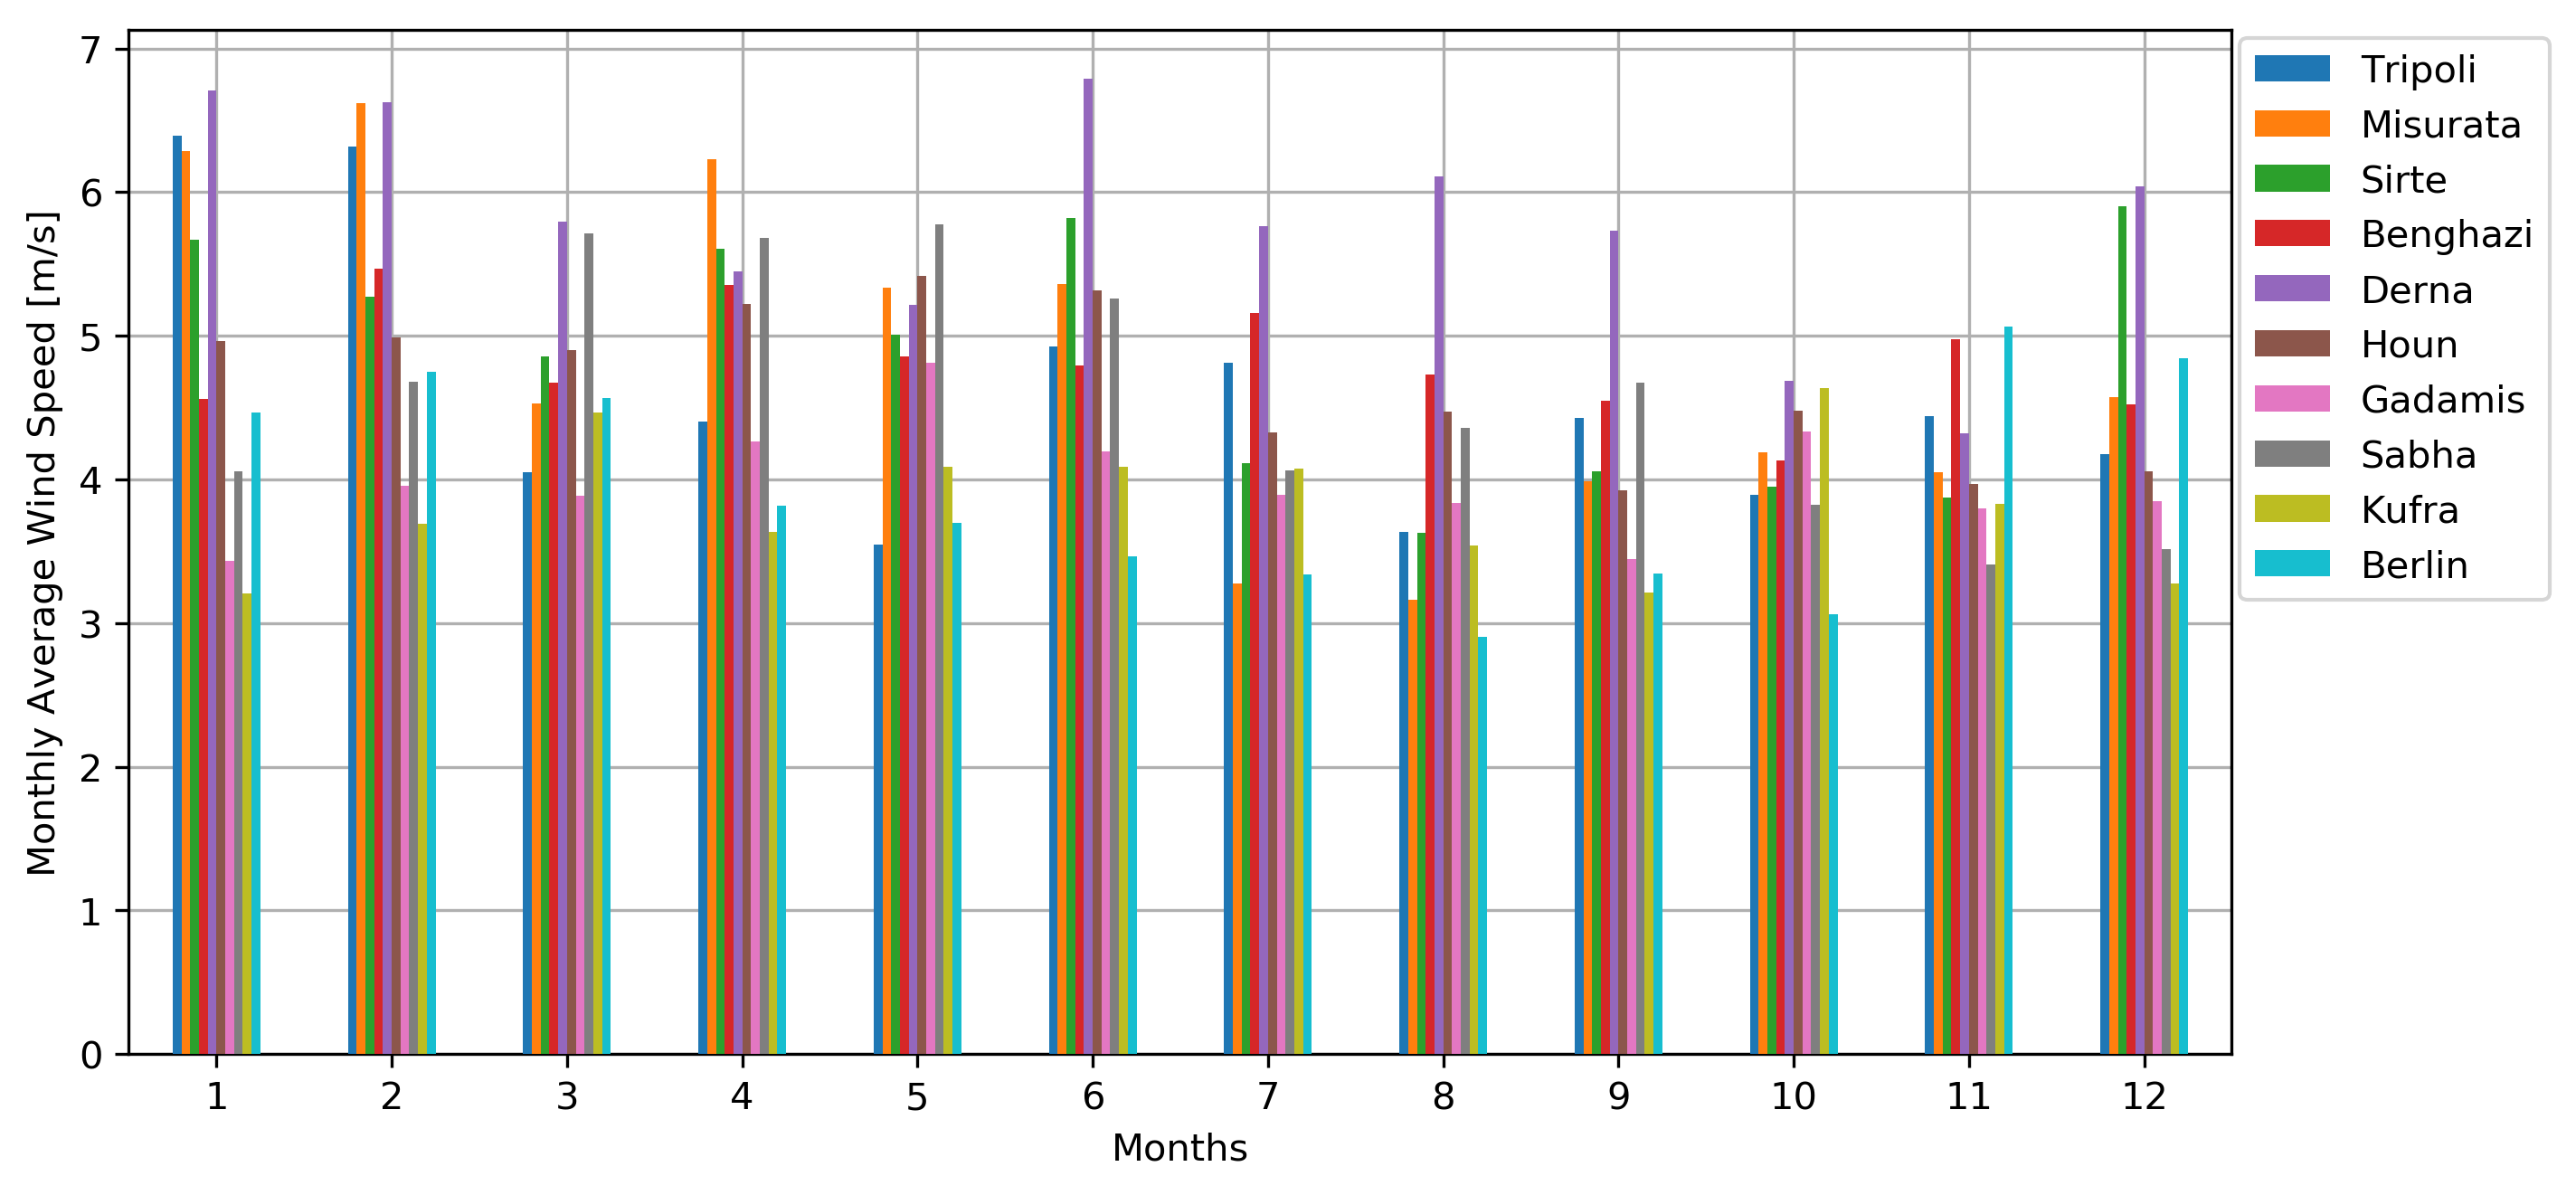

In [32]:
plt.rcParams['figure.figsize'] = [10, 5.0]
plt.rcParams['figure.dpi'] = 300

Wind10m_comparison.plot.bar(zorder=3)
plt.xticks(rotation=0)
plt.xlabel('Months');
plt.ylabel('Monthly Average Wind Speed [m/s]');
plt.legend(bbox_to_anchor=(1.16, 1.01),loc='upper right')
plt.grid()

In [33]:
print(Wind10m_comparison.describe())

         Tripoli   Misurata      Sirte   Benghazi      Derna       Houn  \
count  12.000000  12.000000  12.000000  12.000000  12.000000  12.000000   
mean    4.584865   4.799918   4.812929   4.813524   5.769475   4.669674   
std     0.925887   1.163931   0.848383   0.378461   0.770682   0.534724   
min     3.546062   3.159798   3.628414   4.131935   4.323903   3.924097   
25%     4.011468   4.032722   4.027975   4.557753   5.390901   4.258831   
50%     4.413792   4.551169   4.933380   4.759417   5.777164   4.688548   
75%     4.838630   5.577726   5.622037   5.020736   6.238836   5.047136   
max     6.394113   6.621682   5.902581   5.466920   6.792208   5.417298   

         Gadamis      Sabha      Kufra     Berlin  
count  12.000000  12.000000  12.000000  12.000000  
mean    3.975344   4.584641   3.812019   3.943130  
std     0.383447   0.857581   0.472834   0.754713  
min     3.436196   3.406056   3.205618   2.901949  
25%     3.826114   3.997574   3.472440   3.343027  
50%     3.89

### Temperature at 2 meter (T2M) for some Libyan CIties... just for checking

2-m air temperature(degree Celsius)

In [34]:
cities=['Tripoli','Misurata','Sirte','Benghazi','Derna','Houn','Gadamis','Sabha','Kufra','Berlin']
df_dt=['df_Trip', 'df_Mis', 'df_Sirte', 'df_Beng', 'df_Derna', 'df_Houn', 'df_Gadam', 'df_Sabha', 'df_Kufra', 'df_Berlin']


df_tem=pd.DataFrame({'Tripoli':df_Trip['T2m'].resample('M').mean()})
df_tem
for i in np.arange(len(cities)):
    df_tem[cities[i]]=vars()[df_dt[i]]['T2m'].resample('M').mean()

Temp2m_comparison=df_tem

# Temp2m_comparison.describe()
Temp2m_comparison

Tripoli   Misurata      Sirte   Benghazi      Derna       Houn  \
2021-01-31  13.217218  13.537191  14.393024  12.659892  12.061331  10.359610   
2021-02-28  12.957753  13.420670  12.852545  13.643988  10.021905  12.905417   
2021-03-31  16.222957  14.214046  16.257204  15.788696  13.469194  17.087137   
2021-04-30  19.874861  20.114764  19.590569  19.202236  15.007514  21.304542   
2021-05-31  22.814718  22.072487  21.724167  23.200403  20.479758  27.341331   
2021-06-30  25.995292  26.702167  26.269417  25.557403  22.805403  30.239958   
2021-07-31  27.472715  27.189704  27.787769  27.616048  25.074677  28.721129   
2021-08-31  28.406694  28.216694  27.982124  27.420269  25.921895  27.935484   
2021-09-30  27.633389  26.708514  27.634556  26.118764  22.373069  26.514042   
2021-10-31  22.739086  23.431949  21.124570  22.095134  19.609395  23.099086   
2021-11-30  18.744597  20.230278  16.980500  19.640181  17.508694  17.308278   
2021-12-31  13.312782  14.011815  16.794530  14.472446  11.246626  11.534301   

              Gadamis      Sabha      Kufra     Berlin  
2021-01-31  12.198387  10.364409  10.862997  -0.377406  
2021-02-28   8.889881  13.906696  15.376057   4.110818  
2021-03-31  18.079140  20.560847  19.859220   4.240780  
2021-04-30  22.992792  25.889083  22.443764   8.645389  
2021-05-31  26.518938  28.375323  28.940282  15.522554  
2021-06-30  33.049722  31.620847  30.761847  17.446708  
2021-07-31  33.393535  32.997366  31.554785  18.602809  
2021-08-31  32.439785  30.915833  33.706815  18.910699  
2021-09-30  31.441986  30.687278  27.900931  14.036958  
2021-10-31  25.347231  22.582742  23.797903  12.463468  
2021-11-30  16.385236  16.937944  15.698764   7.841278  
2021-12-31  12.036801  12.531116  11.741478   5.452648

In [35]:
Temp2m_comparison.index=Temp2m_comparison.index.month

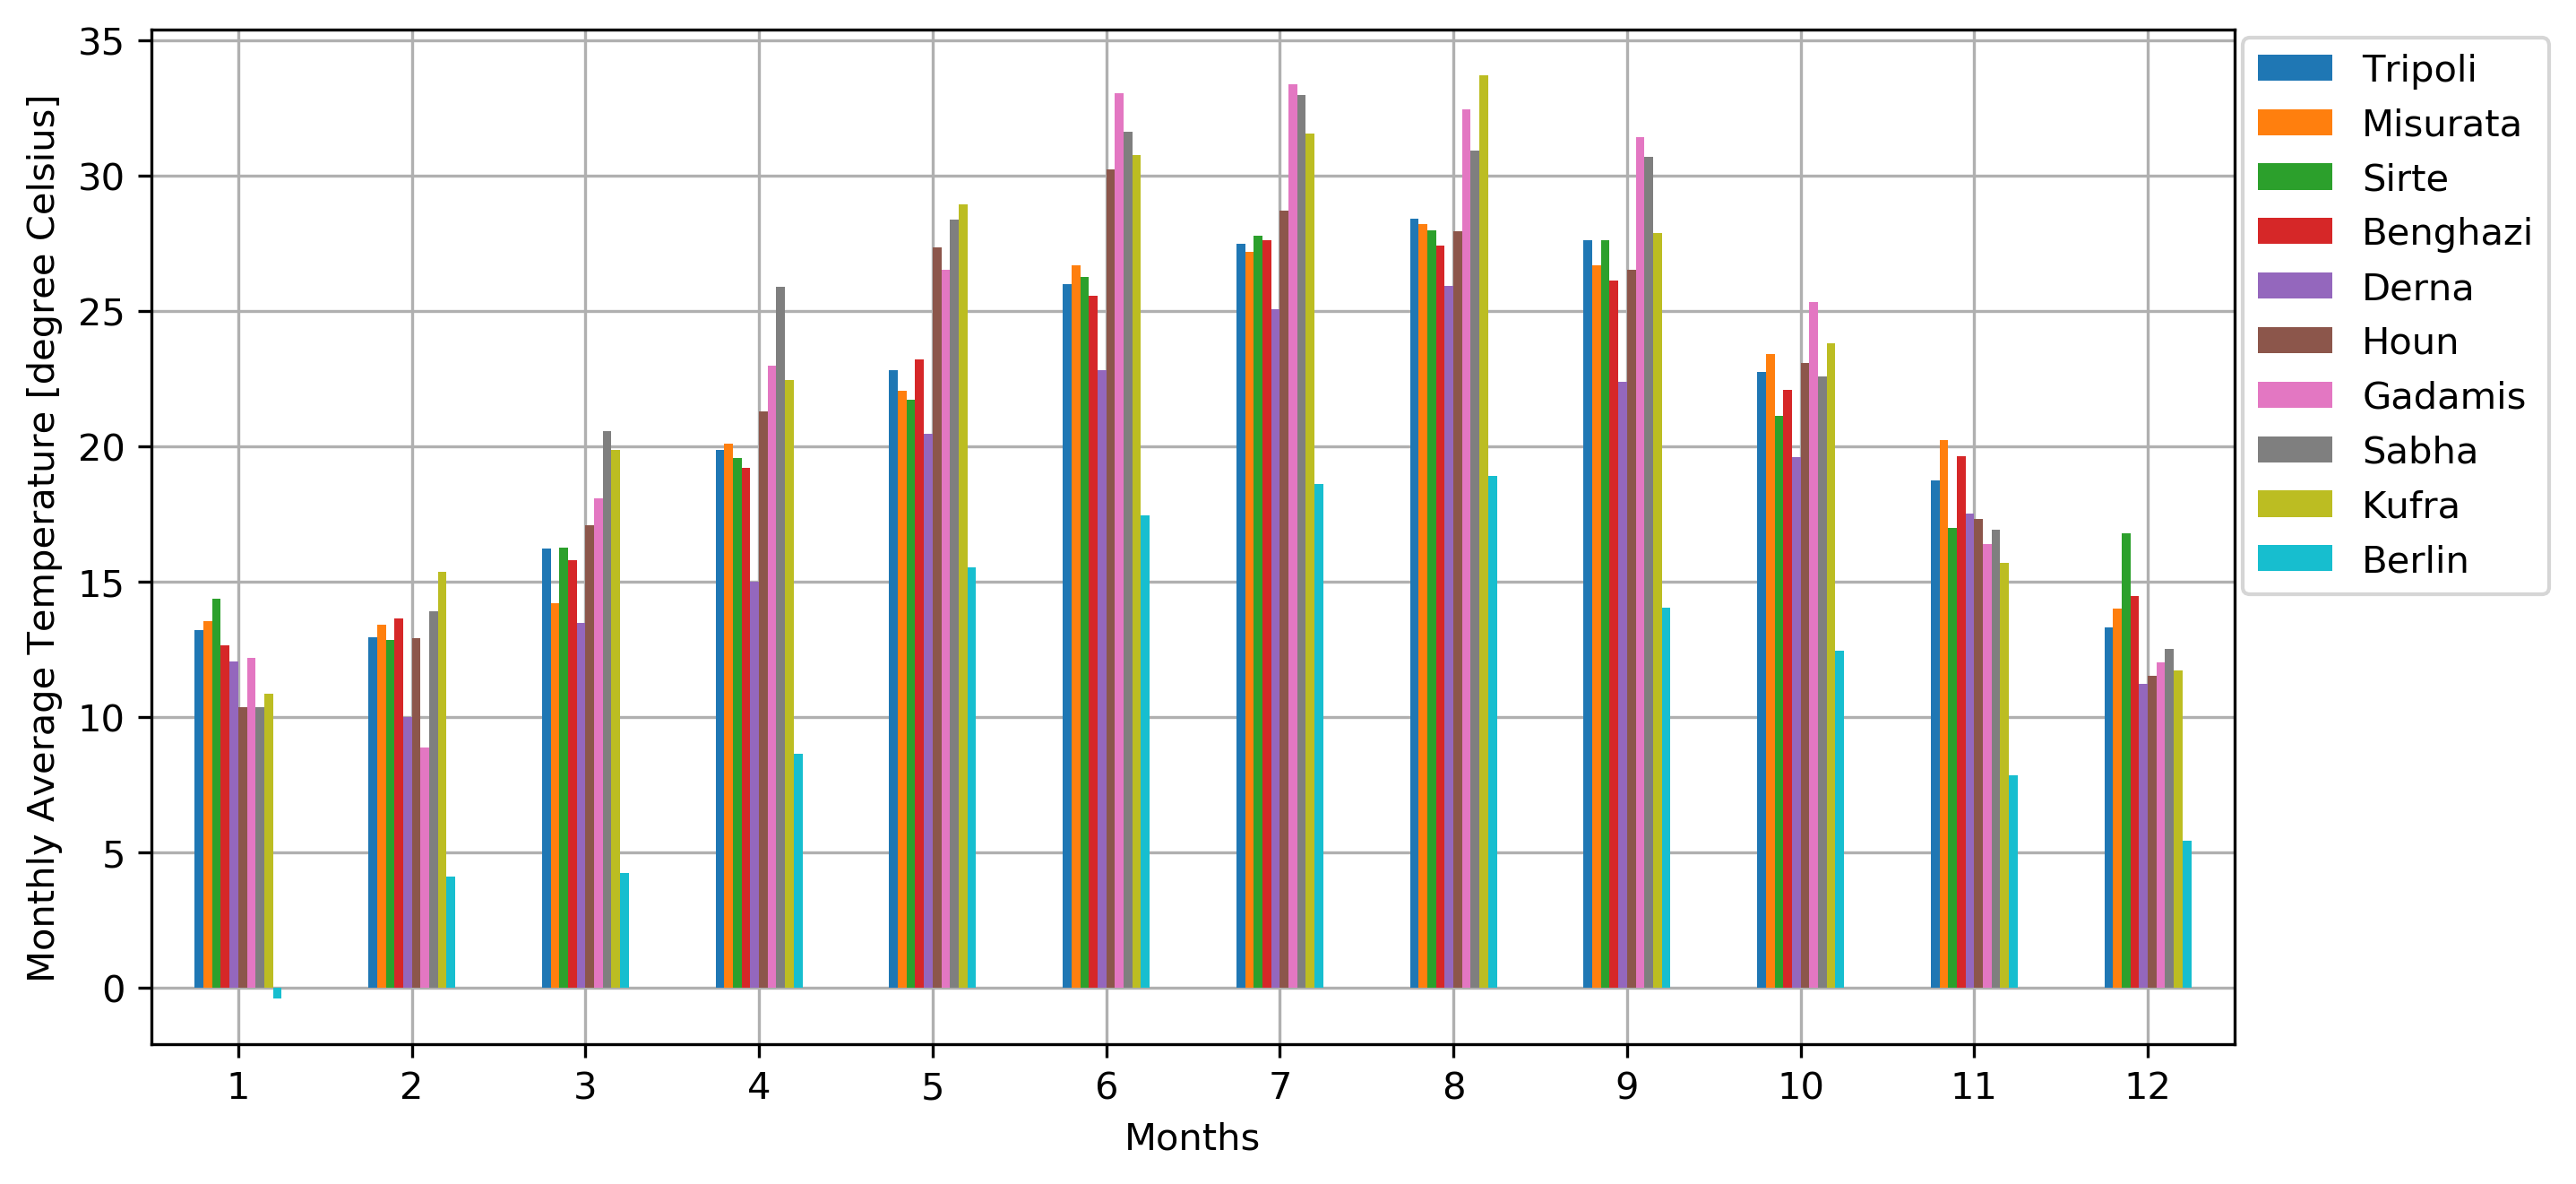

In [36]:
plt.rcParams['figure.figsize'] = [10, 5.0]
plt.rcParams['figure.dpi'] = 300

Temp2m_comparison.plot.bar(zorder=3)
plt.xticks(rotation=0)
plt.xlabel('Months');
plt.ylabel('Monthly Average Temperature [degree Celsius]');
plt.legend(bbox_to_anchor=(1.16, 1.01),loc='upper right')
plt.grid()

In [37]:
print(Temp2m_comparison.describe())

         Tripoli   Misurata      Sirte   Benghazi      Derna       Houn  \
count  12.000000  12.000000  12.000000  12.000000  12.000000  12.000000   
mean   20.782672  20.820856  20.782581  20.617955  17.964955  21.195860   
std     5.915899   5.812011   5.518043   5.516663   5.543203   7.167022   
min    12.957753  13.420670  12.852545  12.659892  10.021905  10.359610   
25%    15.495413  14.163488  16.660198  15.459634  13.117228  16.041707   
50%    21.306974  21.151382  20.357570  20.867657  18.559045  22.201814   
75%    26.364648  26.703753  26.610701  25.697743  22.481153  27.489869   
max    28.406694  28.216694  27.982124  27.616048  25.921895  30.239958   

         Gadamis      Sabha      Kufra     Berlin  
count  12.000000  12.000000  12.000000  12.000000  
mean   22.731120  23.114124  22.720404  10.574725  
std     8.996747   8.134783   7.992830   6.470057  
min     8.889881  10.364409  10.862997  -0.377406  
25%    15.338524  16.180132  15.618087   5.149681  
50%    24.17

### Relative Humidity (RH) for some Libyan CIties... just for checking
relative humidity (%)

WS10m: 10-m total wind speed (m/s)

2-m air temperature(degree Celsius)

In [38]:
cities=['Tripoli','Misurata','Sirte','Benghazi','Derna','Houn','Gadamis','Sabha','Kufra','Berlin']
df_dt=['df_Trip', 'df_Mis', 'df_Sirte', 'df_Beng', 'df_Derna', 'df_Houn', 'df_Gadam', 'df_Sabha', 'df_Kufra', 'df_Berlin']

df_tem=pd.DataFrame({'Tripoli':df_Trip['RH'].resample('M').mean()})

for i in np.arange(len(cities)):
    df_tem[cities[i]]=vars()[df_dt[i]]['RH'].resample('M').mean()

RH_comparison=df_tem

# RH_comparison.describe()
RH_comparison

Tripoli   Misurata      Sirte   Benghazi      Derna       Houn  \
2021-01-31  67.387917  59.733185  50.149570  72.480013  70.648374  44.888226   
2021-02-28  62.669792  48.648616  48.742872  74.992485  68.398601  46.092783   
2021-03-31  72.168454  62.920242  46.056277  64.734220  68.754059  32.929194   
2021-04-30  70.078069  51.943125  42.494403  57.746972  76.398194  25.345889   
2021-05-31  70.978548  57.963723  44.582742  52.610551  76.691613  22.135470   
2021-06-30  74.385208  56.814792  47.187347  56.072361  76.855125  24.816194   
2021-07-31  76.024758  61.193871  48.946599  57.692957  80.829772  31.140296   
2021-08-31  69.511761  58.698642  51.321976  66.145094  77.266492  33.286895   
2021-09-30  66.409639  59.320014  48.063708  60.747722  73.869556  32.378486   
2021-10-31  71.045672  54.292003  58.587030  66.832661  73.853952  35.431210   
2021-11-30  68.966694  47.180917  71.017222  57.059958  70.022972  37.206597   
2021-12-31  66.796962  54.850040  42.771075  70.953414  73.148589  49.637944   

              Gadamis      Sabha      Kufra     Berlin  
2021-01-31  47.311048  40.598172  39.722164  85.179610  
2021-02-28  44.147530  32.972946  30.833958  79.252798  
2021-03-31  28.487124  23.206573  20.669516  77.393038  
2021-04-30  26.048639  17.262333  19.710667  65.307181  
2021-05-31  24.932124  19.883508  14.948683  64.947312  
2021-06-30  17.954458  15.959319  17.360333  63.743000  
2021-07-31  21.225901  17.096263  18.849530  73.372782  
2021-08-31  21.093024  23.402903  20.837715  68.178522  
2021-09-30  22.782250  24.711722  25.956458  74.112778  
2021-10-31  36.355524  31.904059  32.752285  85.195887  
2021-11-30  52.215306  46.312625  44.951222  84.634444  
2021-12-31  50.974919  44.413790  47.547433  85.679113

In [39]:
RH_comparison.index=RH_comparison.index.month

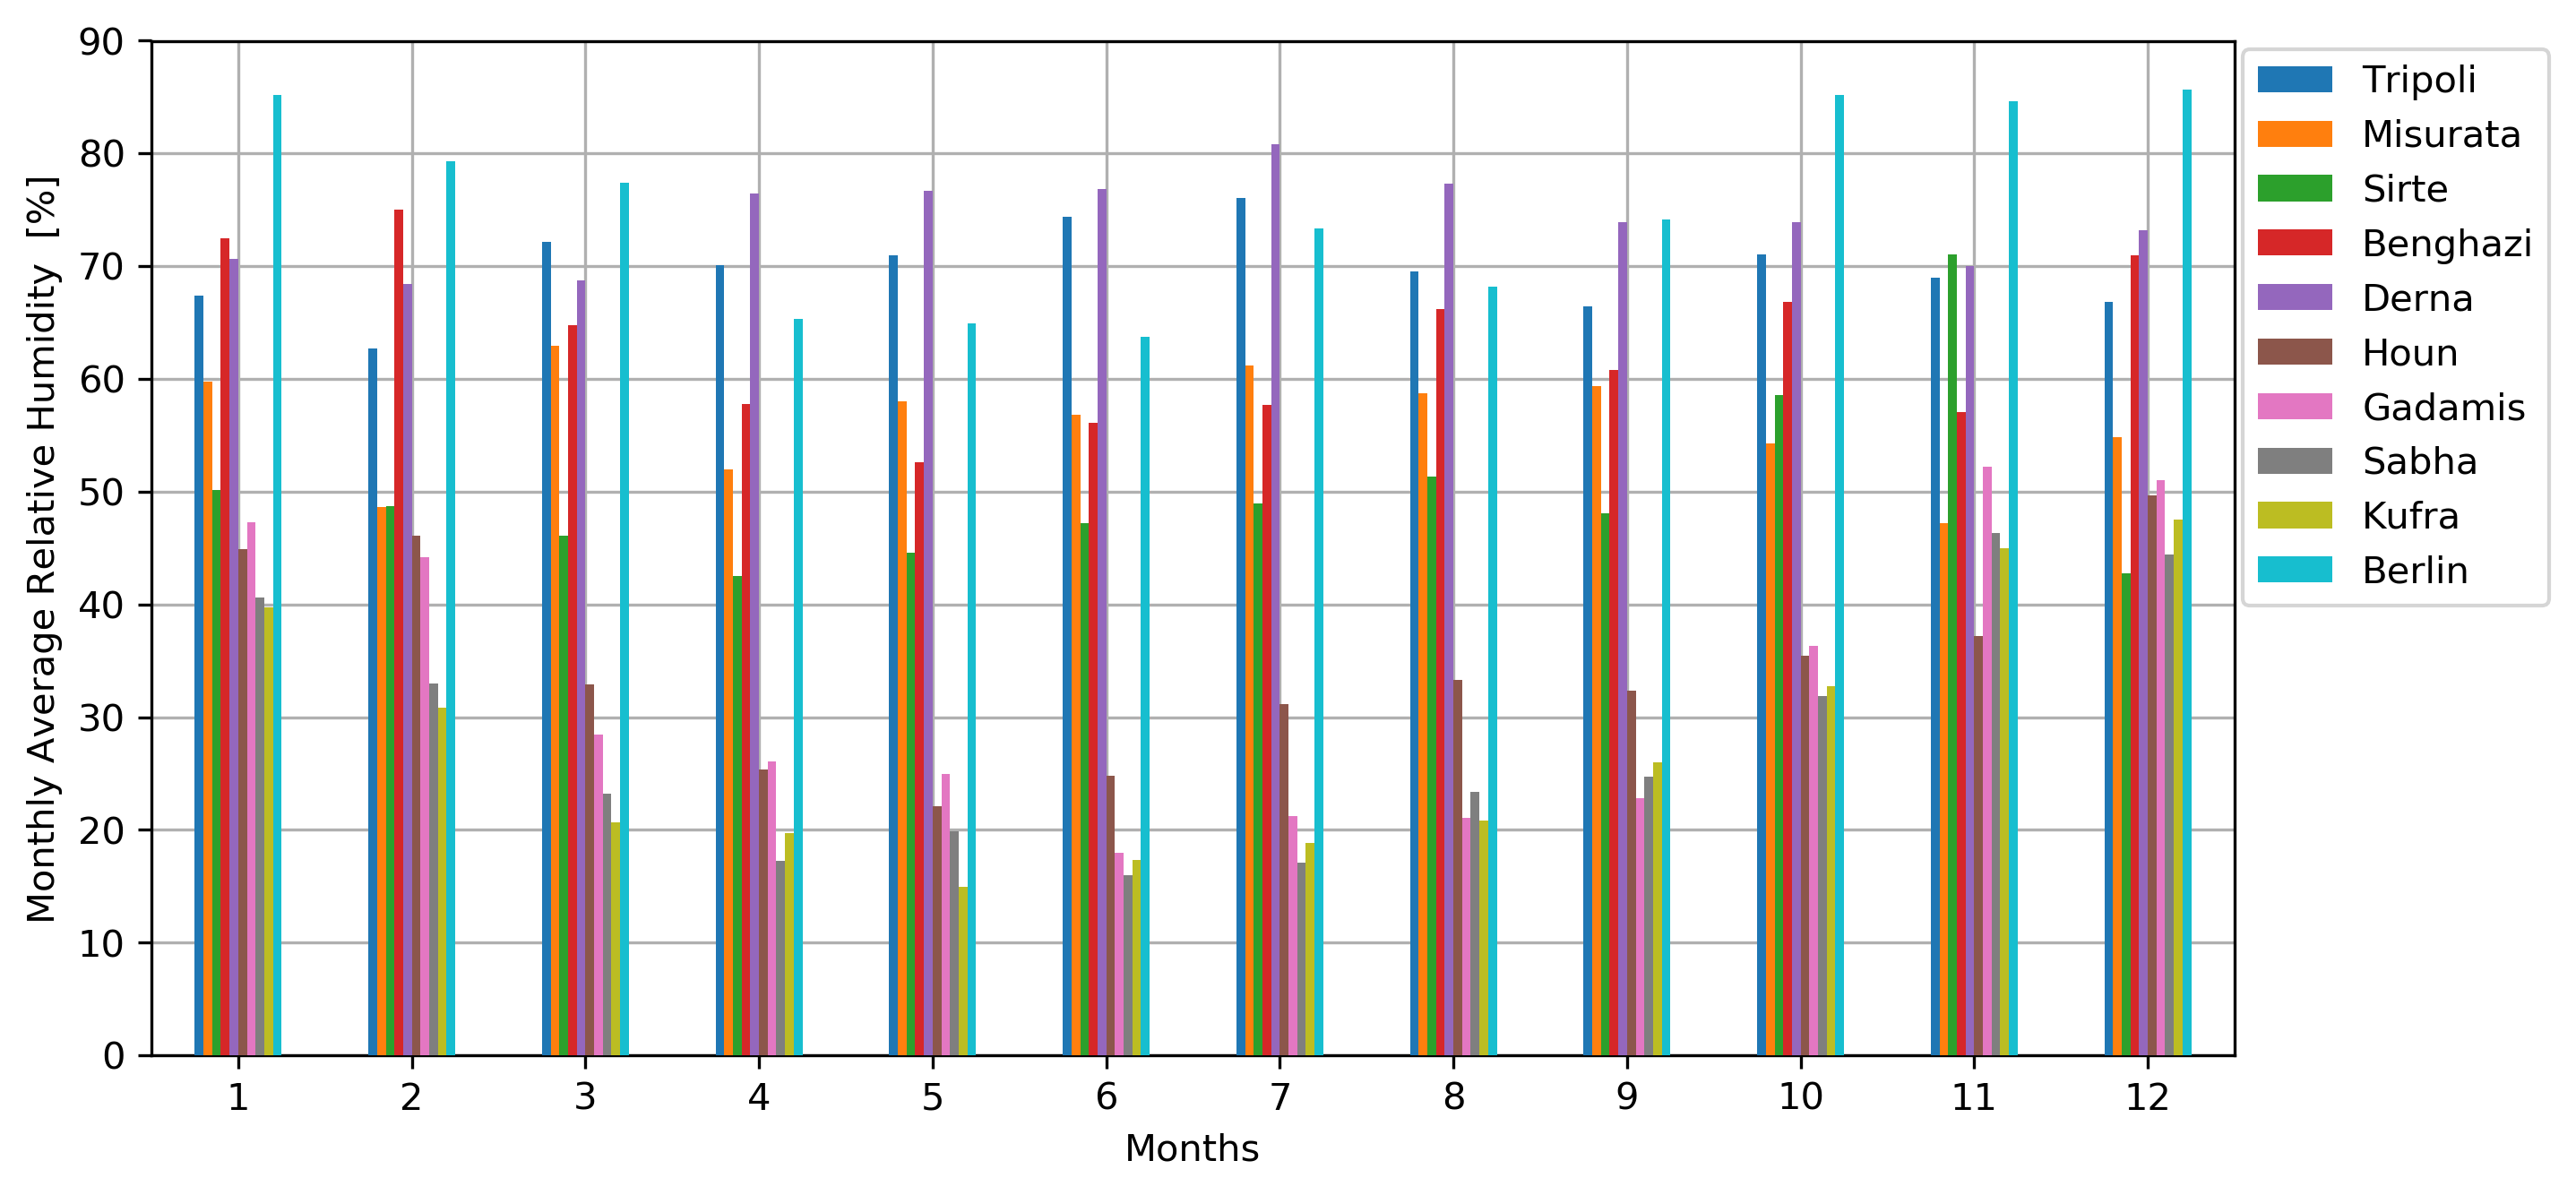

In [40]:
plt.rcParams['figure.figsize'] = [10, 5.0]
plt.rcParams['figure.dpi'] = 300

RH_comparison.plot.bar(zorder=3)
plt.xticks(rotation=0)
plt.xlabel('Months');
plt.ylabel('Monthly Average Relative Humidity  [%]');
plt.legend(bbox_to_anchor=(1.16, 1.01),loc='upper right')
plt.grid()

In [41]:
print(RH_comparison.describe())

         Tripoli   Misurata      Sirte   Benghazi      Derna       Houn  \
count  12.000000  12.000000  12.000000  12.000000  12.000000  12.000000   
mean   69.701956  56.129931  49.993402  63.172368  73.894775  34.607432   
std     3.646072   4.898445   7.891718   7.237703   3.873449   8.684900   
min    62.669792  47.180917  42.494403  52.610551  68.398601  22.135470   
25%    67.240178  53.704783  45.687893  57.534707  70.492023  29.691694   
50%    69.794915  57.389257  48.403290  62.740971  73.861754  33.108044   
75%    71.326368  59.423307  50.442671  67.862849  76.732491  39.127004   
max    76.024758  62.920242  71.017222  74.992485  80.829772  49.637944   

         Gadamis      Sabha      Kufra     Berlin  
count  12.000000  12.000000  12.000000  12.000000  
mean   32.793987  28.143685  27.844997  75.583039  
std    12.710424  10.884393  11.210289   8.559286  
min    17.954458  15.959319  14.948683  63.743000  
25%    22.393163  19.228214  19.495382  67.460686  
50%    27.26

In [42]:
i=0;
cities=['Tripoli','Misurata','Sirte','Benghazi','Derna','Houn','Gadamis','Sabha','Kufra','Berlin']
df_locs=[df_Trip, df_Mis, df_Sirte, df_Beng,df_Derna, df_Houn, df_Gadam, df_Sabha, df_Kufra, df_Berlin]
df_lat=[32.885, 32.0, 31.19, 32.110, 32.7556, 28.65, 30.124, 27.042, 24.200, 52.5200]
df_lon=[13.182, 15.0, 16.57, 20.084, 22.6377, 15.97, 9.490, 14.425, 23.289, 13.4050]


for df_locsi in df_locs:
    df_tmy=df_locsi
    location = pvlib.location.Location(latitude=df_lat[i],longitude=df_lon[i])
    times = df_tmy.index - pd.Timedelta('30min')
    solar_position = location.get_solarposition(times)
    solar_position.index += pd.Timedelta('30min')
    tracker_data = pvlib.tracking.singleaxis(solar_position['apparent_zenith'],
                                         solar_position['azimuth'],
                                         axis_azimuth=180,)
    tilt = tracker_data['surface_tilt'].fillna(0)
    azimuth = tracker_data['surface_azimuth'].fillna(0)
    df_poa_tracker = pvlib.irradiance.get_total_irradiance(surface_tilt=tilt,
                                                       surface_azimuth=azimuth,
                                                       dni=df_tmy['Gb(n)'],
                                                       ghi=df_tmy['G(h)'],
                                                       dhi=df_tmy['Gd(h)'],
                                                       solar_zenith=solar_position['apparent_zenith'],
                                                       solar_azimuth=solar_position['azimuth'])
    tracker_poa = df_poa_tracker['poa_global']

    parameters = pvlib.temperature.TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_polymer']
    cell_temperature = pvlib.temperature.sapm_cell(tracker_poa,
                                               df_tmy['T2m'],
                                               df_tmy['WS10m'],
                                               **parameters)
  
    gamma_pdc = -0.004  # divide by 100 to go from %/°C to 1/°C
    nameplate = 1e3
    array_power = pvlib.pvsystem.pvwatts_dc(tracker_poa, cell_temperature, nameplate, gamma_pdc)
      
    pdc0 = 800/0.96  # W
    ac = pvlib.inverter.pvwatts(array_power, pdc0)
    
    df_locsi['azimuth']=azimuth
    df_locsi['tilt']=tilt
    df_locsi['POA_Track']=tracker_poa
    df_locsi['PW_DC']=array_power
    df_locsi['PW_AC']=ac
    df_locsi['poa_global']= df_poa_tracker['poa_global']
    df_locsi['poa_direct']= df_poa_tracker['poa_direct']
    df_locsi['poa_diffuse']= df_poa_tracker['poa_diffuse']
    df_locsi['poa_sky_diffuse']= df_poa_tracker['poa_sky_diffuse']
    df_locsi['poa_ground_diffuse']= df_poa_tracker['poa_ground_diffuse']
    df_locsi['solar_azimuth']= solar_position['azimuth']
    df_locsi['solar_zenith']= solar_position['apparent_zenith']
    i=i+1
    
    
# df_Trip

In [43]:
# tilt
# parameters
# cell_temperature
# df_poa_tracker
# # azimuth
# tracker_data.head(24)

# df_Trip.describe()

# df_Trip['azimuth'].mean()
# df_Trip['solar_azimuth'].mean()
# df_Trip['solar_zenith'].mean()

## Calculating Net Capacity Factor

For demonstration purposes, we'll assume a 1kW array with a temperature coefficient of -0.4%/°C:

### Capacity Factor for all locations

In [44]:
ghi_comparison_and_Berlin

Tripoli   Misurata      Sirte   Benghazi      Derna       Houn  \
1   101028.55  109510.65  111512.95   93366.00   91162.15  130710.55   
2   120587.15  123550.00  127766.00  101848.95   96660.00  131054.00   
3   163982.00  174069.15  183506.00  169262.00  165761.00  192105.00   
4   189788.00  201104.00  208174.00  199303.00  186100.55  226501.00   
5   238200.00  235364.35  237945.70  206362.05  231774.00  231528.45   
6   222965.05  233645.40  226754.80  242921.45  239275.30  243540.85   
7   250964.20  255145.00  256146.65  256634.95  253433.85  259247.35   
8   229621.00  237282.00  238982.75  236137.00  231528.00  244888.00   
9   188816.90  191455.05  194723.00  186792.00  186872.00  208186.25   
10  142036.00  142461.00  138559.00  142277.80  131993.30  168458.00   
11  112729.00  114921.20  106987.00  118584.10  110755.45  134268.00   
12   90866.20   98449.85  100587.00   92463.25   74532.00  114965.05   

      Gadamis      Sabha      Kufra     Berlin  
1   130192.80  136025.00  152102.00   15925.40  
2   137040.40  135629.00  161865.30   40573.90  
3   203627.20  190603.35  210498.00   76284.00  
4   226066.00  210896.00  231109.80  127173.50  
5   245205.75  240538.95  237740.80  166794.70  
6   234703.35  248106.75  252267.00  182560.55  
7   259026.00  256691.00  258233.25  158569.00  
8   239766.00  240050.40  234802.35  146577.00  
9   199959.00  203035.95  218292.55   89548.00  
10  158846.00  181569.00  189685.00   54511.00  
11  127855.00  138140.00  158597.00   27152.00  
12  114487.80  121941.25  144407.00   15628.90

In [45]:
cities=['Tripoli','Misurata','Sirte','Benghazi','Derna','Houn','Gadamis','Sabha','Kufra','Berlin']
df_dt=['df_Trip', 'df_Mis', 'df_Sirte', 'df_Beng', 'df_Derna', 'df_Houn', 'df_Gadam', 'df_Sabha', 'df_Kufra', 'df_Berlin']

df_tem=pd.DataFrame({'Tripoli':df_Trip['POA_Track'].resample('M').sum()})

for i in np.arange(len(cities)):
    df_tem[cities[i]]=vars()[df_dt[i]]['POA_Track'].resample('M').sum()

poa_comparison_and_Berlin=df_tem

# poa_comparison_and_Berlin.describe()
poa_comparison_and_Berlin


df_tem=pd.DataFrame({'Tripoli':df_Trip['PW_DC'].resample('M').sum()})

for i in np.arange(len(cities)):
    df_tem[cities[i]]=vars()[df_dt[i]]['PW_DC'].resample('M').sum()

pwdc_comparison_and_Berlin=df_tem

# pwdc_comparison_and_Berlin.describe()
pwdc_comparison_and_Berlin


df_tem=pd.DataFrame({'Tripoli':df_Trip['PW_AC'].resample('M').sum()})

for i in np.arange(len(cities)):
    df_tem[cities[i]]=vars()[df_dt[i]]['PW_AC'].resample('M').sum()

pwac_comparison_and_Berlin=df_tem

# pwac_comparison_and_Berlin.describe()
pwac_comparison_and_Berlin



df_tem=pd.DataFrame({'Tripoli':df_Trip['Gb(n)'].resample('M').sum()})

for i in np.arange(len(cities)):
    df_tem[cities[i]]=vars()[df_dt[i]]['Gb(n)'].resample('M').sum()

dni_comparison_and_Berlin=df_tem

# dni_comparison_and_Berlin.describe()
dni_comparison_and_Berlin



df_tem=pd.DataFrame({'Tripoli':df_Trip['poa_direct'].resample('M').sum()})

for i in np.arange(len(cities)):
    df_tem[cities[i]]=vars()[df_dt[i]]['poa_direct'].resample('M').sum()

poadni_comparison_and_Berlin=df_tem

# poadni_comparison_and_Berlin.describe()
poadni_comparison_and_Berlin


pwac_comparison_and_Berlin

Tripoli       Misurata          Sirte       Benghazi  \
2021-01-31  121304.675698  128728.289807  130481.892924  107871.789878   
2021-02-28  145453.306782  144289.773358  154472.761414  115179.738810   
2021-03-31  182366.251356  194116.335306  203738.426483  194040.217660   
2021-04-30  199774.656504  209957.755631  216778.675949  210375.873014   
2021-05-31  248452.219710  242299.480222  243130.967570  213308.928808   
2021-06-30  231874.450673  239595.877656  236564.713243  250269.867735   
2021-07-31  263532.034685  266809.571385  265624.566853  269486.971124   
2021-08-31  243111.455686  251151.408128  251631.878137  253257.187241   
2021-09-30  204388.639885  207159.073771  209341.473421  202911.791176   
2021-10-31  156598.414099  156900.271149  149543.935301  159943.835716   
2021-11-30  131544.702479  132565.070980  121332.237460  142442.773642   
2021-12-31  108479.158898  118472.344196  115806.118420  105889.612008   

                    Derna           Houn        Gadamis          Sabha  \
2021-01-31  106018.145179  154854.647836  162186.562172  164869.807165   
2021-02-28  109448.662768  146029.510305  165752.278250  163615.123655   
2021-03-31  184562.622696  211562.198642  228224.527909  206996.981884   
2021-04-30  202672.049028  232216.723033  238480.105500  214443.221854   
2021-05-31  239529.285228  226007.973944  246165.775194  242021.401382   
2021-06-30  252567.314456  240140.555962  229201.439295  249191.526277   
2021-07-31  274822.052077  260077.687166  261480.450866  262366.160276   
2021-08-31  249800.114012  250450.625992  247052.630693  248218.364343   
2021-09-30  206717.024162  221500.778545  209033.232175  212978.844493   
2021-10-31  146660.648331  184449.215135  180511.218825  205718.102880   
2021-11-30  128883.375376  157437.698452  147148.189722  156642.542832   
2021-12-31   86855.073904  135726.455348  136496.932436  145290.926275   

                    Kufra         Berlin  
2021-01-31  177935.404412   18892.076159  
2021-02-28  179437.289710   51969.885652  
2021-03-31  231338.467748   89773.143893  
2021-04-30  235111.725596  149575.609223  
2021-05-31  232048.525108  185867.712107  
2021-06-30  251023.839658  202956.735440  
2021-07-31  261428.772476  170380.988756  
2021-08-31  236670.188461  166492.811670  
2021-09-30  229381.257563  101647.556560  
2021-10-31  217727.601148   62831.537236  
2021-11-30  187636.960710   33209.940580  
2021-12-31  171875.782151   19078.972851

### Note: 4729 hours of average annual sun hours in Libya

In [46]:
typical_hrs=4729
# typical_hrs=df_Sirte[df_Sirte['Gb(n)']>0.01].count()[0]

In [47]:
# df_Sirte[df_Sirte['G(h)']>0.01].count()[0]
# # df_Mis[df_Mis['G(h)']>0.01].count()[0]
# dg0=df_Mis[df_Mis['G(h)']>0.1]
# plt.plot(df_Mis['2021-01']['G(h)'],':',
#         dg0['2021-01']['G(h)'],'-')

# dg0['2021-01']['G(h)'].head(24)
# df_Mis['2021-06-12']['G(h)'].head(24)
# df_Berlin['2021-10-19']['G(h)'].head(24)

In [48]:
# ghi_comparison_and_Berlin.describe()
rating_pw=1000
day_hrs=df_Sirte[df_Sirte['G(h)']>0.01].count()[0]
day_hrs=typical_hrs
ghi_comparison_and_Berlin.sum()
GHI_CFs=ghi_comparison_and_Berlin.sum()/(day_hrs*rating_pw)

GHI_CFs

Tripoli     0.433830
Misurata    0.447654
Sirte       0.450760
Benghazi    0.432640
Derna       0.422890
Houn        0.483285
Gadamis     0.481450
Sabha       0.487043
Kufra       0.517995
Berlin      0.232882
dtype: float64

In [49]:
rating_pw=1000
day_hrs=df_Sirte[df_Sirte['G(h)']>0.01].count()[0]
day_hrs=typical_hrs
poa_comparison_and_Berlin.sum()
POA_CFs=poa_comparison_and_Berlin.sum()/(day_hrs*rating_pw)

POA_CFs

Tripoli     0.538279
Misurata    0.554033
Sirte       0.555556
Benghazi    0.535881
Derna       0.522464
Houn        0.593843
Gadamis     0.602020
Sabha       0.606654
Kufra       0.648138
Berlin      0.284139
dtype: float64

In [50]:
rating_pw=1000
day_hrs=df_Sirte[df_Sirte['G(h)']>0.01].count()[0]
day_hrs=typical_hrs
pwdc_comparison_and_Berlin.sum()
PWDC_CFs=pwdc_comparison_and_Berlin.sum()/(day_hrs*rating_pw)

PWDC_CFs

Tripoli     0.499001
Misurata    0.512897
Sirte       0.515920
Benghazi    0.498632
Derna       0.492705
Houn        0.545671
Gadamis     0.547774
Sabha       0.553102
Kufra       0.587502
Berlin      0.277328
dtype: float64

In [51]:
rating_pw=1000
day_hrs=df_Sirte[df_Sirte['G(h)']>0.01].count()[0]
day_hrs=typical_hrs
pwac_comparison_and_Berlin.sum()
PWAC_CFs=pwac_comparison_and_Berlin.sum()/(day_hrs*rating_pw)

PWAC_CFs

Tripoli     0.473013
Misurata    0.484679
Sirte       0.486032
Benghazi    0.470497
Derna       0.462791
Houn        0.511832
Gadamis     0.518446
Sabha       0.522807
Kufra       0.552255
Berlin      0.264893
dtype: float64

In [52]:
# dni_comparison_and_Berlin.describe()
rating_pw=1000
dni_day_hrs=df_Sirte[df_Sirte['Gb(n)']>0.01].count()[0]
dni_day_hrs=typical_hrs
dni_comparison_and_Berlin.sum()
DNI_CFs=dni_comparison_and_Berlin.sum()/(dni_day_hrs*rating_pw)

DNI_CFs

Tripoli     0.480438
Misurata    0.491524
Sirte       0.490356
Benghazi    0.475489
Derna       0.446249
Houn        0.538249
Gadamis     0.552813
Sabha       0.551281
Kufra       0.585554
Berlin      0.223141
dtype: float64

In [53]:
# dni_comparison_and_Berlin.describe()
rating_pw=1000
dni_day_hrs=df_Sirte[df_Sirte['Gb(n)']>0.01].count()[0]
dni_day_hrs=typical_hrs
poadni_comparison_and_Berlin.sum()
POA_DNI_CFs=poadni_comparison_and_Berlin.sum()/(dni_day_hrs*rating_pw)

POA_DNI_CFs

Tripoli     0.410475
Misurata    0.420456
Sirte       0.423268
Benghazi    0.408298
Derna       0.390651
Houn        0.464438
Gadamis     0.472614
Sabha       0.479424
Kufra       0.516174
Berlin      0.174912
dtype: float64

In [54]:
# CFs_dict={'GHI': GHI_CFs, 'DNI':DNI_CFs}
CFs_dict={'GHI_CFs': GHI_CFs, 'POA_CFs':POA_CFs, 'PWDC_CFs':PWDC_CFs, 'PWAC_CFs':PWAC_CFs, 'DNI_CFs':DNI_CFs,'POA_DNI_CFs':POA_DNI_CFs}

df_ghi_poa_pw_dni_cfs=pd.DataFrame(CFs_dict)
df_ghi_poa_pw_dni_cfs

GHI_CFs   POA_CFs  PWDC_CFs  PWAC_CFs   DNI_CFs  POA_DNI_CFs
Tripoli   0.433830  0.538279  0.499001  0.473013  0.480438     0.410475
Misurata  0.447654  0.554033  0.512897  0.484679  0.491524     0.420456
Sirte     0.450760  0.555556  0.515920  0.486032  0.490356     0.423268
Benghazi  0.432640  0.535881  0.498632  0.470497  0.475489     0.408298
Derna     0.422890  0.522464  0.492705  0.462791  0.446249     0.390651
Houn      0.483285  0.593843  0.545671  0.511832  0.538249     0.464438
Gadamis   0.481450  0.602020  0.547774  0.518446  0.552813     0.472614
Sabha     0.487043  0.606654  0.553102  0.522807  0.551281     0.479424
Kufra     0.517995  0.648138  0.587502  0.552255  0.585554     0.516174
Berlin    0.232882  0.284139  0.277328  0.264893  0.223141     0.174912

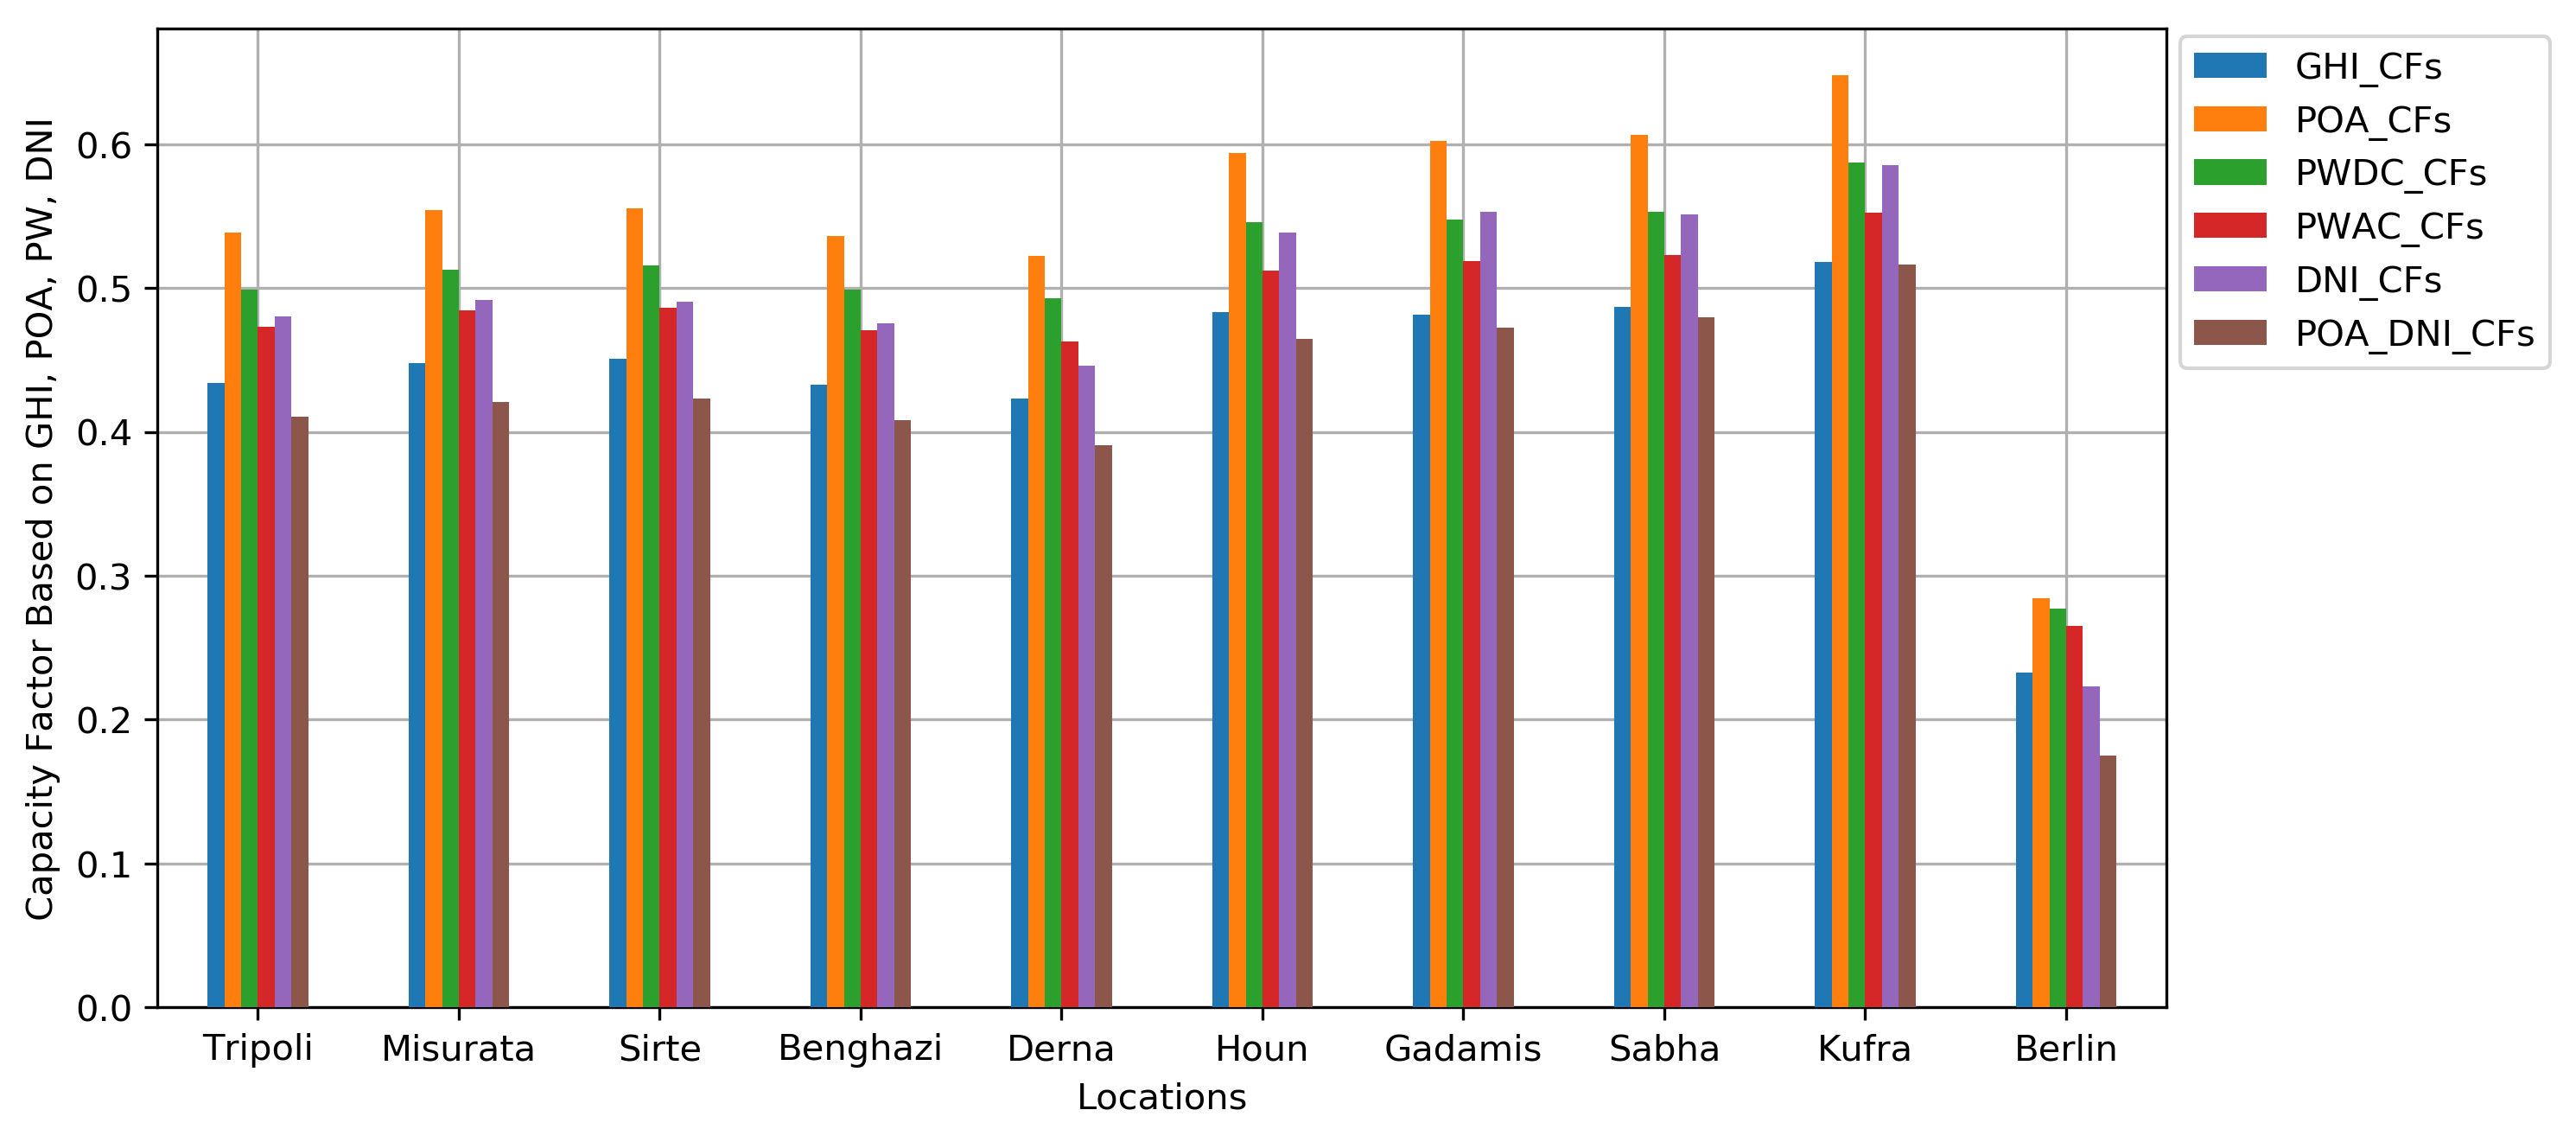

In [55]:
plt.rcParams['figure.figsize'] = [10, 5.0]
plt.rcParams['figure.dpi'] = 300

df_ghi_poa_pw_dni_cfs.plot.bar(zorder=3)
# plt.yticks(np.arange(0, 1, 0.1))
plt.xticks(rotation=0)
# plt.title('Capacity Factors Based on GHI and DNI')
plt.xlabel('Locations');
plt.ylabel('Capacity Factor Based on GHI, POA, PW, DNI');
# plt.legend(bbox_to_anchor=(1.2, 1.02),loc='upper right')
plt.legend(bbox_to_anchor=(1.2,1.01),loc='upper right')

plt.grid()

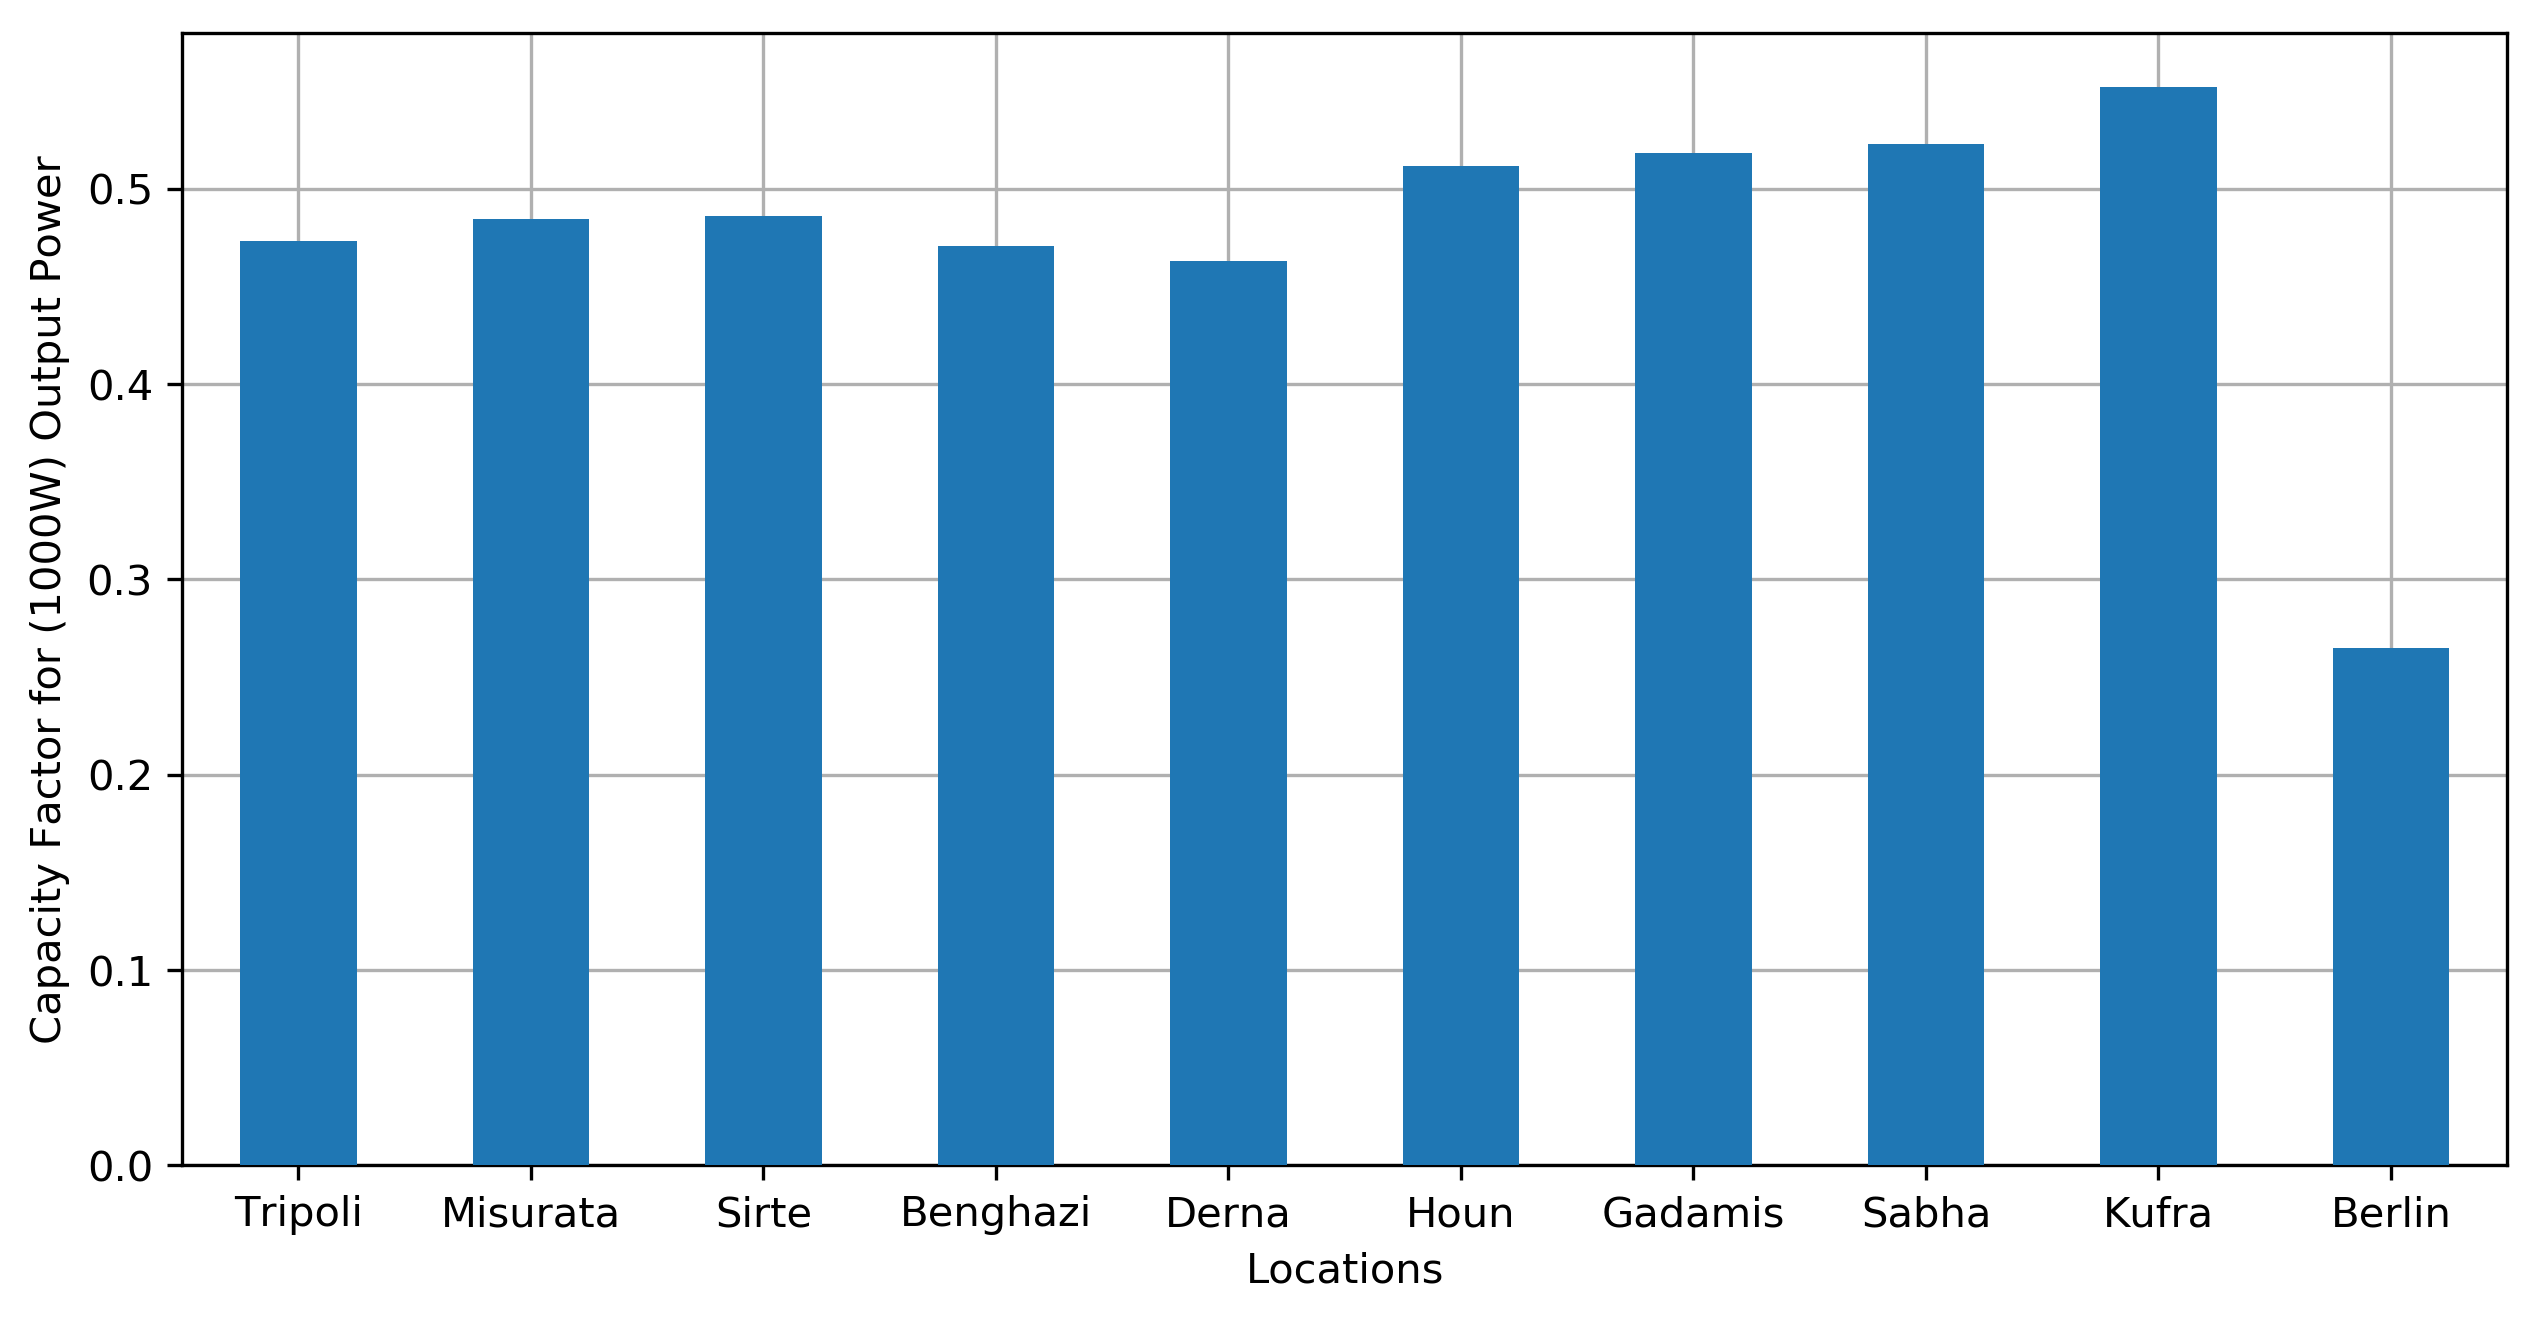

In [56]:
plt.rcParams['figure.figsize'] = [10, 5.0]
plt.rcParams['figure.dpi'] = 300

PWAC_CFs.plot.bar(zorder=3)
# plt.yticks(np.arange(0, 1, 0.1))
plt.xticks(rotation=0)
# plt.title('Capacity Factors Based on GHI and DNI')
plt.xlabel('Locations');
plt.ylabel('Capacity Factor for (1000W) Output Power');
# plt.legend(bbox_to_anchor=(1.2, 1.02),loc='upper right')
# plt.legend(bbox_to_anchor=(1.08,1.01),loc='upper right')

plt.grid()

### Using Clear Sky Irradiance as a Varibility Indication for the given locations 

In [57]:
cities=['Tripoli','Misurata','Sirte','Benghazi','Derna','Houn','Gadamis','Sabha','Kufra','Berlin']
df_dt=['df_Trip', 'df_Mis', 'df_Sirte', 'df_Beng', 'df_Derna', 'df_Houn', 'df_Gadam', 'df_Sabha', 'df_Kufra', 'df_Berlin']

df_tem=pd.DataFrame({'Tripoli':df_Trip['cl_ghi'].resample('M').sum()})

for i in np.arange(len(cities)):
    df_tem[cities[i]]=vars()[df_dt[i]]['cl_ghi'].resample('M').sum()

ghi_clsky_comparison=df_tem

ghi_clsky_comparison.describe()
# ghi_clsky_comparison

Tripoli       Misurata          Sirte       Benghazi  \
count      12.000000      12.000000      12.000000      12.000000   
mean   189735.427265  191370.543093  192895.815358  191304.492393   
std     61229.738194   59903.878613   58663.475183   60120.748034   
min    104766.463876  108177.191161  111492.686153  107984.783222   
25%    129691.730893  132411.657619  134866.248872  131983.413130   
50%    195065.309431  196755.510254  198347.400437  197580.369530   
75%    246984.508411  247548.744420  247863.306598  247170.974287   
max    264558.256008  264503.705783  264428.387892  264584.904641   

               Derna           Houn        Gadamis          Sabha  \
count      12.000000      12.000000      12.000000      12.000000   
mean   189812.220669  197501.220238  195007.028228  200412.053223   
std     60935.393454   54515.683578   56734.725038   51962.361974   
min    105414.295639  121099.576897  115716.121958  127113.451733   
25%    129684.847380  143085.158922  138648.163183  147626.944319   
50%    195006.082238  203887.323616  201505.263355  207462.355427   
75%    246324.264208  249034.308441  247801.297716  249436.708111   
max    264733.615738  263426.158293  263676.549885  262606.525623   

               Kufra         Berlin  
count      12.000000      12.000000  
mean   205040.957262  142115.592858  
std     46796.458974   86963.733925  
min    138460.284184   30683.222519  
25%    156566.270041   62119.257516  
50%    213063.654397  138788.858728  
75%    249053.704255  219463.470052  
max    260172.831317  257820.406928

In [58]:
ghi_variability=1-ghi_comparison_and_Berlin.sum()/ghi_clsky_comparison.sum()
ghi_variability

Tripoli     0.098928
Misurata    0.078159
Sirte       0.079104
Benghazi    0.108771
Derna       0.122006
Houn        0.035680
Gadamis     0.027054
Sabha       0.042295
Kufra       0.004427
Berlin      0.354224
dtype: float64

In [59]:
cities=['Tripoli','Misurata','Sirte','Benghazi','Derna','Houn','Gadamis','Sabha','Kufra','Berlin']
df_dt=['df_Trip', 'df_Mis', 'df_Sirte', 'df_Beng', 'df_Derna', 'df_Houn', 'df_Gadam', 'df_Sabha', 'df_Kufra', 'df_Berlin']

df_tem=pd.DataFrame({'Tripoli':df_Trip['cl_dni'].resample('M').sum()})

for i in np.arange(len(cities)):
    df_tem[cities[i]]=vars()[df_dt[i]]['cl_dni'].resample('M').sum()

dni_clsky_comparison=df_tem

dni_clsky_comparison.describe()
# dni_clsky_comparison

Tripoli       Misurata          Sirte       Benghazi  \
count      12.000000      12.000000      12.000000      12.000000   
mean   245103.744428  245917.535788  246488.634816  245450.899684   
std     52363.684637   51276.402547   50067.679556   51211.998756   
min    174466.717038  177115.963393  179246.615726  175343.153214   
25%    189144.065824  190731.802695  192298.484228  190302.127267   
50%    248866.417468  249360.523376  250253.739382  251519.707665   
75%    295385.278946  295317.741493  294630.684828  293911.081213   
max    310834.193329  311217.583793  310767.989271  310003.890099   

               Derna           Houn        Gadamis          Sabha  \
count      12.000000      12.000000      12.000000      12.000000   
mean   244721.203367  248177.965309  246832.177386  249180.526137   
std     52081.940582   46233.754015   47383.360650   43979.263165   
min    172803.534877  186374.556881  182238.230119  190021.866531   
25%    188919.773016  198106.320102  194401.007066  200334.419949   
50%    249811.238689  251810.500022  251732.338372  252507.014021   
75%    293315.200230  292606.534077  292015.790787  291105.641466   
max    310152.510495  307979.012149  305069.112130  305570.687890   

               Kufra         Berlin  
count      12.000000      12.000000  
mean   250726.725957  217708.611299  
std     38010.587212   98667.224131  
min    201033.507031   76529.154629  
25%    206993.722885  127745.677197  
50%    255585.893748  225855.524879  
75%    288445.293855  306993.941910  
max    297040.648542  340087.751097

In [60]:
dni_variability=1-dni_comparison_and_Berlin.sum()/dni_clsky_comparison.sum()
dni_variability

Tripoli     0.227541
Misurata    0.212332
Sirte       0.216024
Benghazi    0.236579
Derna       0.281389
Houn        0.145311
Gadamis     0.117399
Sabha       0.128140
Kufra       0.079647
Berlin      0.596083
dtype: float64

In [61]:
cities=['Tripoli','Misurata','Sirte','Benghazi','Derna','Houn','Gadamis','Sabha','Kufra','Berlin']
df_dt=['df_Trip', 'df_Mis', 'df_Sirte', 'df_Beng', 'df_Derna', 'df_Houn', 'df_Gadam', 'df_Sabha', 'df_Kufra', 'df_Berlin']

for i in np.arange(len(cities)):
    vars()[df_dt[i]+'_day']=vars()[df_dt[i]][vars()[df_dt[i]]['G(h)']>0.01]
    

# df_Trip_day.describe()

## GHI Variability for given locations

Removing night hours and data with clsky>1 or clsky=0

In [62]:
df_ghi_variability=[]
cities=['Tripoli','Misurata','Sirte','Benghazi','Derna','Houn','Gadamis','Sabha','Kufra','Berlin']
i=0
dt=[df_Trip_day, df_Mis_day, df_Sirte_day, df_Beng_day, df_Derna_day, df_Houn_day, df_Gadam_day, df_Sabha_day, df_Kufra_day, df_Berlin_day]
for dti in dt:
    dti_ghicl=dti['G(h)']/dti['cl_ghi']   
    dti_ghicl[dti_ghicl>10]=0
    dti_ghicl[dti_ghicl>1]=1
#     dti_ghi_variability=1-dti_ghicl.describe()[1]#mean
    dti_ghi_variability=dti_ghicl.describe()[2]#std deviation

    df_ghi_variability.append(dti_ghi_variability) 
    print('GHI Variability of', cities[i],'=', round(dti_ghi_variability,4))
    i=i+1
    
# dti_ghi_variability
# dti_ghicl.describe()
# GHI_Var_dict= {'Cities': cities, 'GHI Variability':df_ghi_variability}
GHI_Var_dict= {'GHI Variability':df_ghi_variability}
df_ghi_var=pd.DataFrame(GHI_Var_dict)
df_ghi_var.index=cities
# df_ghi_var.columns=cities
# df_ghi_var
# df_ghi_var

GHI Variability of Tripoli = 0.2204
GHI Variability of Misurata = 0.2122
GHI Variability of Sirte = 0.222
GHI Variability of Benghazi = 0.2312
GHI Variability of Derna = 0.241
GHI Variability of Houn = 0.2125
GHI Variability of Gadamis = 0.1738
GHI Variability of Sabha = 0.1997
GHI Variability of Kufra = 0.159
GHI Variability of Berlin = 0.3111


In [63]:
df_noise=1-dti_ghicl
dti_ghicl.describe()
df_noise.describe()
# dti['2021-01-01':'2021-01-30']['G(h)']
# dti['2021-01-01':'2021-01-30']['cl_ghi']
# dti['2021-01-01':'2021-01-30']['cl_ghi']
# dti_ghicl['2021-01-01':'2021-01-30']

count    4183.000000
mean        0.392643
std         0.311109
min         0.000000
25%         0.083242
50%         0.370413
75%         0.669885
max         1.000000
dtype: float64

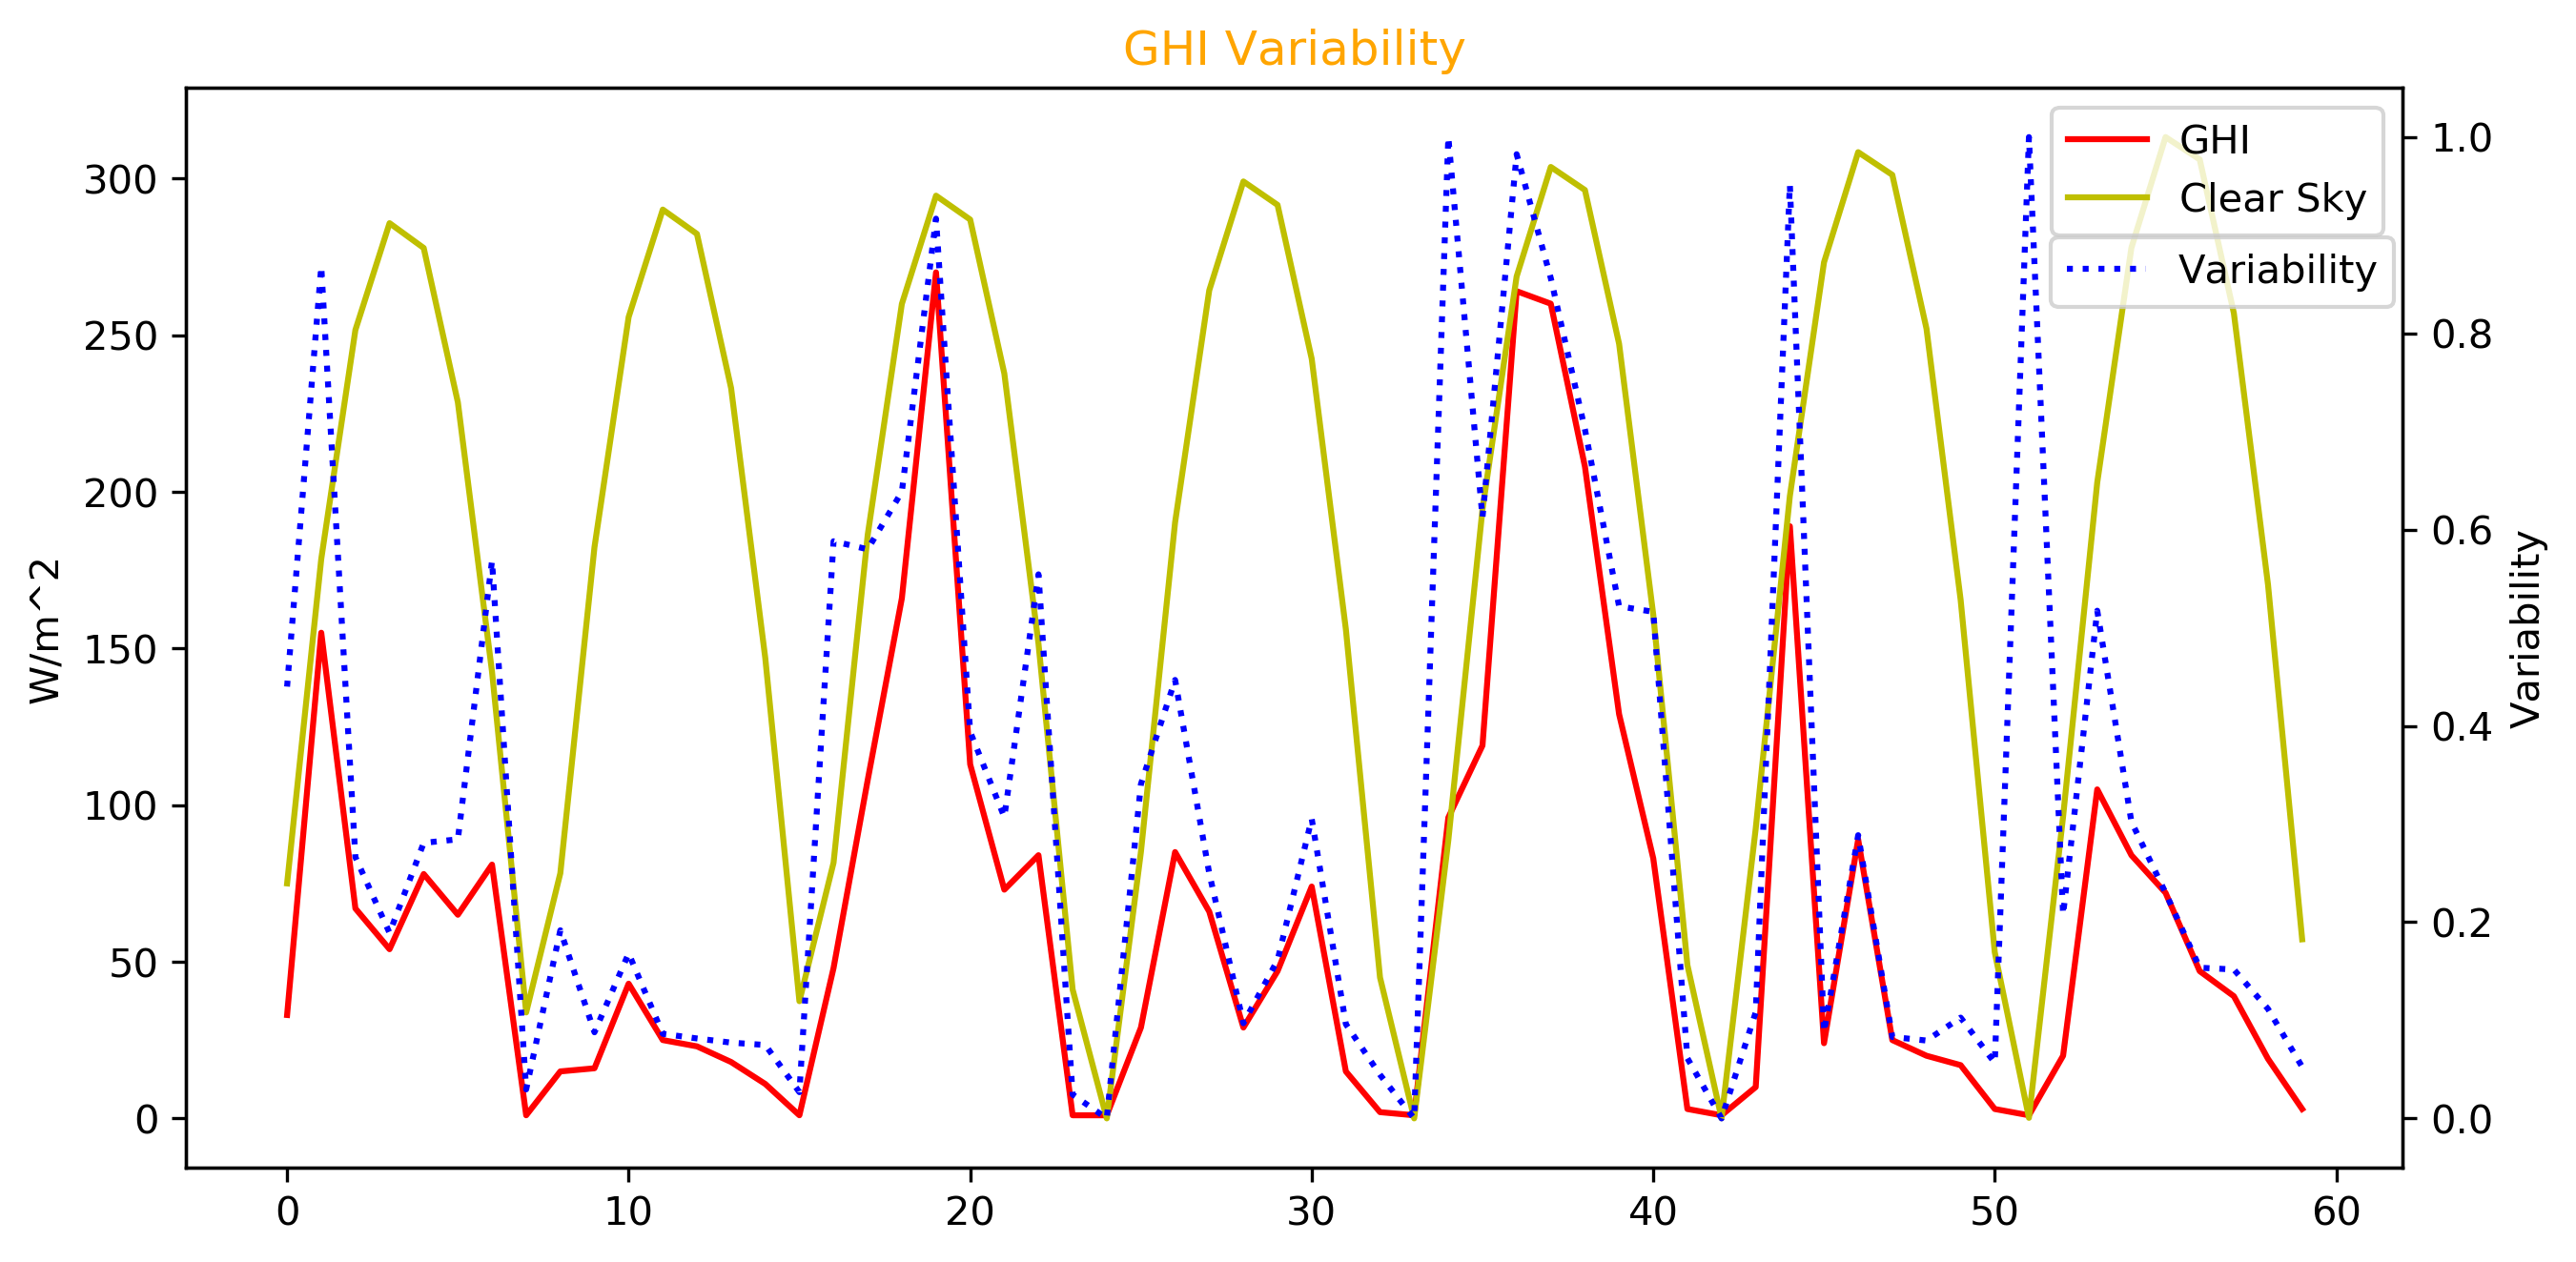

In [64]:
fig, ax1 = plt.subplots()
plt.plot(
dti['2021-01-24':'2021-01-30']['G(h)'].values,'r-',
dti['2021-01-24':'2021-01-30']['cl_ghi'].values,'y-',zorder=3)

plt.title('GHI Variability', color='orange')
plt.ylabel('W/m^2')

plt.legend(['GHI', 'Clear Sky'], loc='upper right')


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Variability')  # we already handled the x-label with ax1
ax2.plot(dti_ghicl['2021-01-24':'2021-01-30'].values,'b:')
ax2.tick_params(axis='y')
ax2.legend(['Variability'],bbox_to_anchor=(1.005, 0.88),loc='upper right')


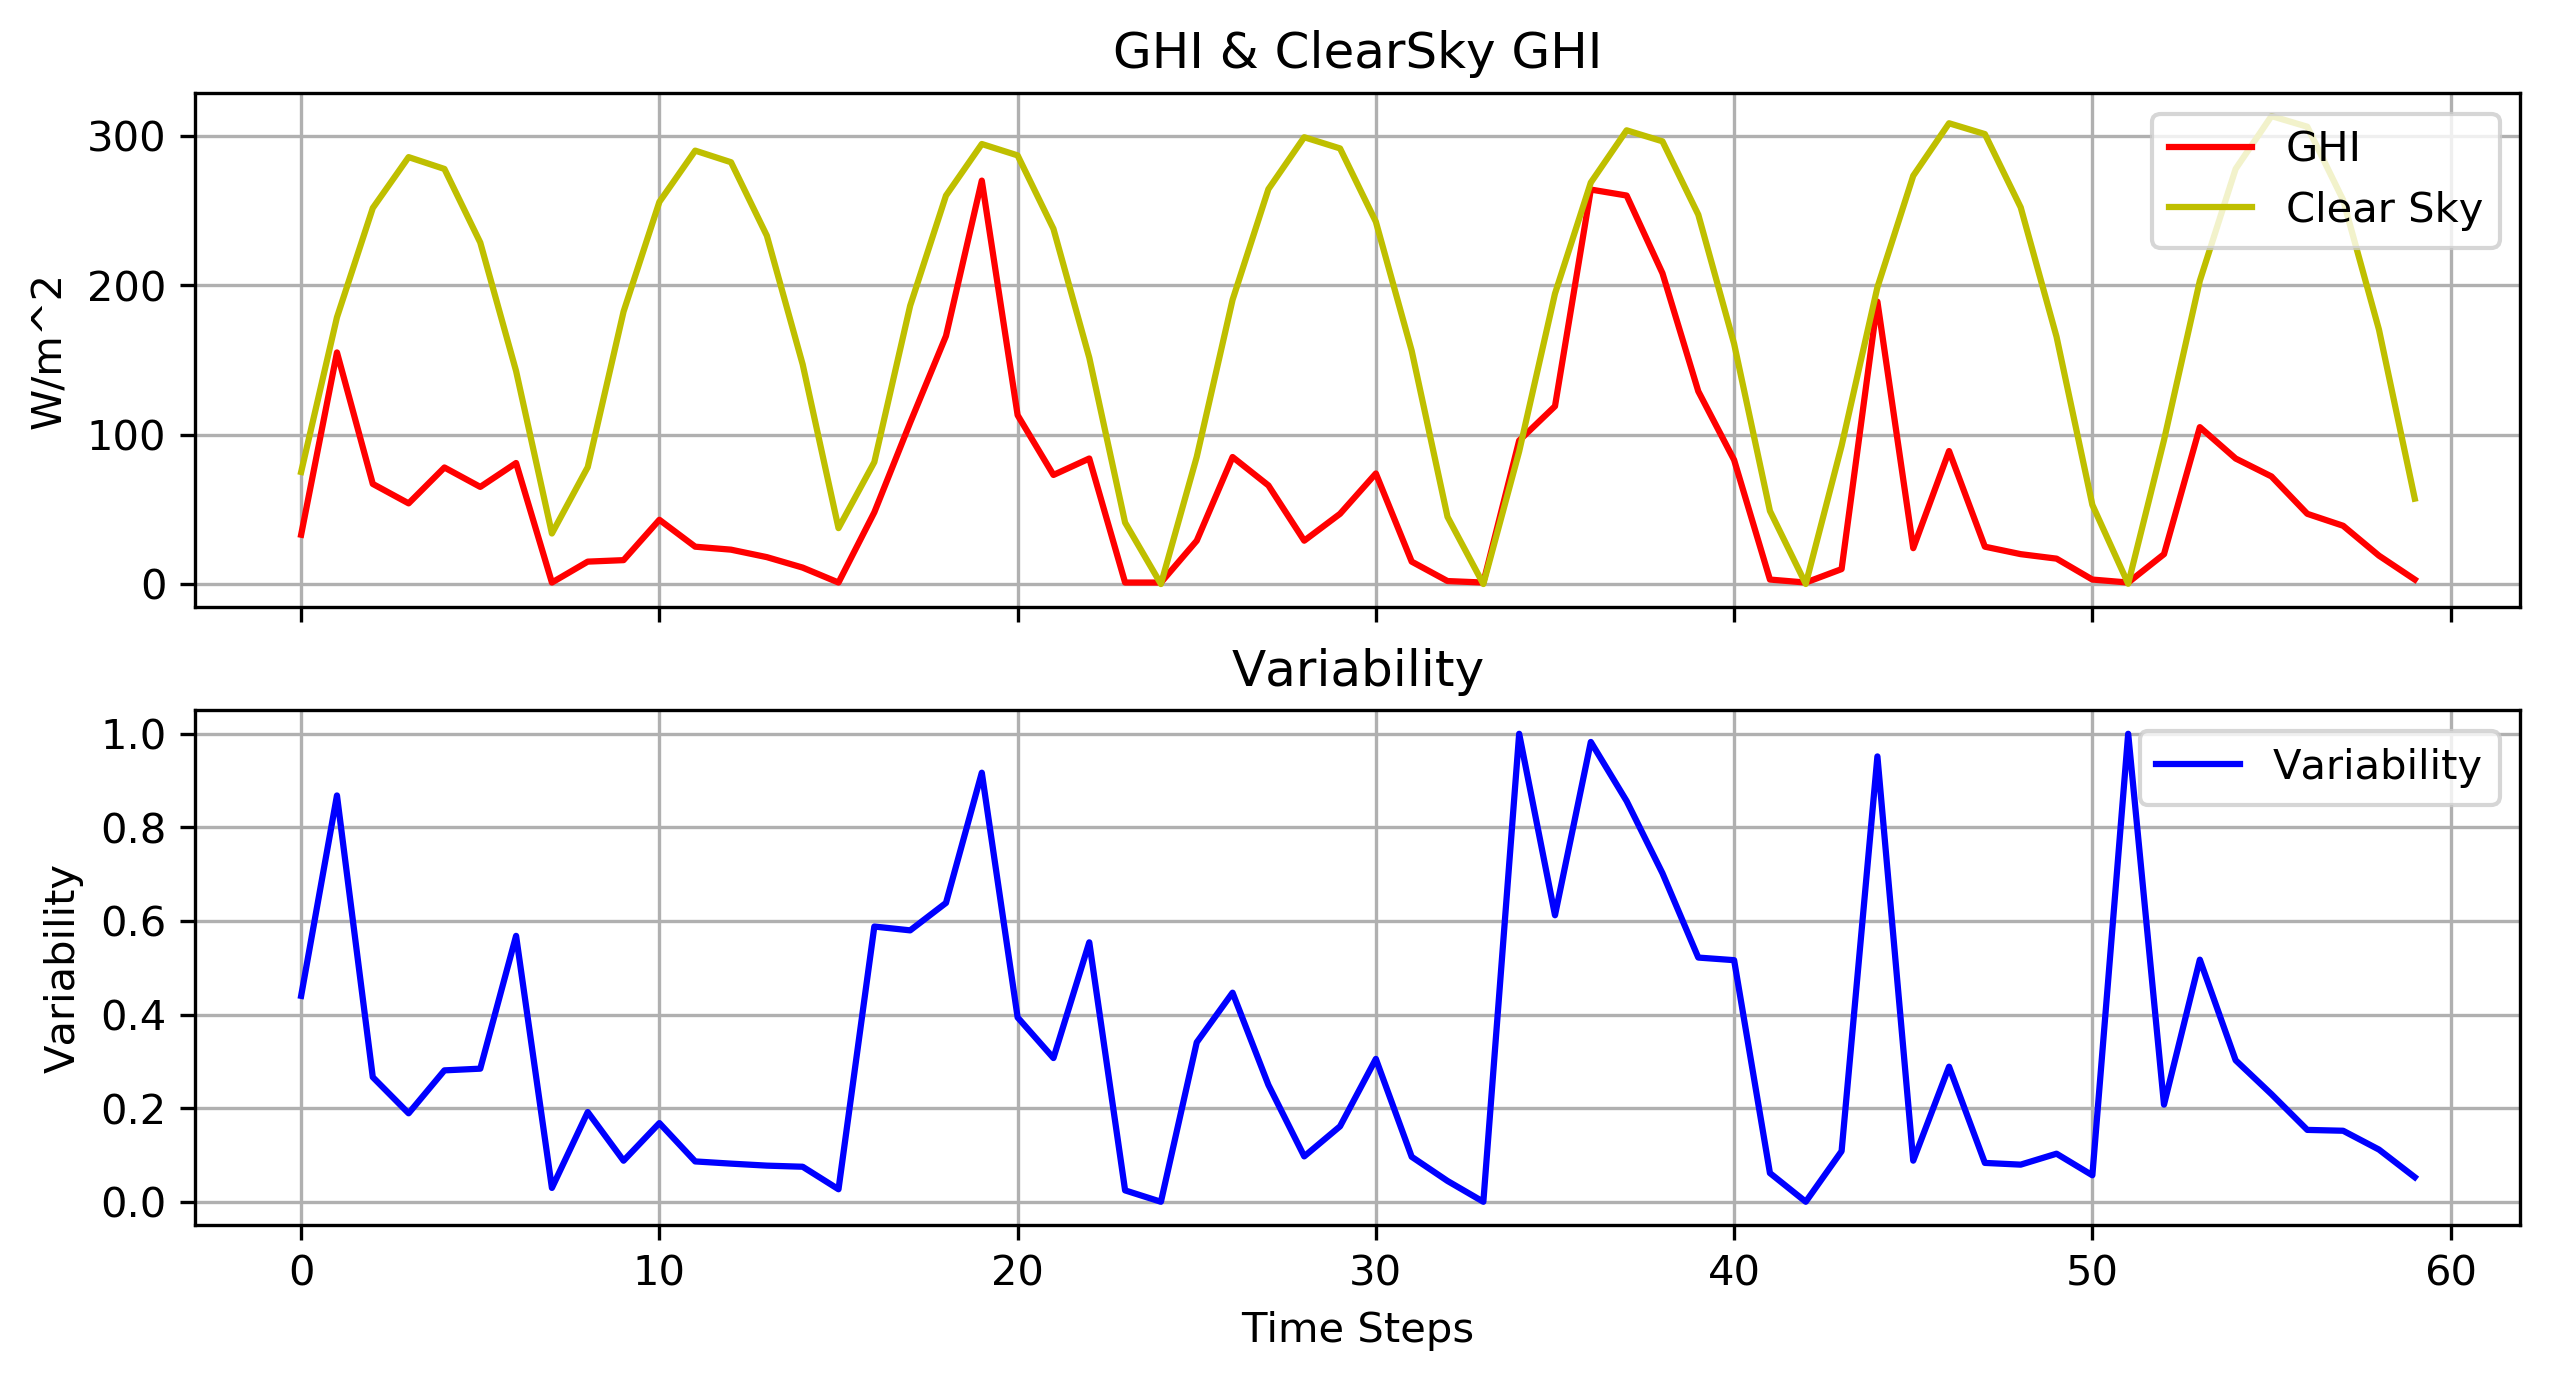

In [65]:
fig, axs = plt.subplots(2)
axs[0].plot(
dti['2021-01-24':'2021-01-30']['G(h)'].values,'r-',
dti['2021-01-24':'2021-01-30']['cl_ghi'].values,'y-',zorder=3)
axs[0].set_title('GHI & ClearSky GHI')
axs[0].set(xlabel='Time Steps', ylabel='W/m^2')
axs[0].legend(['GHI', 'Clear Sky'], loc='upper right')
axs[0].label_outer()
axs[0].grid()


axs[1].plot(dti_ghicl['2021-01-24':'2021-01-30'].values,'b-',zorder=3)
axs[1].set_title('Variability')
axs[1].set(xlabel='Time Steps', ylabel='Variability')
axs[1].legend(['Variability'], loc='upper right')
axs[1].label_outer()
axs[1].grid()


# fig.suptitle('GHI Variability', color='orange')

for ax in axs.flat:
    ax.label_outer()

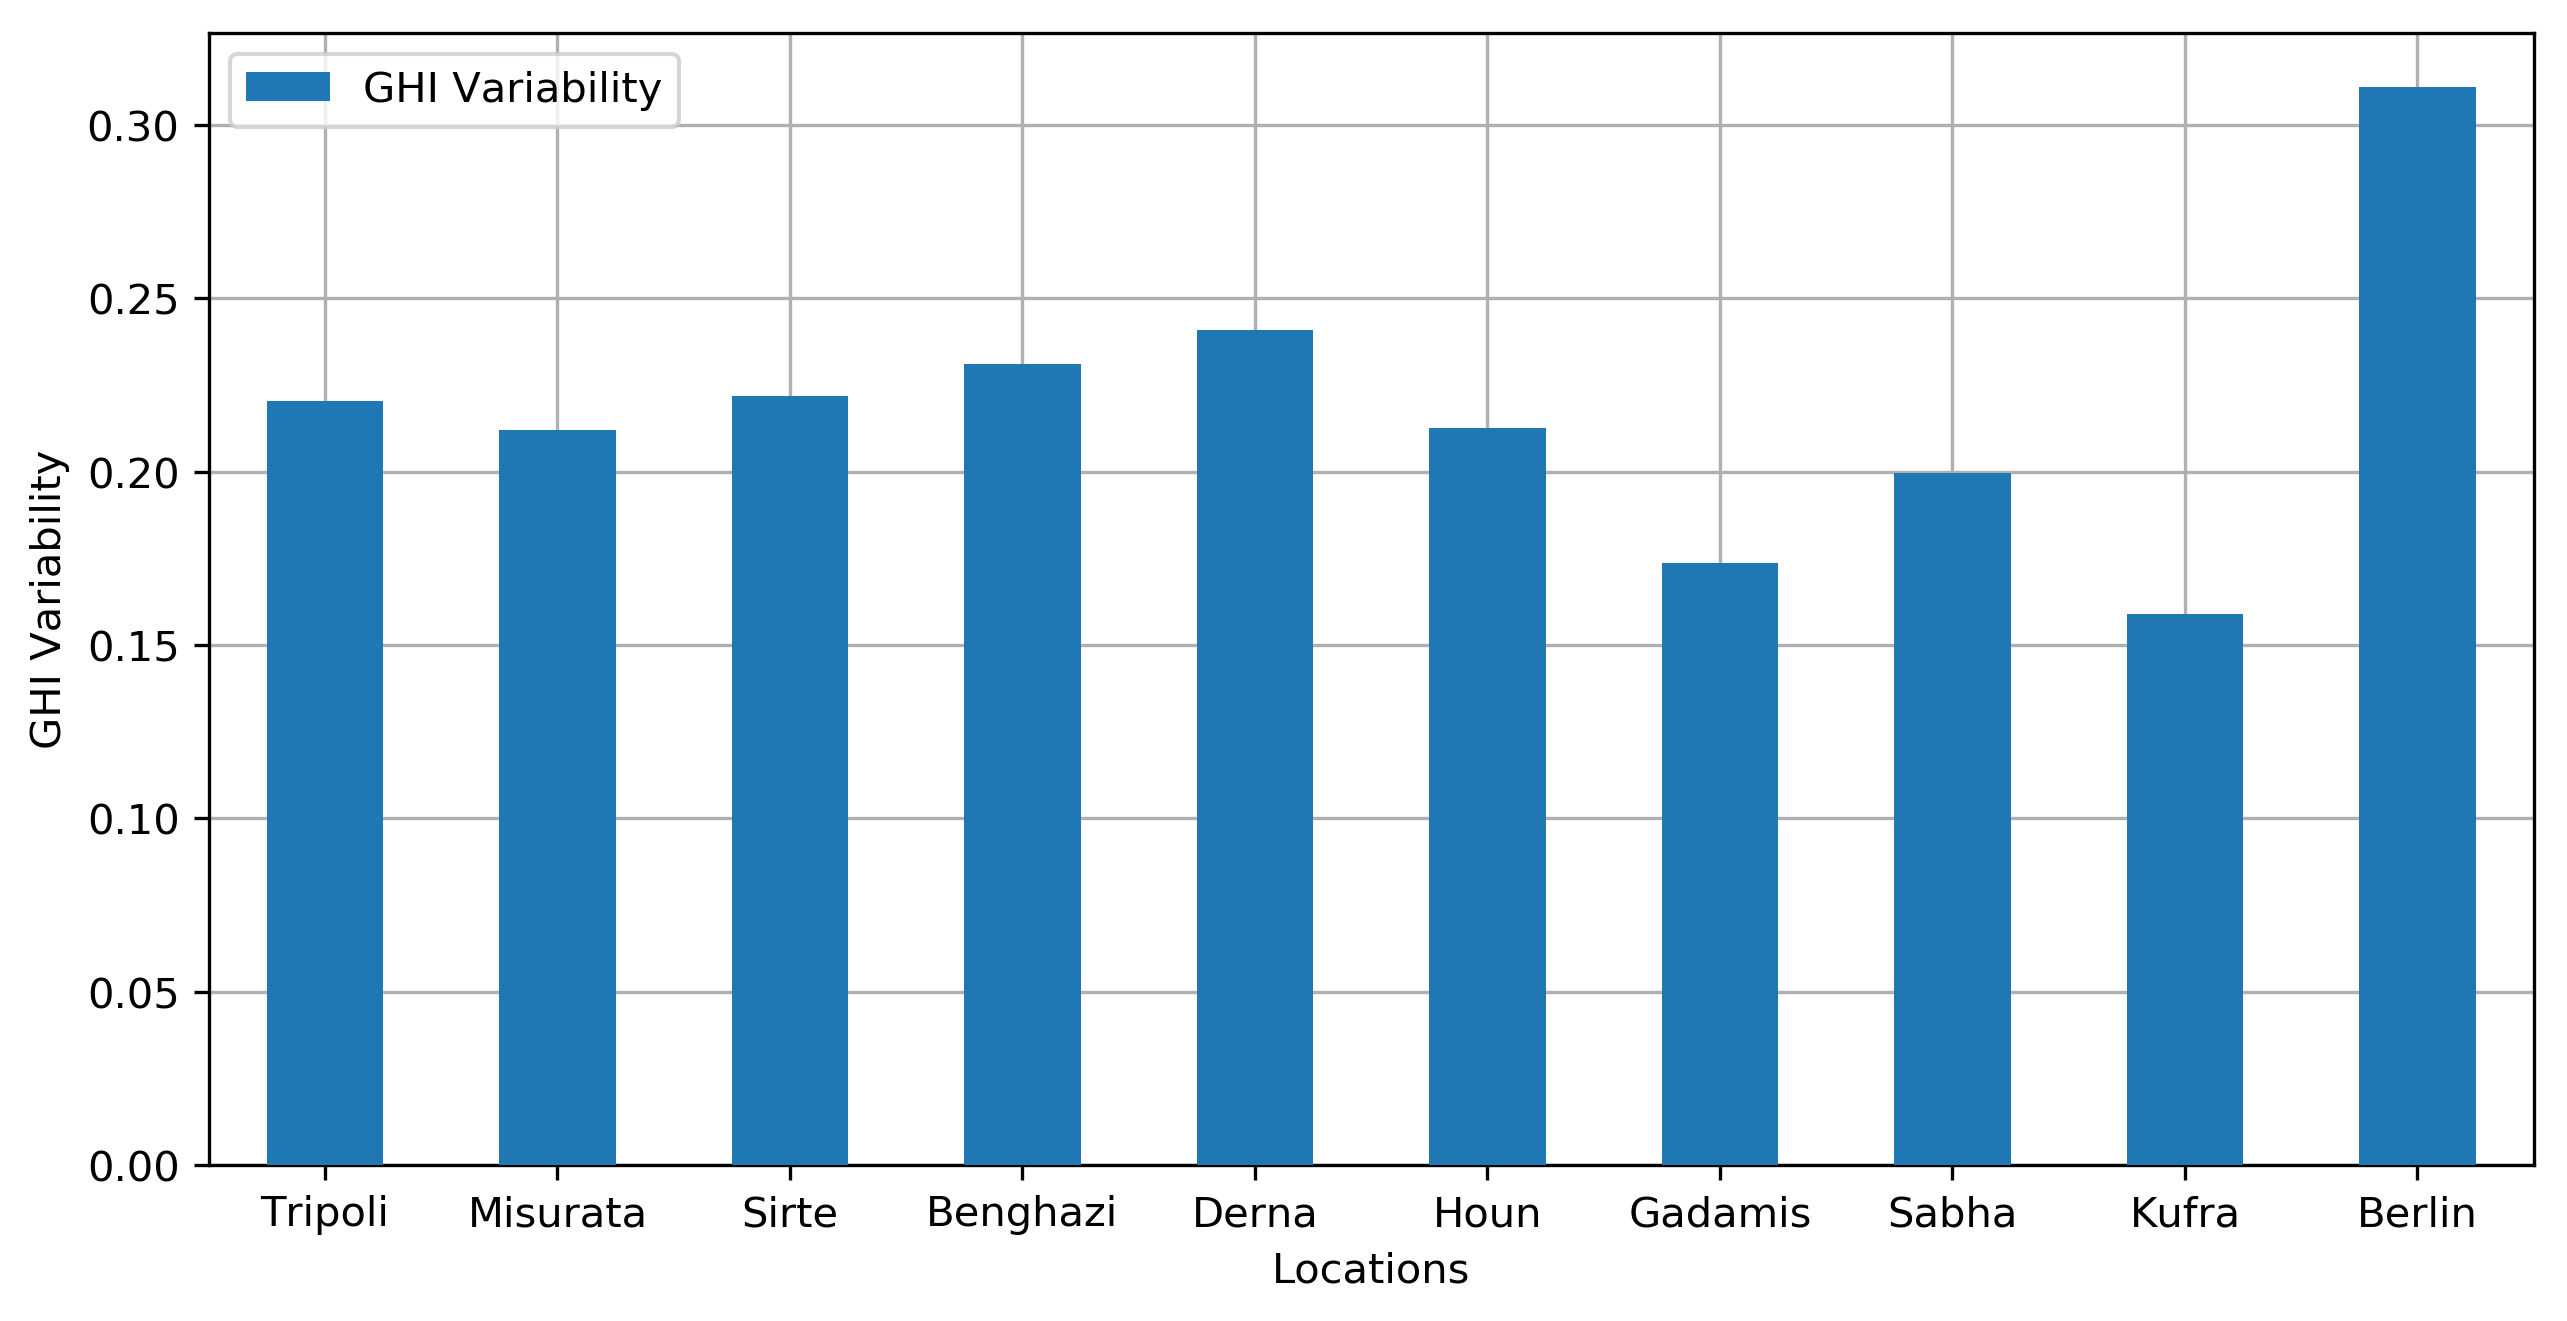

In [66]:
plt.rcParams['figure.figsize'] = [10, 5.0]
plt.rcParams['figure.dpi'] = 300

df_ghi_var.plot.bar(zorder=3)
plt.xticks(rotation=0)
plt.xlabel('Locations');
plt.ylabel('GHI Variability');
# plt.yticks(np.arange(0, 1, 0.1))
plt.grid()

## DNI Variability for givin locations

In [67]:
df_dni_variability=[]
cities=['Tripoli','Misurata','Sirte','Benghazi','Derna','Houn','Gadamis','Sabha','Kufra','Berlin']
i=0
dt=[df_Trip_day, df_Mis_day, df_Sirte_day, df_Beng_day,df_Derna_day, df_Houn_day, df_Gadam_day, df_Sabha_day, df_Kufra_day, df_Berlin_day]
for dti in dt:
    dti_dnicl=dti['Gb(n)']/dti['cl_dni']   
    dti_dnicl[dti_dnicl>10]=0
    dti_dnicl[dti_dnicl>1]=1
#     dti_dni_variability=1-dti_dnicl.describe()[1]#mean
    dti_dni_variability=dti_dnicl.describe()[2] #std deviation

    df_dni_variability.append(dti_dni_variability) 
    print('DNI Variability of', cities[i],'=', round(dti_dni_variability,4))
    i=i+1
    
pd.DataFrame([cities, df_dni_variability])

# DNI_Var_dict= {'Cities': cities, 'DNI Variability':df_dni_variability}
DNI_Var_dict= {'DNI Variability':df_dni_variability}
df_dni_var=pd.DataFrame(DNI_Var_dict)
df_dni_var.index=cities
# df_dni_var.columns=cities
# df_dni_var
df_dni_var

DNI Variability of Tripoli = 0.3288
DNI Variability of Misurata = 0.3091
DNI Variability of Sirte = 0.3114
DNI Variability of Benghazi = 0.336
DNI Variability of Derna = 0.3659
DNI Variability of Houn = 0.3352
DNI Variability of Gadamis = 0.2602
DNI Variability of Sabha = 0.2913
DNI Variability of Kufra = 0.2449
DNI Variability of Berlin = 0.3873


DNI Variability
Tripoli          0.328822
Misurata         0.309131
Sirte            0.311377
Benghazi         0.335996
Derna            0.365925
Houn             0.335209
Gadamis          0.260202
Sabha            0.291276
Kufra            0.244900
Berlin           0.387283

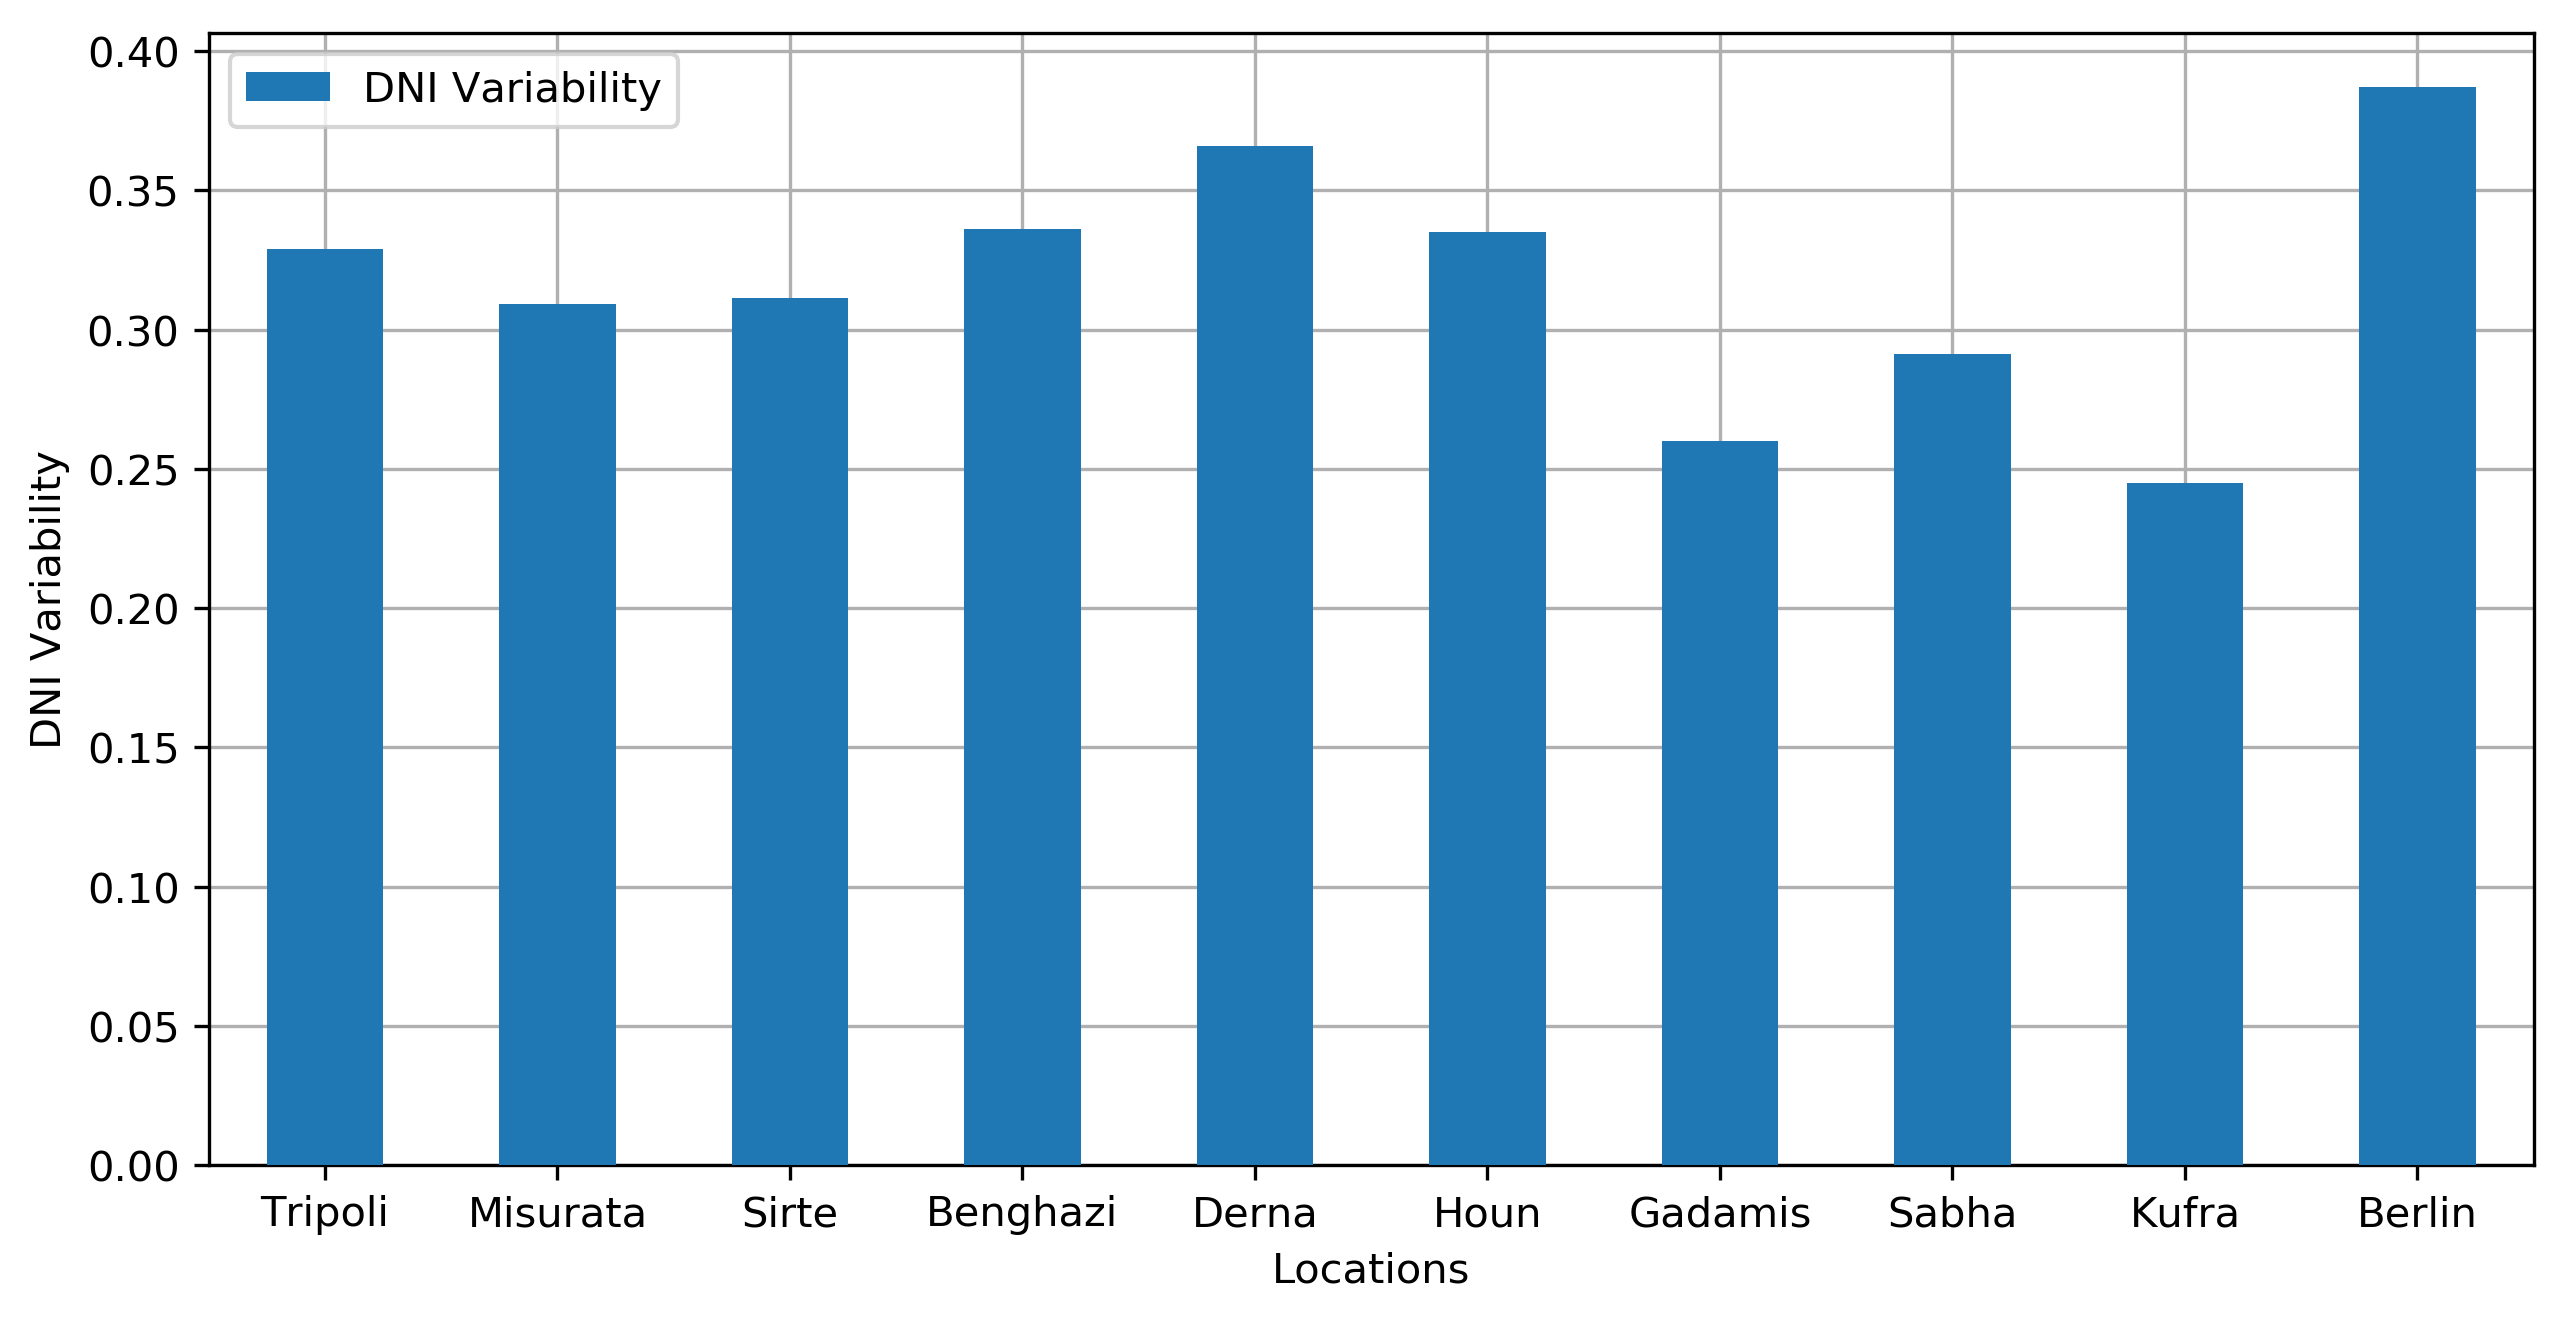

In [68]:
plt.rcParams['figure.figsize'] = [10, 5.0]
plt.rcParams['figure.dpi'] = 300

df_dni_var.plot.bar(zorder=3)
plt.xticks(rotation=0)
plt.xlabel('Locations');
plt.ylabel('DNI Variability');
# plt.yticks(np.arange(0, 1, 0.1))

# plt.legend(bbox_to_anchor=(1.16, 1.01),loc='upper right')
plt.grid()

In [69]:
vars_dict={'GHI Variability': df_ghi_var['GHI Variability'].values, 'DNI Variability':df_dni_var['DNI Variability'].values}
df_ghi_dni_var=pd.DataFrame(vars_dict)
df_ghi_dni_var.index=cities
df_ghi_dni_var

GHI Variability  DNI Variability
Tripoli          0.220382         0.328822
Misurata         0.212176         0.309131
Sirte            0.221977         0.311377
Benghazi         0.231222         0.335996
Derna            0.240971         0.365925
Houn             0.212539         0.335209
Gadamis          0.173761         0.260202
Sabha            0.199731         0.291276
Kufra            0.158960         0.244900
Berlin           0.311109         0.387283

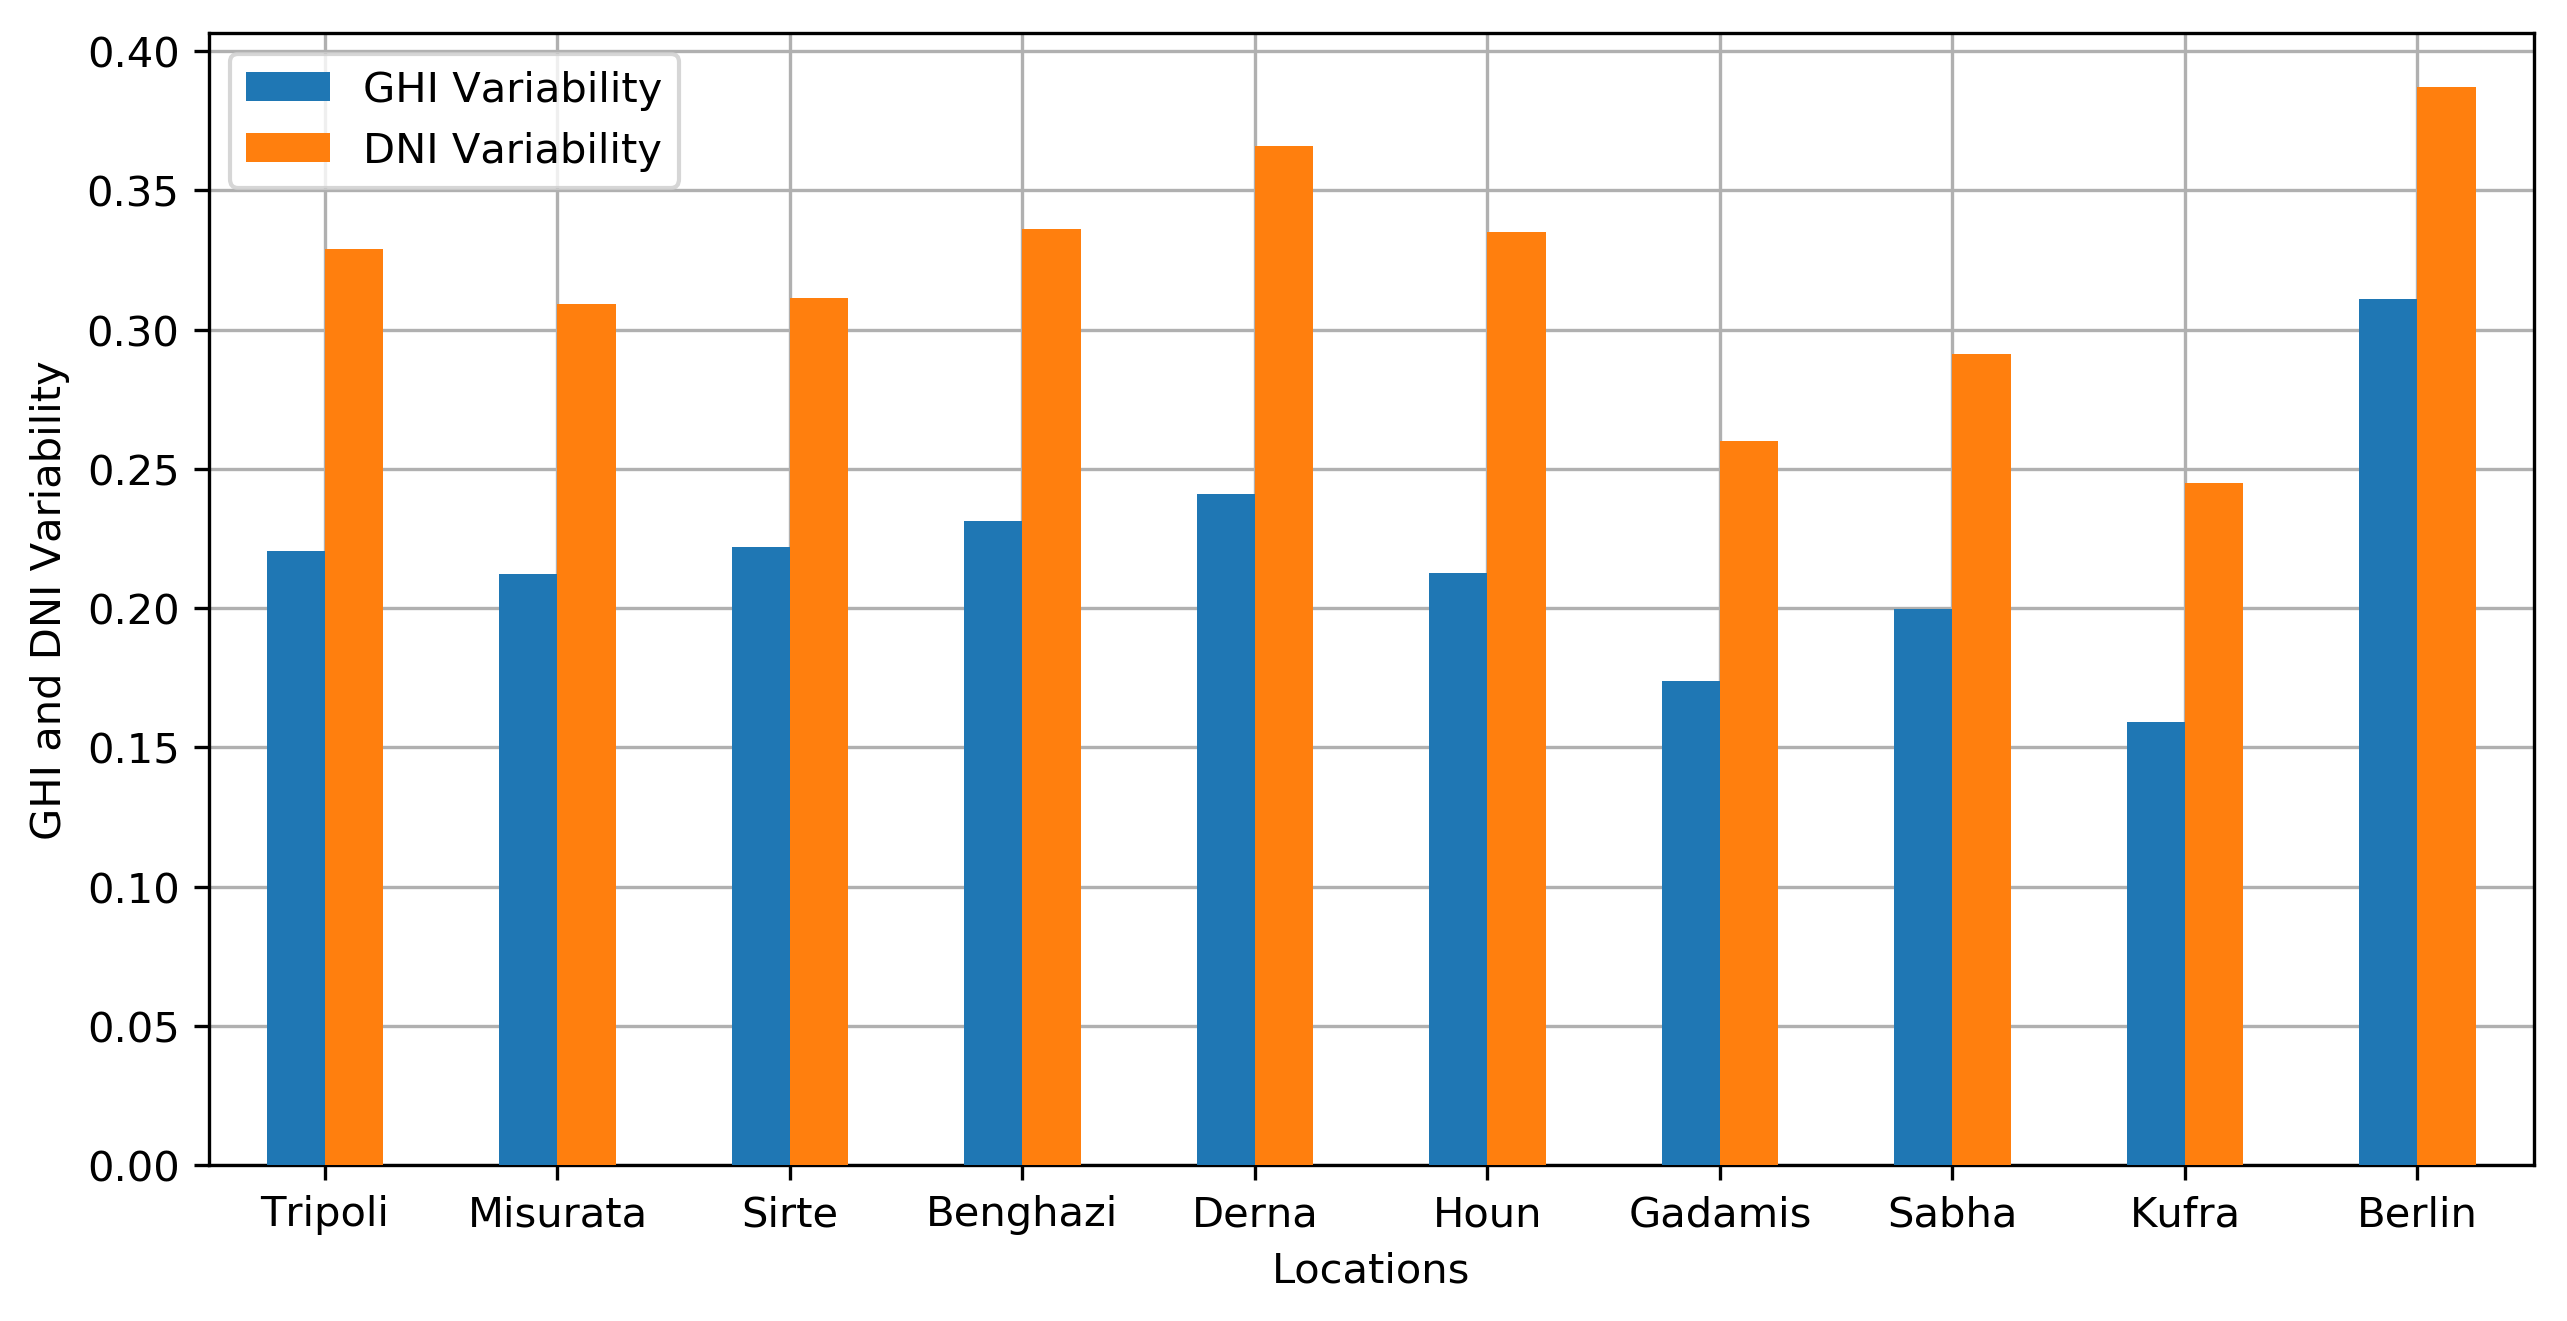

In [70]:
plt.rcParams['figure.figsize'] = [10, 5.0]
plt.rcParams['figure.dpi'] = 300

df_ghi_dni_var.plot.bar(zorder=3)
# plt.yticks(np.arange(0, 1, 0.1))
plt.xticks(rotation=0)
plt.xlabel('Locations');
plt.ylabel('GHI and DNI Variability');
# plt.legend(bbox_to_anchor=(1.2, 1.02),loc='upper right')
# plt.legend(loc='upper right')

plt.grid()

## Aggregation of Some Locations and then Calculate the Variability Factors for GHI and DNI

In [71]:
cities=['Tripoli','Misurata','Sirte','Benghazi','Derna','Houn','Gadamis','Sabha','Kufra','Berlin']
df_dt=['df_Trip', 'df_Mis', 'df_Sirte', 'df_Beng', 'df_Derna', 'df_Houn', 'df_Gadam', 'df_Sabha', 'df_Kufra', 'df_Berlin']

df_tem=pd.DataFrame({'Tripoli':df_Trip['G(h)']})

for i in np.arange(len(cities)):
    df_tem[cities[i]]=vars()[df_dt[i]]['G(h)']

df_ghi=df_tem

df_tem=pd.DataFrame({'Tripoli':df_Trip['cl_ghi']})

for i in np.arange(len(cities)):
    df_tem[cities[i]]=vars()[df_dt[i]]['cl_ghi']

df_clghi=df_tem

df_ghi_clghi = pd.merge(df_ghi, df_clghi, left_index =True, right_index = True)

df_ghi_clghi.describe()

Tripoli_x   Misurata_x      Sirte_x   Benghazi_x      Derna_x  \
count  8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
mean    234.199092   241.661832   243.338453   233.556227   228.293105   
std     317.418399   324.520566   327.910811   319.306617   315.917410   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%     469.250000   492.000000   494.000000   452.000000   437.000000   
max    1055.000000  1069.000000  1062.000000  1029.000000  1072.000000   

            Houn_x    Gadamis_x      Sabha_x      Kufra_x     Berlin_x  \
count  8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
mean    260.896404   259.905856   262.925417   279.634709   125.718944   
std     345.695312   341.322795   345.236189   361.123789   207.474138   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%     542.000000   537.000000   550.000000   605.000000   172.000000   
max    1092.000000  1080.000000  1083.000000  1087.000000   926.000000   

         Tripoli_y   Misurata_y      Sirte_y   Benghazi_y      Derna_y  \
count  8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
mean    259.911544   262.151429   264.240843   262.060948   260.016741   
std     333.292622   335.602419   337.696098   335.368792   333.267058   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000891     0.008432     0.021556     0.248433     0.319518   
75%     539.208971   548.130413   554.929124   540.838052   531.345650   
max    1019.604861  1022.848261  1024.908700  1019.863164  1014.183455   

             Houn_y    Gadamis_y      Sabha_y      Kufra_y     Berlin_y  
count  8.760000e+03  8760.000000  8760.000000  8760.000000  8760.000000  
mean   2.705496e+02   267.132915   274.537059   280.878024   194.678894  
std    3.440214e+02   340.462611   348.041289   354.420054   268.862457  
min    0.000000e+00     0.000000     0.000000     0.000000     0.000000  
25%    0.000000e+00     0.000000     0.000000     0.000000     0.000000  
50%    1.102254e-08     0.289019     0.689145     0.025055     0.137328  
75%    5.762957e+02   558.804751   578.716172   614.677850   352.996971  
max    1.030521e+03  1023.177917  1032.793731  1029.028910   896.588839

In [72]:
df_agg_coast_ghi=pd.DataFrame(sum([df_ghi_clghi['Tripoli_x'],df_ghi_clghi['Misurata_x'], df_ghi_clghi['Sirte_x'],df_ghi_clghi['Benghazi_x'], df_ghi_clghi['Derna_x']]))
df_agg_coast_clghi=pd.DataFrame(sum([df_ghi_clghi['Tripoli_y'],df_ghi_clghi['Misurata_y'],df_ghi_clghi['Sirte_y'],df_ghi_clghi['Benghazi_y'],df_ghi_clghi['Derna_y']]))
df_agg = pd.merge(df_agg_coast_ghi, df_agg_coast_clghi, left_index =True, right_index = True)
df_agg_coast_ghi_clghi=df_agg

df_agg_coast_ghi_clghi['ghi']=df_agg['0_x']
df_agg_coast_ghi_clghi['cl_ghi']=df_agg['0_y']
# df_agg_coast_ghi_clghi


In [73]:
df_agg_sahara_ghi=pd.DataFrame(sum([df_ghi_clghi['Houn_x'], df_ghi_clghi['Gadamis_x'], df_ghi_clghi['Sabha_x'],df_ghi_clghi['Kufra_x']]))
df_agg_sahara_clghi=pd.DataFrame(sum([df_ghi_clghi['Houn_y'], df_ghi_clghi['Gadamis_y'], df_ghi_clghi['Sabha_y'],df_ghi_clghi['Kufra_y']]))

df_agg2 = pd.merge(df_agg_sahara_ghi, df_agg_sahara_clghi, left_index =True, right_index = True)
df_agg_sahara_ghi_clghi=df_agg2

df_agg_sahara_ghi_clghi['ghi']=df_agg2['0_x']
df_agg_sahara_ghi_clghi['cl_ghi']=df_agg2['0_y']
# df_agg_sahara_ghi_clghi


In [74]:
df_agg_all_ghi=pd.DataFrame(sum([df_ghi_clghi['Tripoli_x'],df_ghi_clghi['Misurata_x'], df_ghi_clghi['Sirte_x'],df_ghi_clghi['Benghazi_x'],df_ghi_clghi['Derna_x'],df_ghi_clghi['Houn_x'],df_ghi_clghi['Gadamis_x'], df_ghi_clghi['Sabha_x'],df_ghi_clghi['Kufra_x']]))
df_agg_all_clghi=pd.DataFrame(sum([df_ghi_clghi['Tripoli_y'], df_ghi_clghi['Misurata_y'], df_ghi_clghi['Sirte_y'],df_ghi_clghi['Benghazi_y'],df_ghi_clghi['Derna_x'],df_ghi_clghi['Houn_x'],df_ghi_clghi['Gadamis_y'], df_ghi_clghi['Sabha_y'],df_ghi_clghi['Kufra_y']]))
df_agg3 = pd.merge(df_agg_all_ghi, df_agg_all_clghi, left_index =True, right_index = True)
df_agg_all_ghi_clghi=df_agg3

df_agg_all_ghi_clghi['ghi']=df_agg3['0_x']
df_agg_all_ghi_clghi['cl_ghi']=df_agg3['0_y']
# df_agg_all_ghi_clghi


In [75]:
df_agg_coast_ghi_clghi_day=df_agg_coast_ghi_clghi[df_agg_coast_ghi_clghi['ghi']>0.01]
df_agg_sahara_ghi_clghi=df_agg_sahara_ghi_clghi[df_agg_sahara_ghi_clghi['ghi']>0.01]
df_agg_all_ghi_clghi=df_agg_all_ghi_clghi[df_agg_all_ghi_clghi['ghi']>0.01]


# df_agg_coast_ghi_clghi_day

In [76]:
df_aggi_ghi_variability=[]
cities=['Coast','Sahara', 'All Libyan Locations']
i=0
dagg=[df_agg_coast_ghi_clghi_day, df_agg_sahara_ghi_clghi, df_agg_all_ghi_clghi]
for daggi in dagg:
    dagg_ghicl=daggi['ghi']/daggi['cl_ghi']
    dagg_ghicl[dagg_ghicl>10]=0
    dagg_ghicl[dagg_ghicl>1]=1
#     dfagg_ghi_variability=1-dagg_ghicl.describe()[1]#mean
    dfagg_ghi_variability=dagg_ghicl.describe()[2]#std deviation

    df_aggi_ghi_variability.append(dfagg_ghi_variability) 
    print('GHI Variability of', cities[i],'=', round(dfagg_ghi_variability,4))
    i=i+1

AggGHI_Var_dict= {'GHI Variability':df_aggi_ghi_variability}
df_aggghi_var=pd.DataFrame(AggGHI_Var_dict)
df_aggghi_var.index=cities
df_aggghi_var

GHI Variability of Coast = 0.1637
GHI Variability of Sahara = 0.1627
GHI Variability of All Libyan Locations = 0.1459


GHI Variability
Coast                        0.163658
Sahara                       0.162678
All Libyan Locations         0.145916

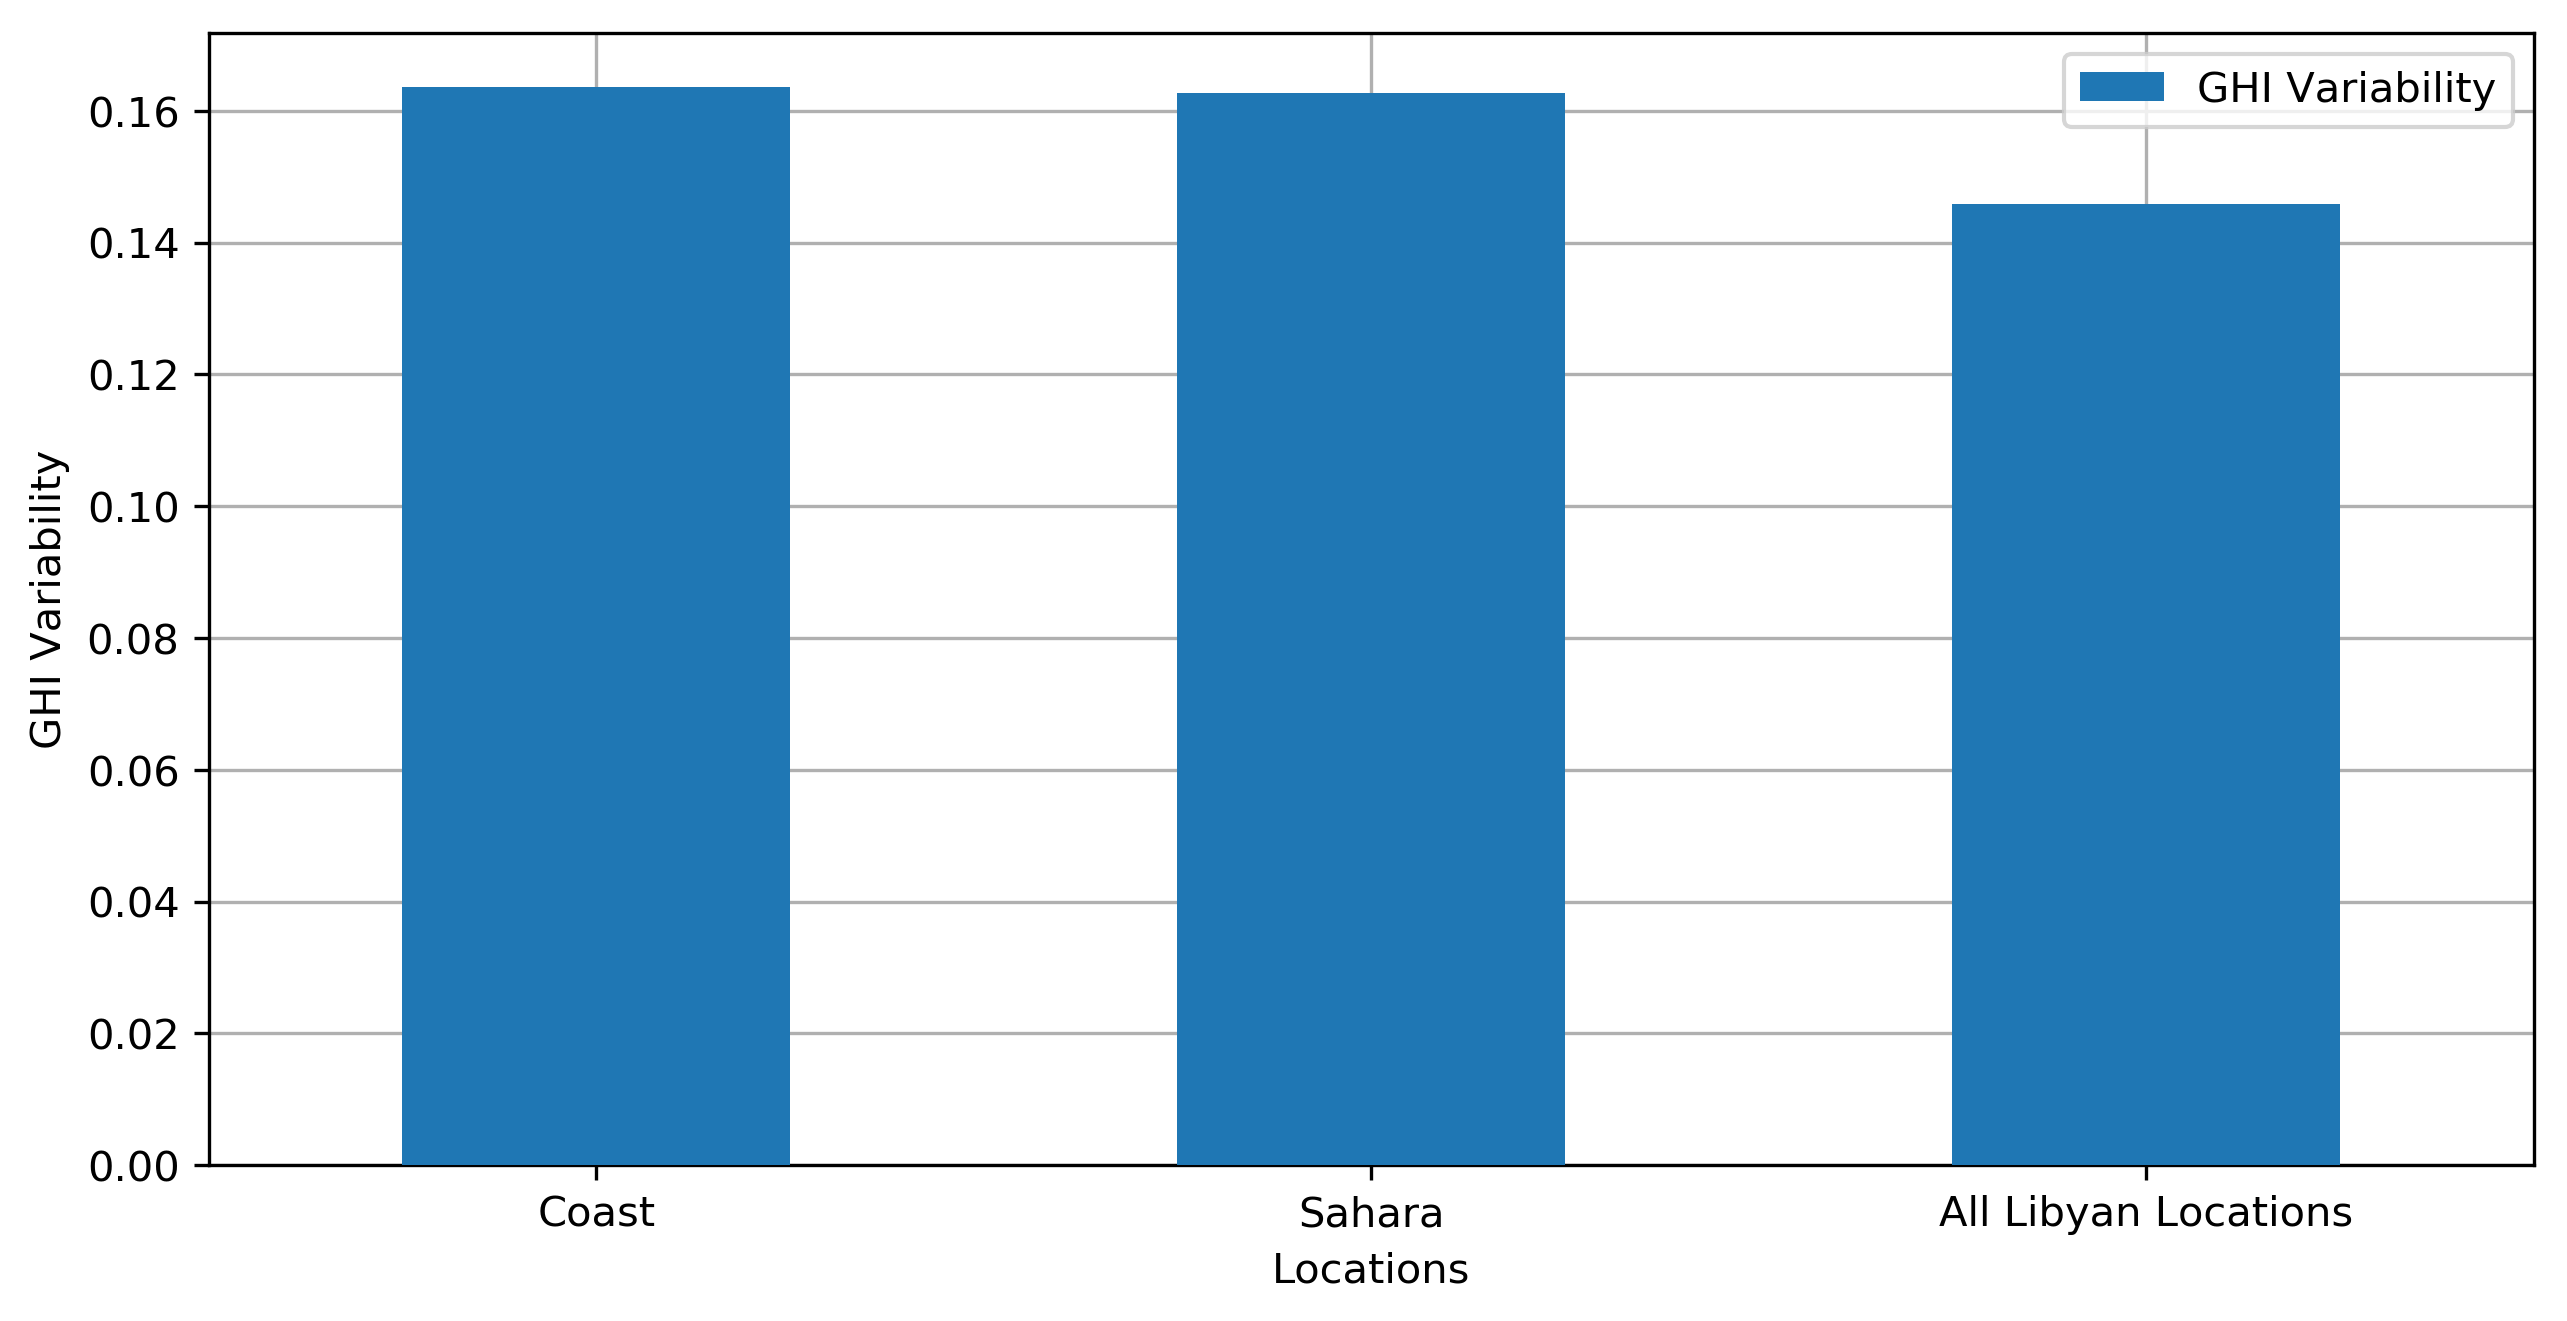

In [77]:
plt.rcParams['figure.figsize'] = [10, 5.0]
plt.rcParams['figure.dpi'] = 300

df_aggghi_var.plot.bar(zorder=3)
# plt.yticks(np.arange(0, 1, 0.1))
plt.xticks(rotation=0)
plt.xlabel('Locations');
plt.ylabel('GHI Variability');
# plt.legend(bbox_to_anchor=(1.16, 1.01),loc='upper right')
plt.grid()

### Aggregated DNI

In [78]:
cities=['Tripoli','Misurata','Sirte','Benghazi','Derna','Houn','Gadamis','Sabha','Kufra','Berlin']
df_dt=['df_Trip', 'df_Mis', 'df_Sirte', 'df_Beng', 'df_Derna', 'df_Houn', 'df_Gadam', 'df_Sabha', 'df_Kufra', 'df_Berlin']

df_tem=pd.DataFrame({'Tripoli':df_Trip['Gb(n)']})

for i in np.arange(len(cities)):
    df_tem[cities[i]]=vars()[df_dt[i]]['Gb(n)']

df_dni=df_tem

df_tem=pd.DataFrame({'Tripoli':df_Trip['cl_dni']})

for i in np.arange(len(cities)):
    df_tem[cities[i]]=vars()[df_dt[i]]['cl_dni']

df_cldni=df_tem

df_dni_cldni = pd.merge(df_dni, df_cldni, left_index =True, right_index = True)
df_dni_cldni.describe()

Tripoli_x   Misurata_x      Sirte_x   Benghazi_x      Derna_x  \
count  8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
mean    259.359817   265.344386   264.713968   256.688192   240.903213   
std     334.992836   336.152445   338.040475   334.177350   329.579005   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%     611.422500   618.737500   620.102500   603.562500   562.520000   
max    1013.000000  1038.740000  1048.730000  1011.950000  1016.490000   

            Houn_x    Gadamis_x      Sabha_x      Kufra_x     Berlin_x  \
count  8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
mean    290.568372   298.430541   297.603539   316.105515   120.460551   
std     361.457405   356.453567   359.583288   370.663617   234.439310   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%     697.117500   692.675000   703.657500   740.187500    89.615000   
max    1058.380000  1070.620000  1063.640000  1052.550000   978.000000   

         Tripoli_y   Misurata_y      Sirte_y   Benghazi_y      Derna_y  \
count  8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
mean    335.758554   336.873337   337.655664   336.234109   335.234525   
std     374.794645   375.346803   375.936894   375.272538   374.471655   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%     763.564921   763.333144   765.780713   766.587189   765.888632   
max     863.004820   863.207963   863.334535   863.063451   862.747853   

            Houn_y    Gadamis_y      Sabha_y      Kufra_y     Berlin_y  
count  8760.000000  8760.000000  8760.000000  8760.000000  8760.000000  
mean    339.969815   338.126270   341.343186   343.461268   298.230974  
std     377.626164   376.719211   378.737606   380.710217   350.548079  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%     772.778001   771.789188   776.936892   781.226374   693.489467  
max     863.649715   863.189444   863.772150   863.528951   854.805970

In [79]:
df_agg_coast_dni=pd.DataFrame(sum([df_dni_cldni['Tripoli_x'],df_dni_cldni['Misurata_x'], df_dni_cldni['Sirte_x'],df_dni_cldni['Benghazi_x'], df_dni_cldni['Derna_x']]))
df_agg_coast_cldni=pd.DataFrame(sum([df_dni_cldni['Tripoli_y'],df_dni_cldni['Misurata_y'],df_dni_cldni['Sirte_y'],df_dni_cldni['Benghazi_y'],df_dni_cldni['Derna_y']]))
df_agg = pd.merge(df_agg_coast_dni, df_agg_coast_cldni, left_index =True, right_index = True)
df_agg_coast_dni_cldni=df_agg

df_agg_coast_dni_cldni['dni']=df_agg['0_x']
df_agg_coast_dni_cldni['cl_dni']=df_agg['0_y']
# # df_agg_coast_dni_cldni


In [80]:
df_agg_sahara_dni=pd.DataFrame(sum([df_dni_cldni['Houn_x'], df_dni_cldni['Gadamis_x'], df_dni_cldni['Sabha_x'],df_dni_cldni['Kufra_x']]))
df_agg_sahara_cldni=pd.DataFrame(sum([df_dni_cldni['Houn_y'], df_dni_cldni['Gadamis_y'], df_dni_cldni['Sabha_y'],df_dni_cldni['Kufra_y']]))
df_agg2 = pd.merge(df_agg_sahara_dni, df_agg_sahara_cldni, left_index =True, right_index = True)
df_agg_sahara_dni_cldni=df_agg2

df_agg_sahara_dni_cldni['dni']=df_agg2['0_x']
df_agg_sahara_dni_cldni['cl_dni']=df_agg2['0_y']
# df_agg_sahara_dni_cldni


In [81]:
df_agg_all_dni=pd.DataFrame(sum([df_dni_cldni['Tripoli_x'],df_dni_cldni['Misurata_x'], df_dni_cldni['Sirte_x'],df_dni_cldni['Benghazi_x'],df_dni_cldni['Derna_x'],df_dni_cldni['Houn_x'],df_dni_cldni['Gadamis_x'], df_ghi_clghi['Sabha_x'],df_ghi_clghi['Kufra_x']]))
df_agg_all_cldni=pd.DataFrame(sum([df_dni_cldni['Tripoli_y'], df_dni_cldni['Misurata_y'], df_dni_cldni['Sirte_y'],df_dni_cldni['Benghazi_y'],df_dni_cldni['Derna_x'],df_dni_cldni['Houn_x'],df_dni_cldni['Gadamis_y'], df_ghi_clghi['Sabha_y'],df_ghi_clghi['Kufra_y']]))
df_agg3 = pd.merge(df_agg_all_dni, df_agg_all_cldni, left_index =True, right_index = True)
df_agg_all_dni_cldni=df_agg3

df_agg_all_dni_cldni['dni']=df_agg3['0_x']
df_agg_all_dni_cldni['cl_dni']=df_agg3['0_y']
# df_agg_all_dni_cldni


In [82]:
df_agg_coast_dni_cldni_day=df_agg_coast_dni_cldni[df_agg_coast_dni_cldni['dni']>0.01]
df_agg_sahara_dni_cldni=df_agg_sahara_dni_cldni[df_agg_sahara_dni_cldni['dni']>0.01]
df_agg_all_dni_cldni=df_agg_all_dni_cldni[df_agg_all_dni_cldni['dni']>0.01]


# df_agg_coast_dni_cldni_day

In [83]:
df_aggi_dni_variability=[]
cities=['Coast','Sahara', 'All Libyan Locations']
i=0
dagg=[df_agg_coast_dni_cldni_day, df_agg_sahara_dni_cldni, df_agg_all_dni_cldni]
for daggi in dagg:
    dagg_dnicl=daggi['dni']/daggi['cl_dni']   
    dagg_dnicl[dagg_dnicl>10]=0
    dagg_dnicl[dagg_dnicl>1]=1
#     dfagg_dni_variability=1-dagg_dnicl.describe()[1]#mean
    dfagg_dni_variability=dagg_dnicl.describe()[2]#std deviation
    df_aggi_dni_variability.append(dfagg_dni_variability) 
    print('DNI Variability of', cities[i],'=', round(dfagg_dni_variability,4))
    i=i+1

AggDNI_Var_dict= {'DNI Variability':df_aggi_dni_variability}
df_aggdni_var=pd.DataFrame(AggDNI_Var_dict)
df_aggdni_var.index=cities
df_aggdni_var

DNI Variability of Coast = 0.2007
DNI Variability of Sahara = 0.1971
DNI Variability of All Libyan Locations = 0.1633


DNI Variability
Coast                        0.200688
Sahara                       0.197077
All Libyan Locations         0.163318

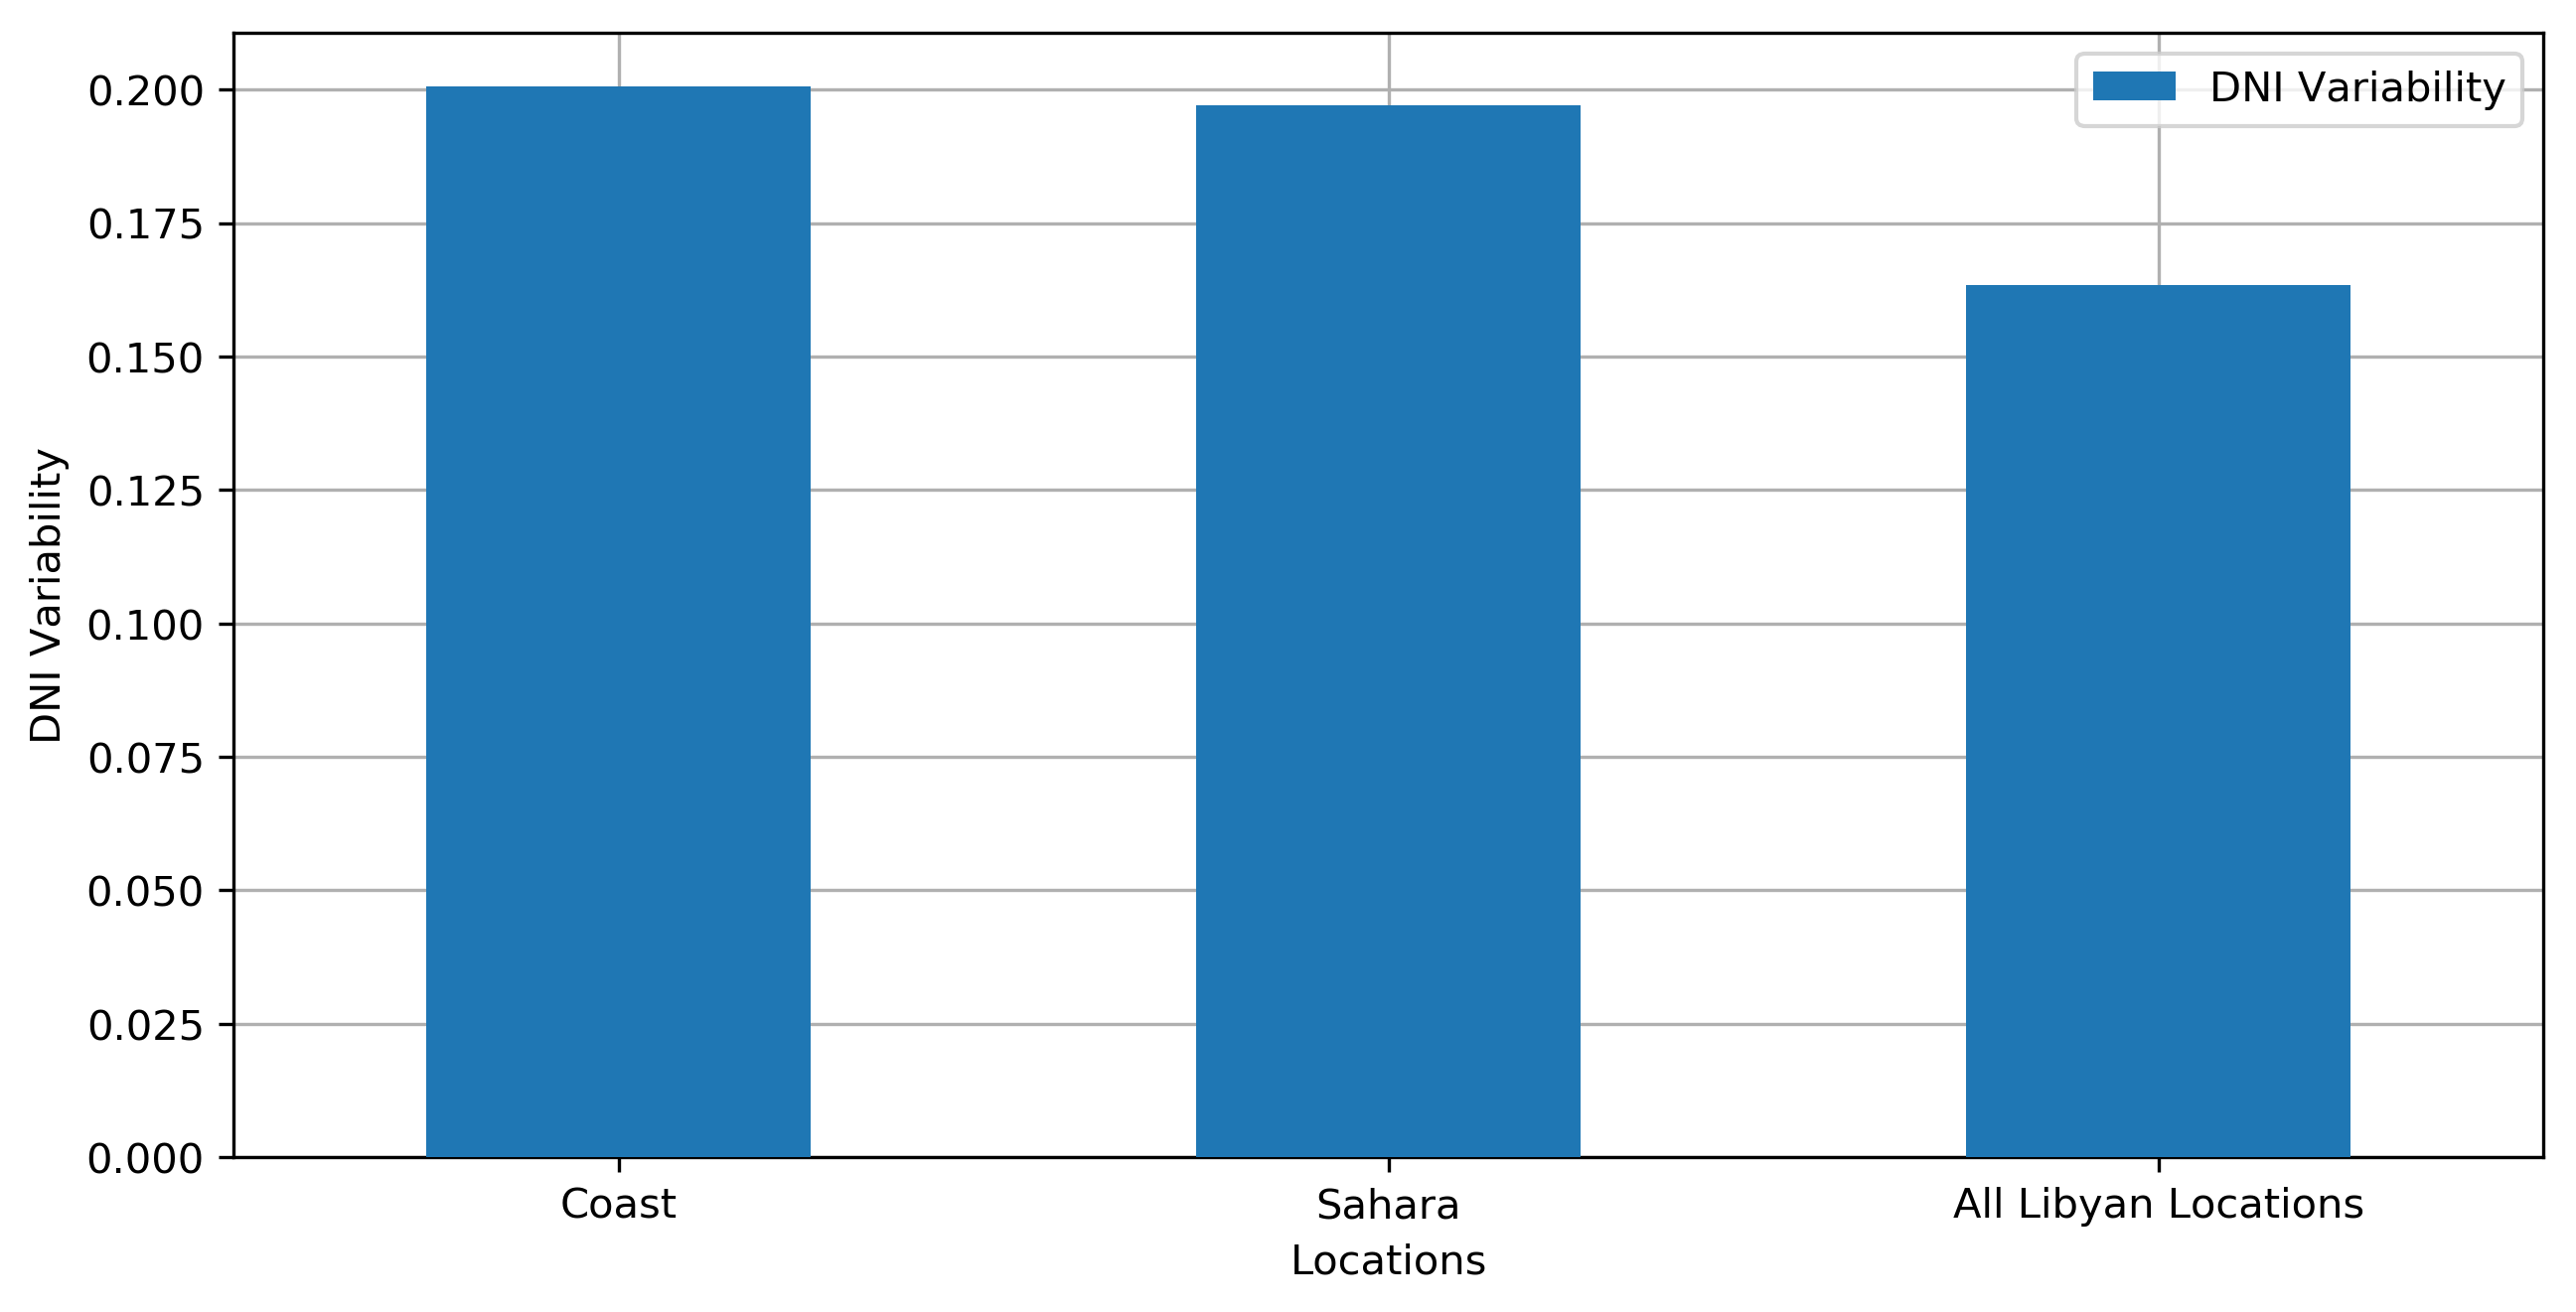

In [84]:
plt.rcParams['figure.figsize'] = [10, 5.0]
plt.rcParams['figure.dpi'] = 300

df_aggdni_var.plot.bar(zorder=3)
# plt.yticks(np.arange(0, 1, 0.1))
plt.xticks(rotation=0)
plt.xlabel('Locations');
plt.ylabel('DNI Variability');
# plt.legend(bbox_to_anchor=(1.16, 1.01),loc='upper right')
plt.grid()

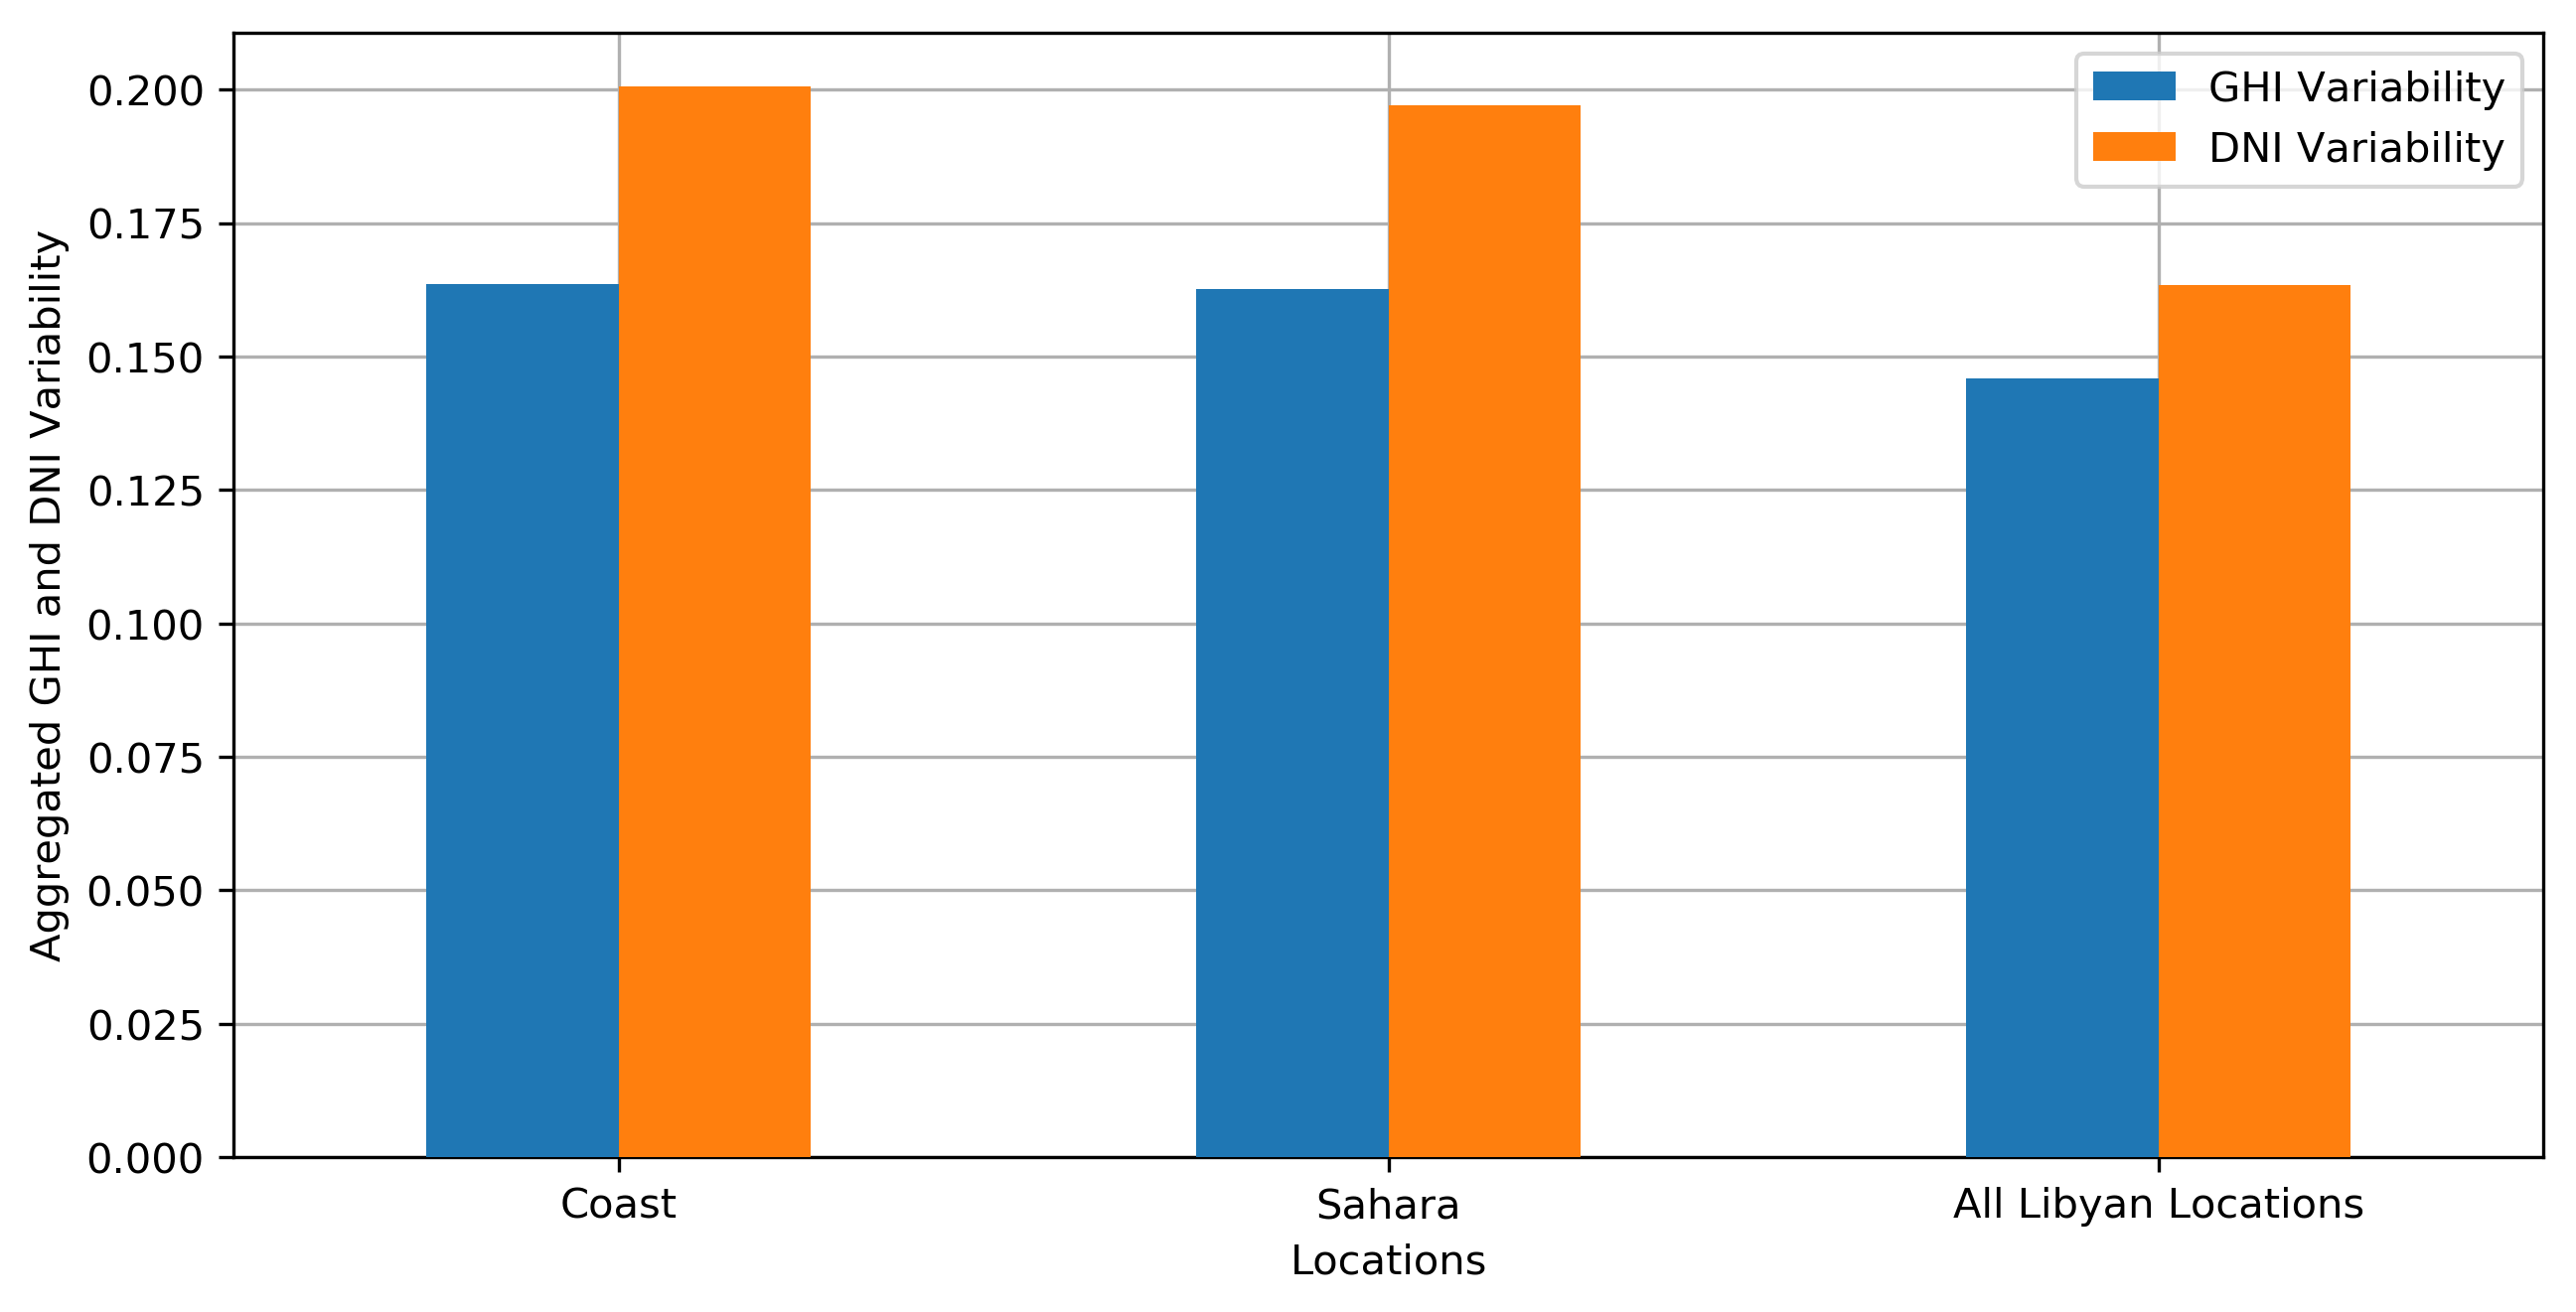

In [85]:
vars_dict={'GHI Variability': df_aggghi_var['GHI Variability'].values, 'DNI Variability':df_aggdni_var['DNI Variability'].values}
df_agg_ghi_dni_var=pd.DataFrame(vars_dict)
df_agg_ghi_dni_var.index=cities
df_agg_ghi_dni_var

plt.rcParams['figure.figsize'] = [10, 5.0]
plt.rcParams['figure.dpi'] = 300

df_agg_ghi_dni_var.plot.bar(zorder=3)
# plt.yticks(np.arange(0, 1, 0.1))

plt.xticks(rotation=0)
plt.xlabel('Locations');
plt.ylabel('Aggregated GHI and DNI Variability');
# plt.legend(bbox_to_anchor=(1.2, 1.02),loc='upper right')
# plt.legend(bbox_to_anchor=(1.04, 1.03),loc='upper right')

plt.grid()

## Calculate the improvement from the Aggregation of Different Locations

### GHI

In [86]:
Coast_locs=['Misurata', 'Tripoli', 'Sirte','Benghazi','Derna']
Sahara_locs=['Houn','Gadamis', 'Sabha', 'Kufra']
All_locs=['Misurata', 'Tripoli', 'Sirte','Benghazi','Derna','Houn','Gadamis', 'Sabha', 'Kufra']
min_coast=df_ghi_var.loc[Coast_locs].min()
min_sahara=df_ghi_var.loc[Sahara_locs].min()
min_all=df_ghi_var.loc[All_locs].min()

ghi_improvement_agg_coast=(1-(df_aggghi_var/min_coast))*100
ghi_improvement_agg_sahara=(1-(df_aggghi_var/min_sahara))*100
ghi_improvement_agg_all=(1-(df_aggghi_var/min_all))*100
df3 = pd.DataFrame({'City': ['MUMBAI', 'PUNE', 'MUMBAI', 'DELHI'],
                    'Age': ['12', '13', '14', '12']})

df_ghi_improv = pd.concat([ghi_improvement_agg_coast, ghi_improvement_agg_sahara, ghi_improvement_agg_all],axis=1, join='inner')
df_ghi_improv.columns=['Agg vs. Best Coast','Agg vs. Best Sahara','Agg vs. Best All']

df_ghi_improv

Agg vs. Best Coast  Agg vs. Best Sahara  \
Coast                          22.866774            -2.955564   
Sahara                         23.329008            -2.338584   
All Libyan Locations           31.228778             8.205837   

                      Agg vs. Best All  
Coast                        -2.955564  
Sahara                       -2.338584  
All Libyan Locations          8.205837



### DNI

In [87]:
Coast_locs=['Misurata', 'Tripoli', 'Sirte','Benghazi','Derna']
Sahara_locs=['Houn','Gadamis', 'Sabha', 'Kufra']
All_locs=['Misurata', 'Tripoli', 'Sirte','Benghazi','Derna','Houn','Gadamis', 'Sabha', 'Kufra']
min_coast=df_dni_var.loc[Coast_locs].min()
min_sahara=df_dni_var.loc[Sahara_locs].min()
min_all=df_dni_var.loc[All_locs].min()

dni_improvement_agg_coast=(1-(df_aggdni_var/min_coast))*100
dni_improvement_agg_sahara=(1-(df_aggdni_var/min_sahara))*100
dni_improvement_agg_all=(1-(df_aggdni_var/min_all))*100
df3 = pd.DataFrame({'City': ['MUMBAI', 'PUNE', 'MUMBAI', 'DELHI'],
                    'Age': ['12', '13', '14', '12']})

df_dni_improv = pd.concat([dni_improvement_agg_coast, dni_improvement_agg_sahara, dni_improvement_agg_all],axis=1, join='inner')
df_dni_improv.columns=['Agg vs. Best Coast','Agg vs. Best Sahara','Agg vs. Best All']

df_dni_improv

Agg vs. Best Coast  Agg vs. Best Sahara  \
Coast                          35.079876            18.053005   
Sahara                         36.248064            19.527579   
All Libyan Locations           47.168813            33.312558   

                      Agg vs. Best All  
Coast                        18.053005  
Sahara                       19.527579  
All Libyan Locations         33.312558

In [88]:
df_agg_all_ghi=pd.DataFrame(sum([df_ghi_clghi['Tripoli_x'],df_ghi_clghi['Misurata_x'], df_ghi_clghi['Sirte_x'],df_ghi_clghi['Benghazi_x'],df_ghi_clghi['Derna_x'],df_ghi_clghi['Houn_x'],df_ghi_clghi['Gadamis_x'], df_ghi_clghi['Sabha_x'],df_ghi_clghi['Kufra_x']]))
df_agg_all_clghi=pd.DataFrame(sum([df_ghi_clghi['Tripoli_y'], df_ghi_clghi['Misurata_y'], df_ghi_clghi['Sirte_y'],df_ghi_clghi['Benghazi_y'],df_ghi_clghi['Derna_x'],df_ghi_clghi['Houn_x'],df_ghi_clghi['Gadamis_y'], df_ghi_clghi['Sabha_y'],df_ghi_clghi['Kufra_y']]))
df_agg3 = pd.merge(df_agg_all_ghi, df_agg_all_clghi, left_index =True, right_index = True)
df_agg_all_ghi_clghi=df_agg3
df_agg_all_ghi_clghi['ghi']=df_agg3['0_x']/9
df_agg_all_ghi_clghi=df_agg_all_ghi_clghi[df_agg_all_ghi_clghi['ghi']>0.01]
df_agg_all_ghi_clghi
indx=df_agg_all_ghi_clghi.index
df_indiv_ghi_clghi=df_Derna.loc[indx]
# df_indiv_ghi_clghi

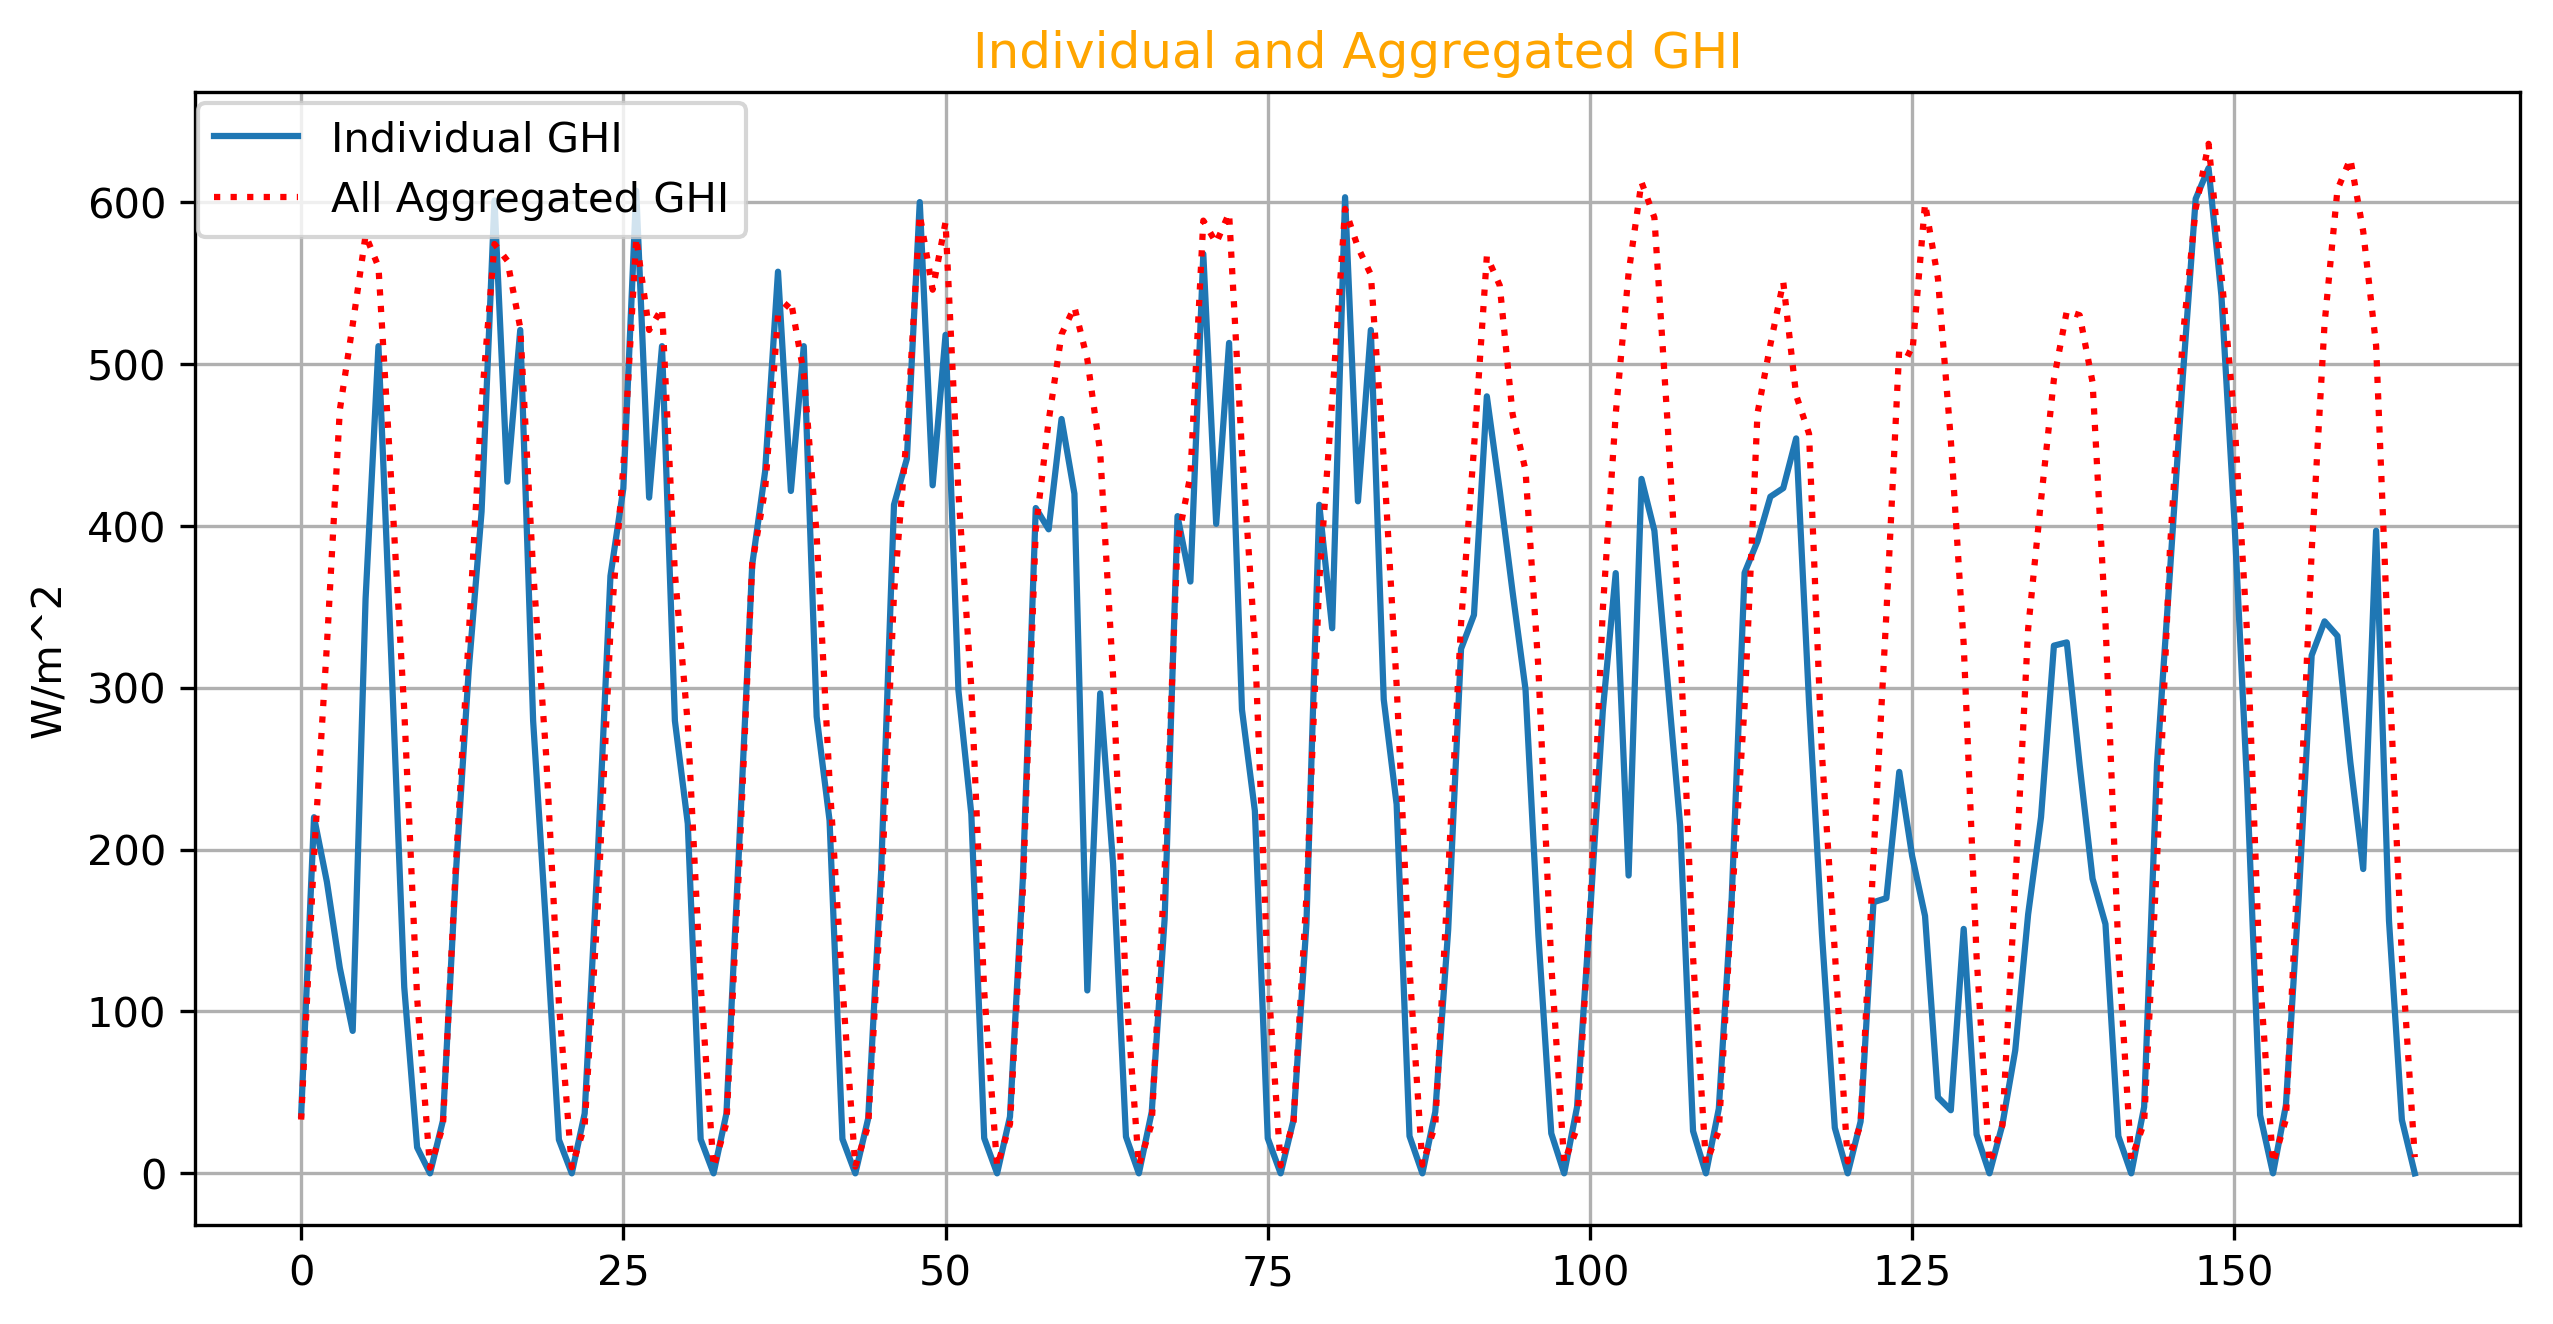

In [89]:
plt.plot(
#     times.values, df_Mis['2021-03':'2021-03-17']['G(h)'].values, '-',
#     times.values, df_Mis['cl_ghi'].values, '--')
    df_indiv_ghi_clghi['2021-01-01':'2021-01-15']['G(h)'].values,'-',
    df_agg_all_ghi_clghi['2021-01-01':'2021-01-15']['ghi'].values,'r:',zorder=3)

# plt.legend(['Location GHI', 'All Aggregated GHI'],bbox_to_anchor=(1.0, 1.0),loc='upper right')
plt.legend(['Individual GHI', 'All Aggregated GHI'],bbox_to_anchor=(-0.008, 1.009),loc='upper left')

plt.ylabel('W/m^2')

plt.title('Individual and Aggregated GHI', color='orange')

plt.grid()


# df_Mis[['G(h)','cl_ghi']].plot()
# plt.title('Clear Sky')


## Check out the azimuth and tilt angles 

In [90]:
cities=['Tripoli','Misurata','Sirte','Benghazi','Derna','Houn','Gadamis','Sabha','Kufra','Berlin']
df_dt=['df_Trip', 'df_Mis', 'df_Sirte', 'df_Beng', 'df_Derna', 'df_Houn', 'df_Gadam', 'df_Sabha', 'df_Kufra', 'df_Berlin']

df_tem=pd.DataFrame({'Tripoli':df_Trip['azimuth'].resample('M').mean()})

for i in np.arange(len(cities)):
    df_tem[cities[i]]=vars()[df_dt[i]]['azimuth'].resample('M').mean()

surface_azimuth_comparison_and_Berlin=df_tem

df_tem=pd.DataFrame({'Tripoli':df_Trip['solar_azimuth'].resample('M').mean()})

for i in np.arange(len(cities)):
    df_tem[cities[i]]=vars()[df_dt[i]]['solar_azimuth'].resample('M').mean()

solar_azimuth_comparison_and_Berlin=df_tem


df_tem=pd.DataFrame({'Tripoli':df_Trip['solar_zenith'].resample('M').mean()})

for i in np.arange(len(cities)):
    df_tem[cities[i]]=vars()[df_dt[i]]['solar_zenith'].resample('M').mean()

solar_zenith_comparison_and_Berlin=df_tem


df_tem=pd.DataFrame({'Tripoli':df_Trip['tilt'].resample('M').mean()})

for i in np.arange(len(cities)):
    df_tem[cities[i]]=vars()[df_dt[i]]['tilt'].resample('M').mean()
    
tilt_comparison_and_Berlin=df_tem



In [91]:
tilt_comparison_and_Berlin.index=tilt_comparison_and_Berlin.index.month
surface_azimuth_comparison_and_Berlin.index=surface_azimuth_comparison_and_Berlin.index.month
solar_azimuth_comparison_and_Berlin.index=solar_azimuth_comparison_and_Berlin.index.month
solar_zenith_comparison_and_Berlin.index=solar_zenith_comparison_and_Berlin.index.month

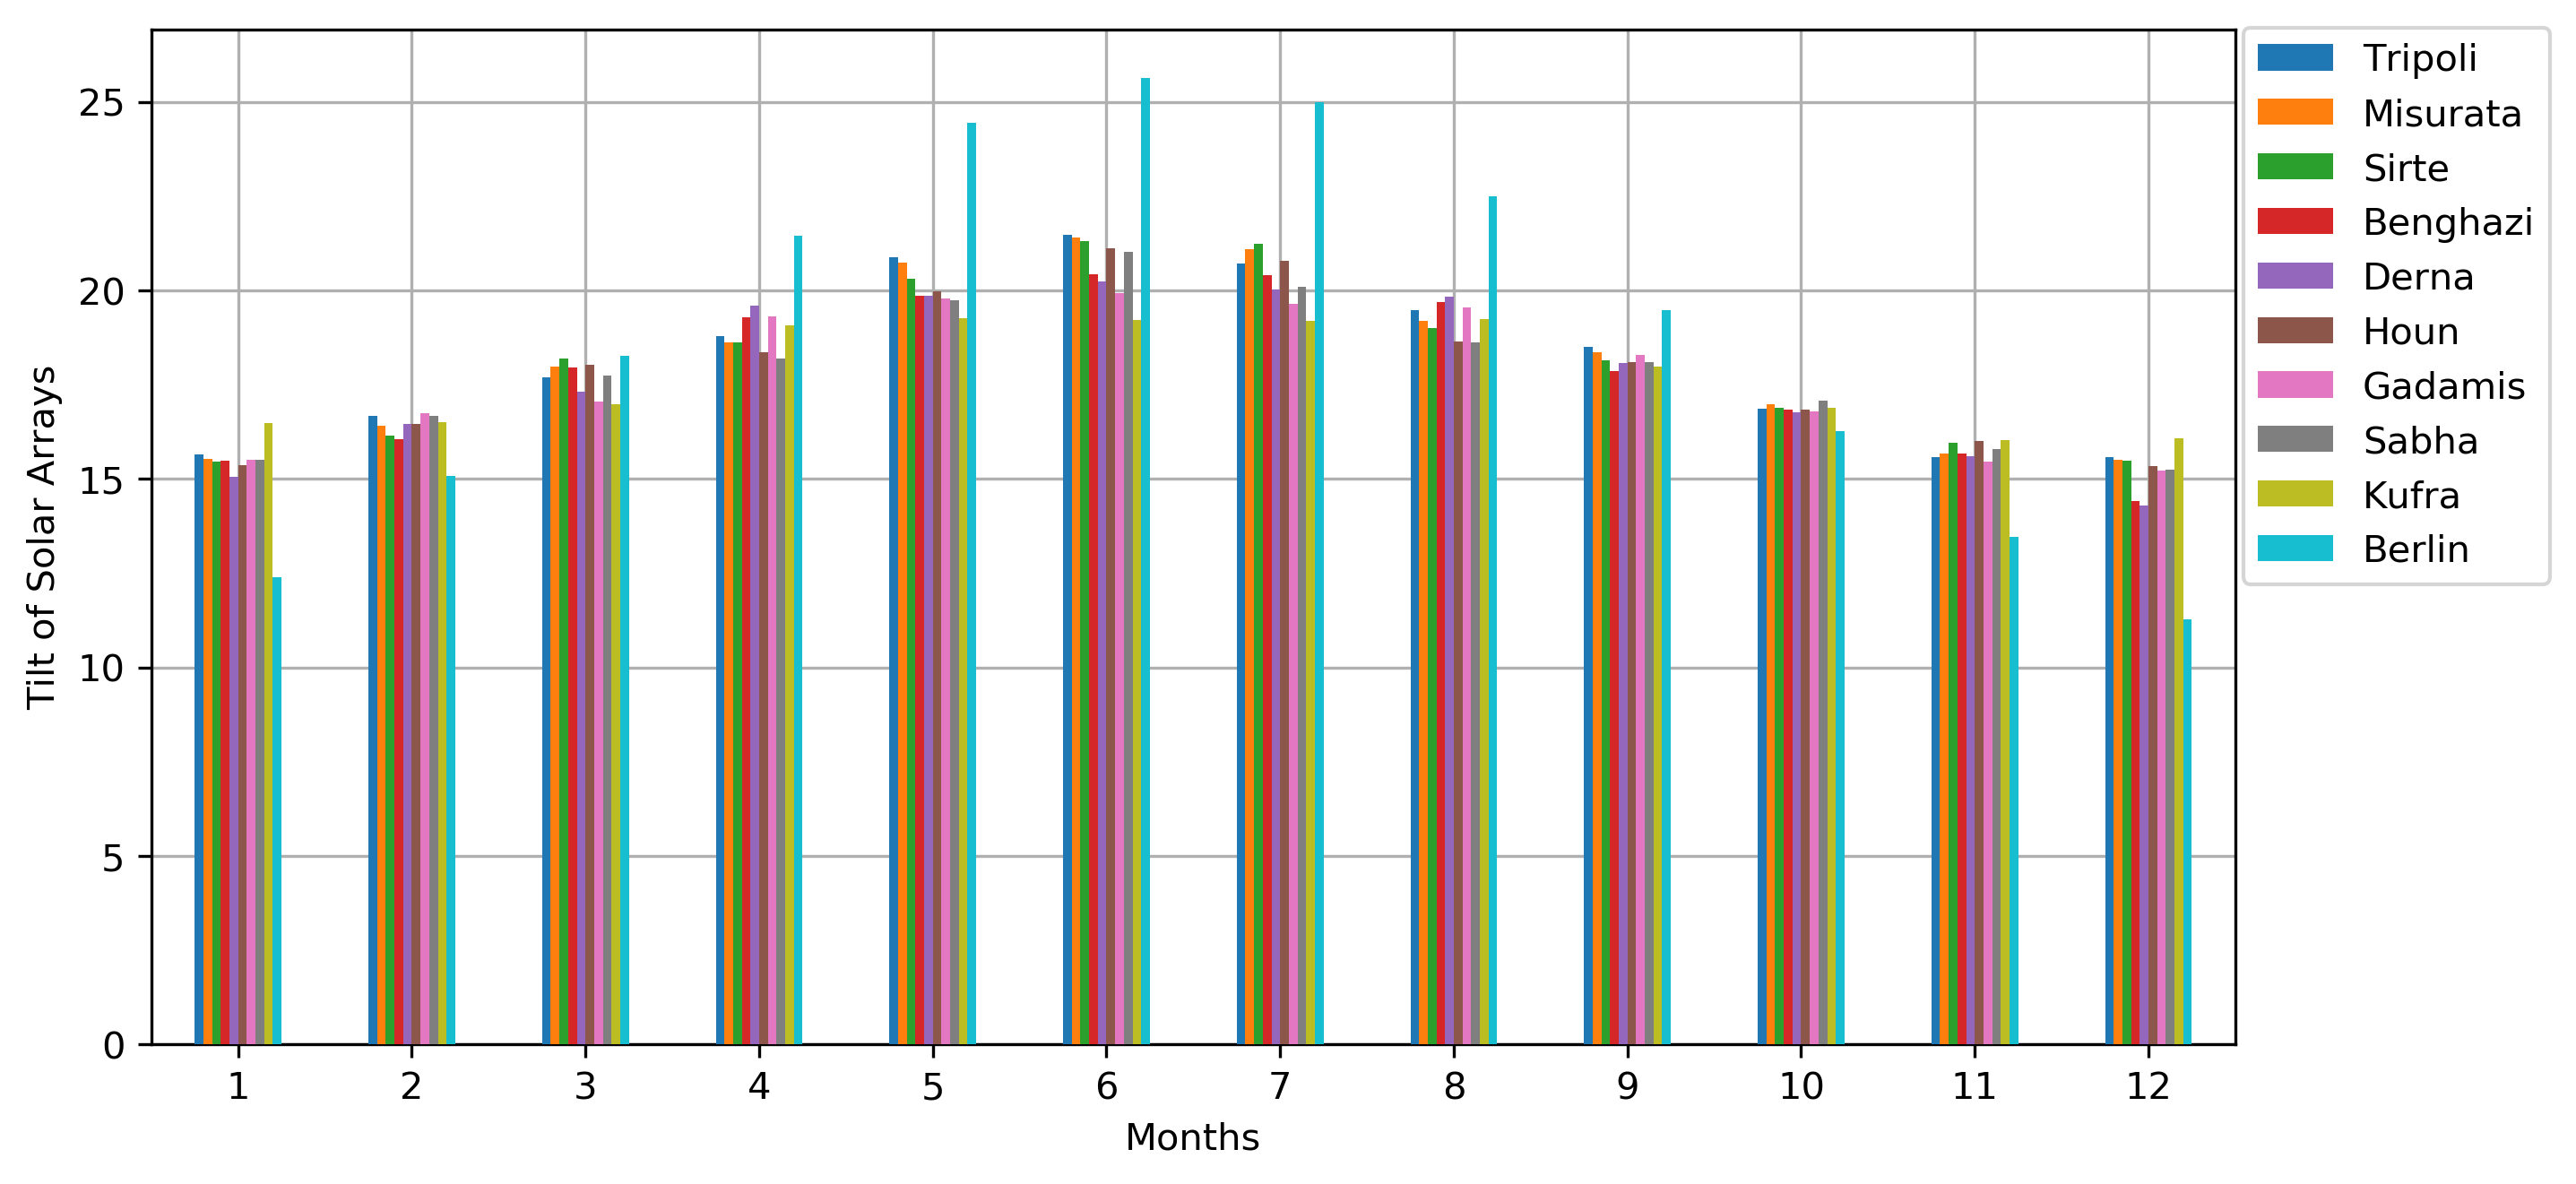

In [92]:
plt.rcParams['figure.figsize'] = [10, 5.0]
plt.rcParams['figure.dpi'] = 300

tilt_comparison_and_Berlin.plot.bar(zorder=3)
# plt.yticks(np.arange(0, 1, 0.1))

plt.xticks(rotation=0)
plt.xlabel('Months');
plt.ylabel('Tilt of Solar Arrays');
plt.legend(bbox_to_anchor=(1.16, 1.02),loc='upper right')
# plt.legend(bbox_to_anchor=(1.04, 1.03),loc='upper right')

plt.grid()

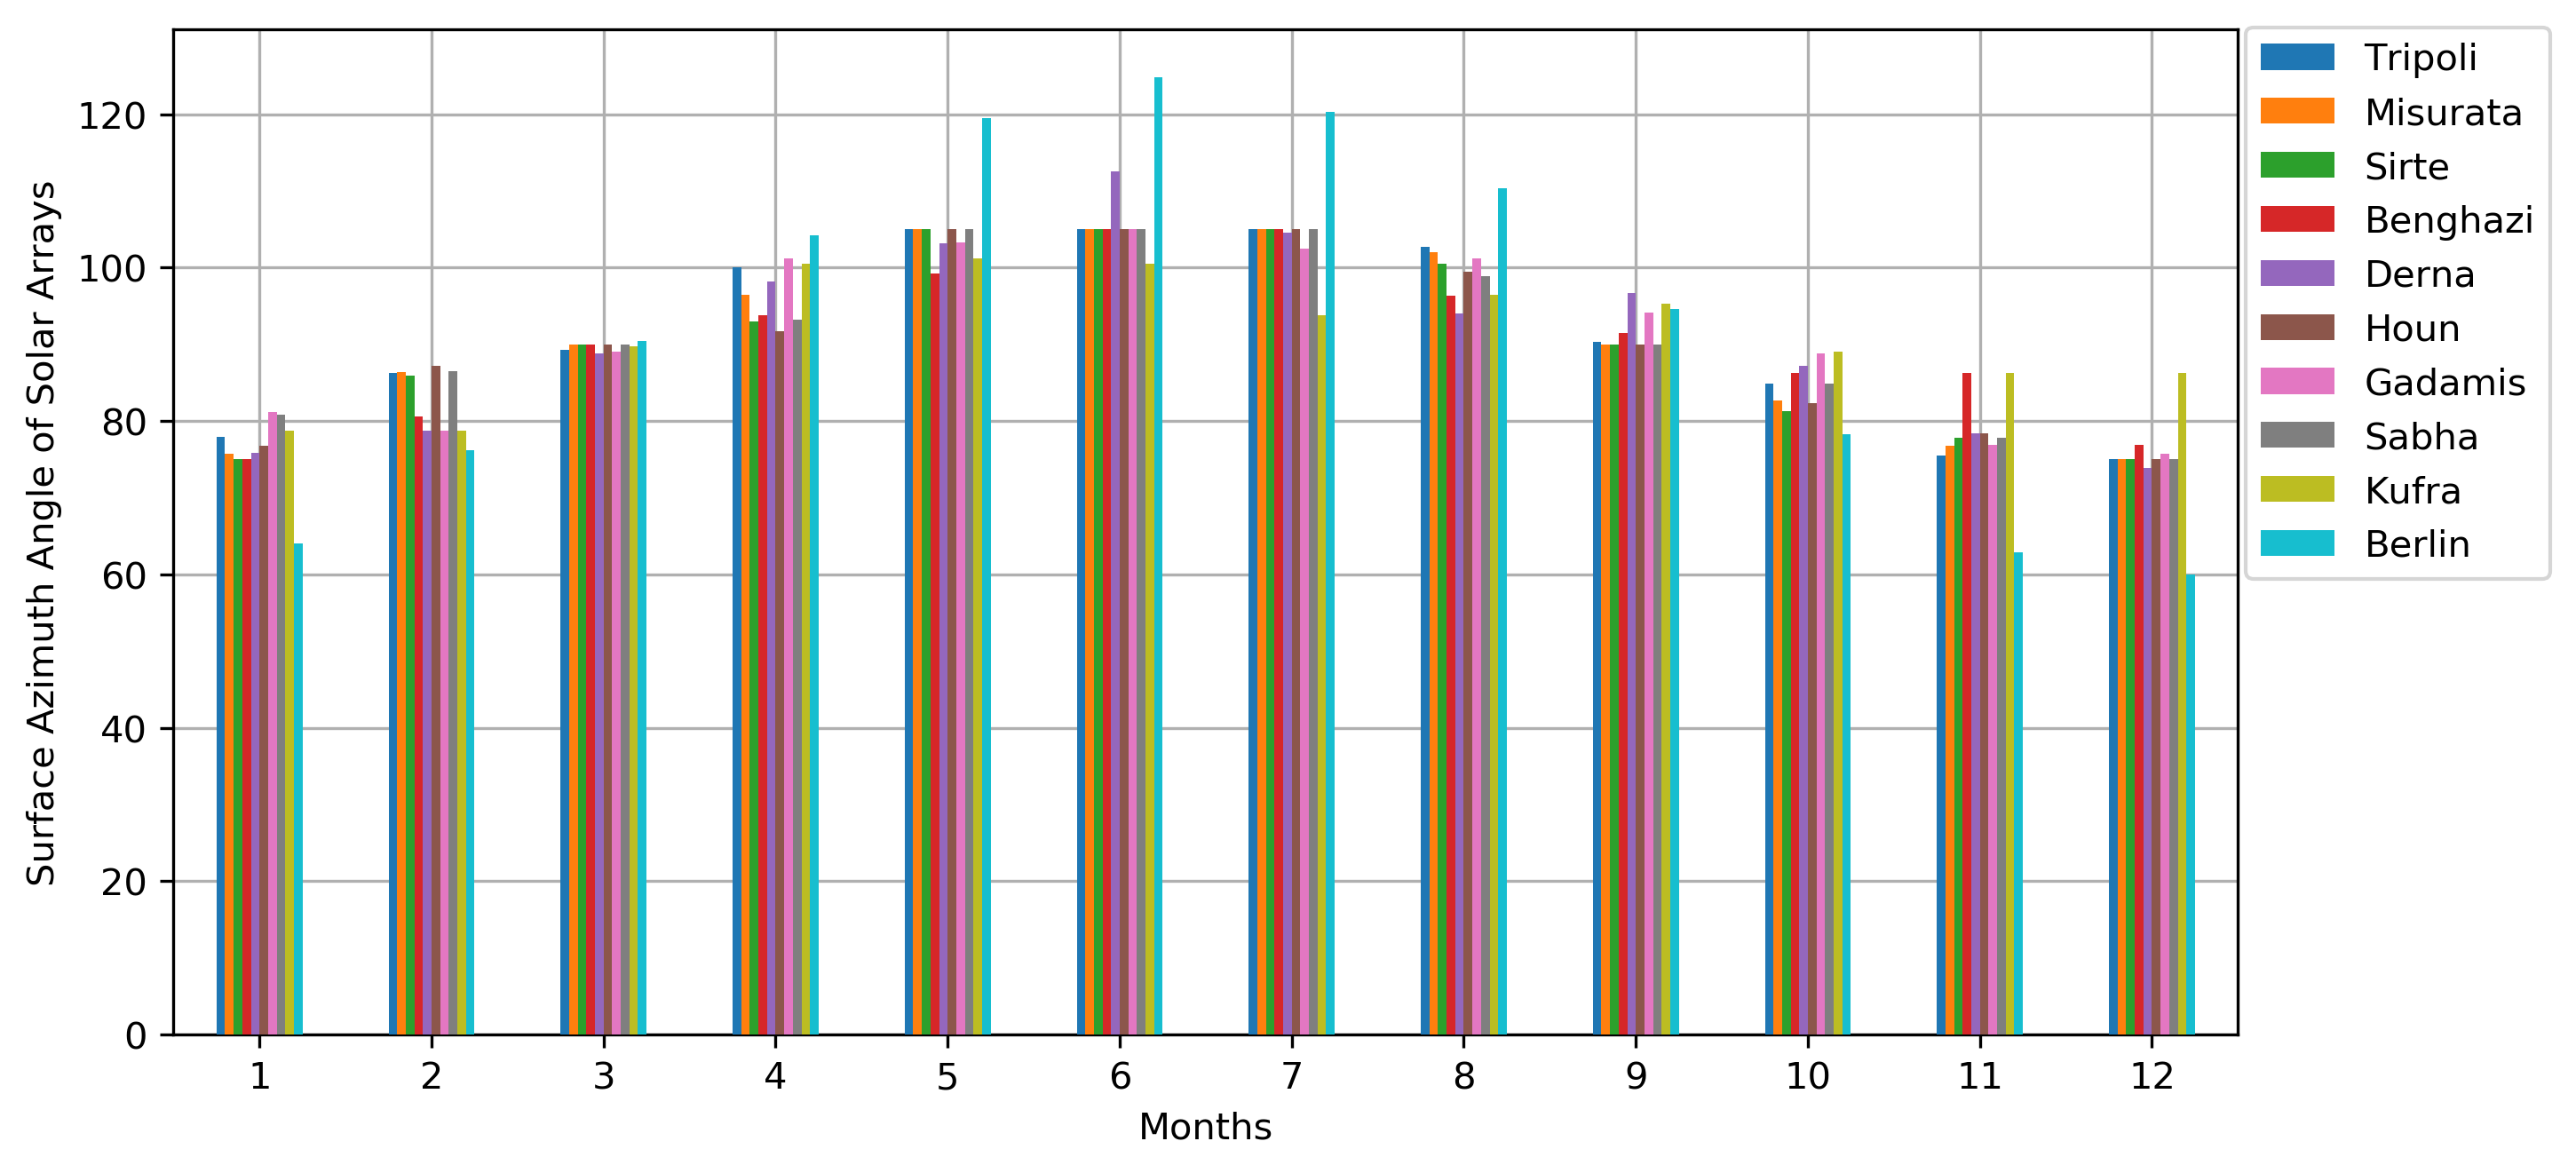

In [93]:
plt.rcParams['figure.figsize'] = [10, 5.0]
plt.rcParams['figure.dpi'] = 300

surface_azimuth_comparison_and_Berlin.plot.bar(zorder=3)
# plt.yticks(np.arange(0, 1, 0.1))

plt.xticks(rotation=0)
plt.xlabel('Months');
plt.ylabel('Surface Azimuth Angle of Solar Arrays');
plt.legend(bbox_to_anchor=(1.16, 1.02),loc='upper right')
# plt.legend(bbox_to_anchor=(1.04, 1.03),loc='upper right')

plt.grid()

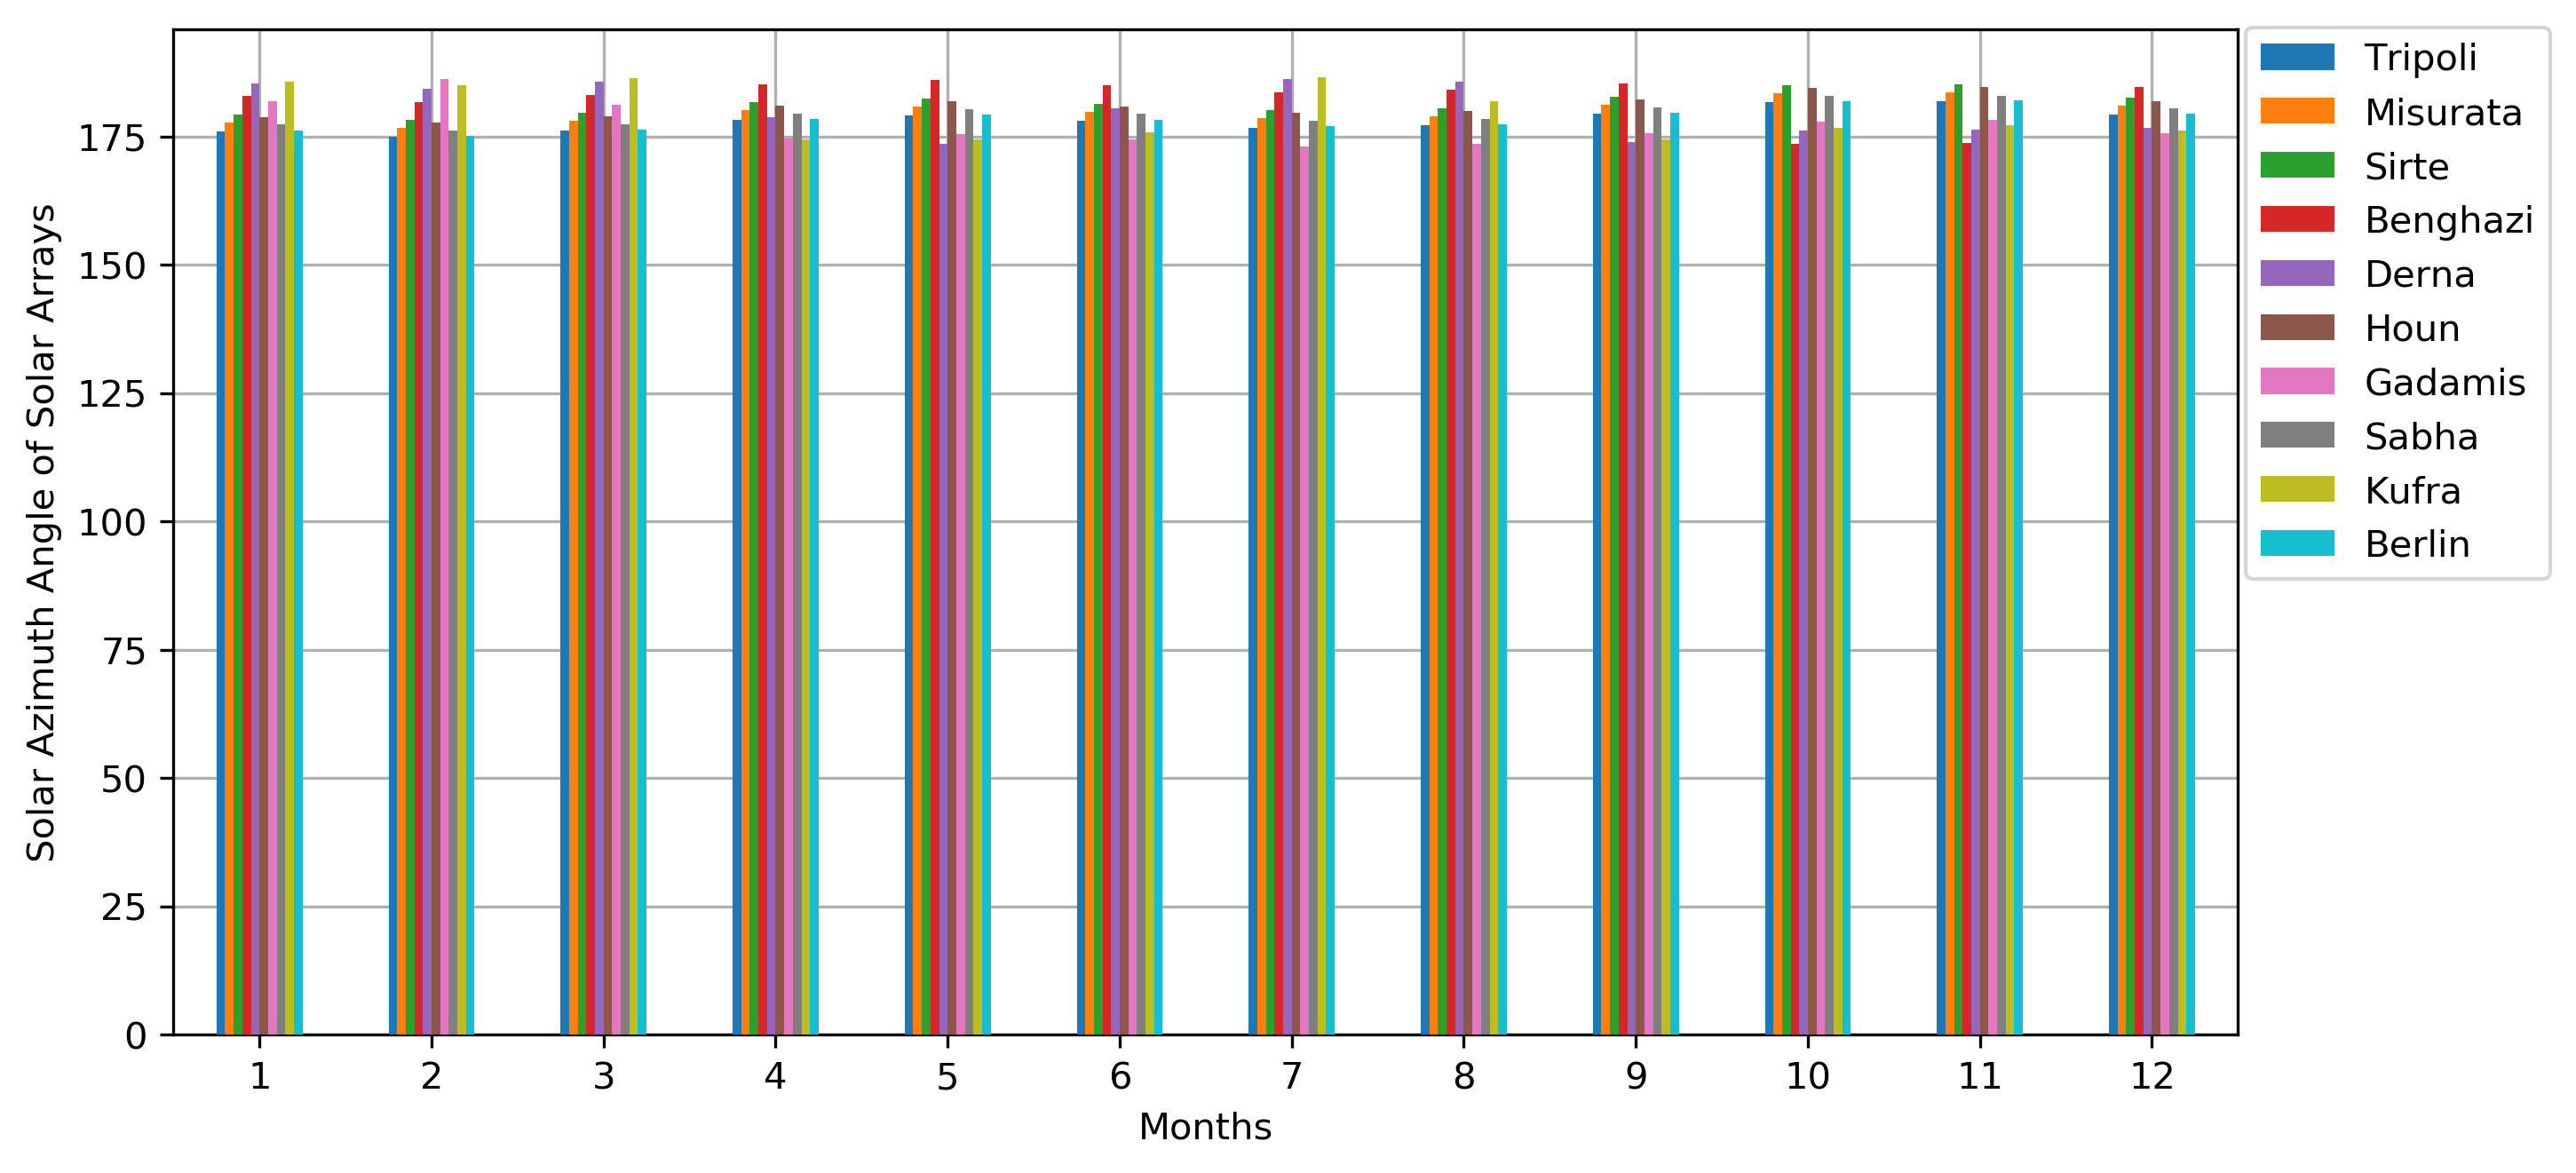

In [94]:
plt.rcParams['figure.figsize'] = [10, 5.0]
plt.rcParams['figure.dpi'] = 300

solar_azimuth_comparison_and_Berlin.plot.bar(zorder=3)
# plt.yticks(np.arange(0, 1, 0.1))

plt.xticks(rotation=0)
plt.xlabel('Months');
plt.ylabel('Solar Azimuth Angle of Solar Arrays');
plt.legend(bbox_to_anchor=(1.16, 1.02),loc='upper right')
# plt.legend(bbox_to_anchor=(1.04, 1.03),loc='upper right')

plt.grid()

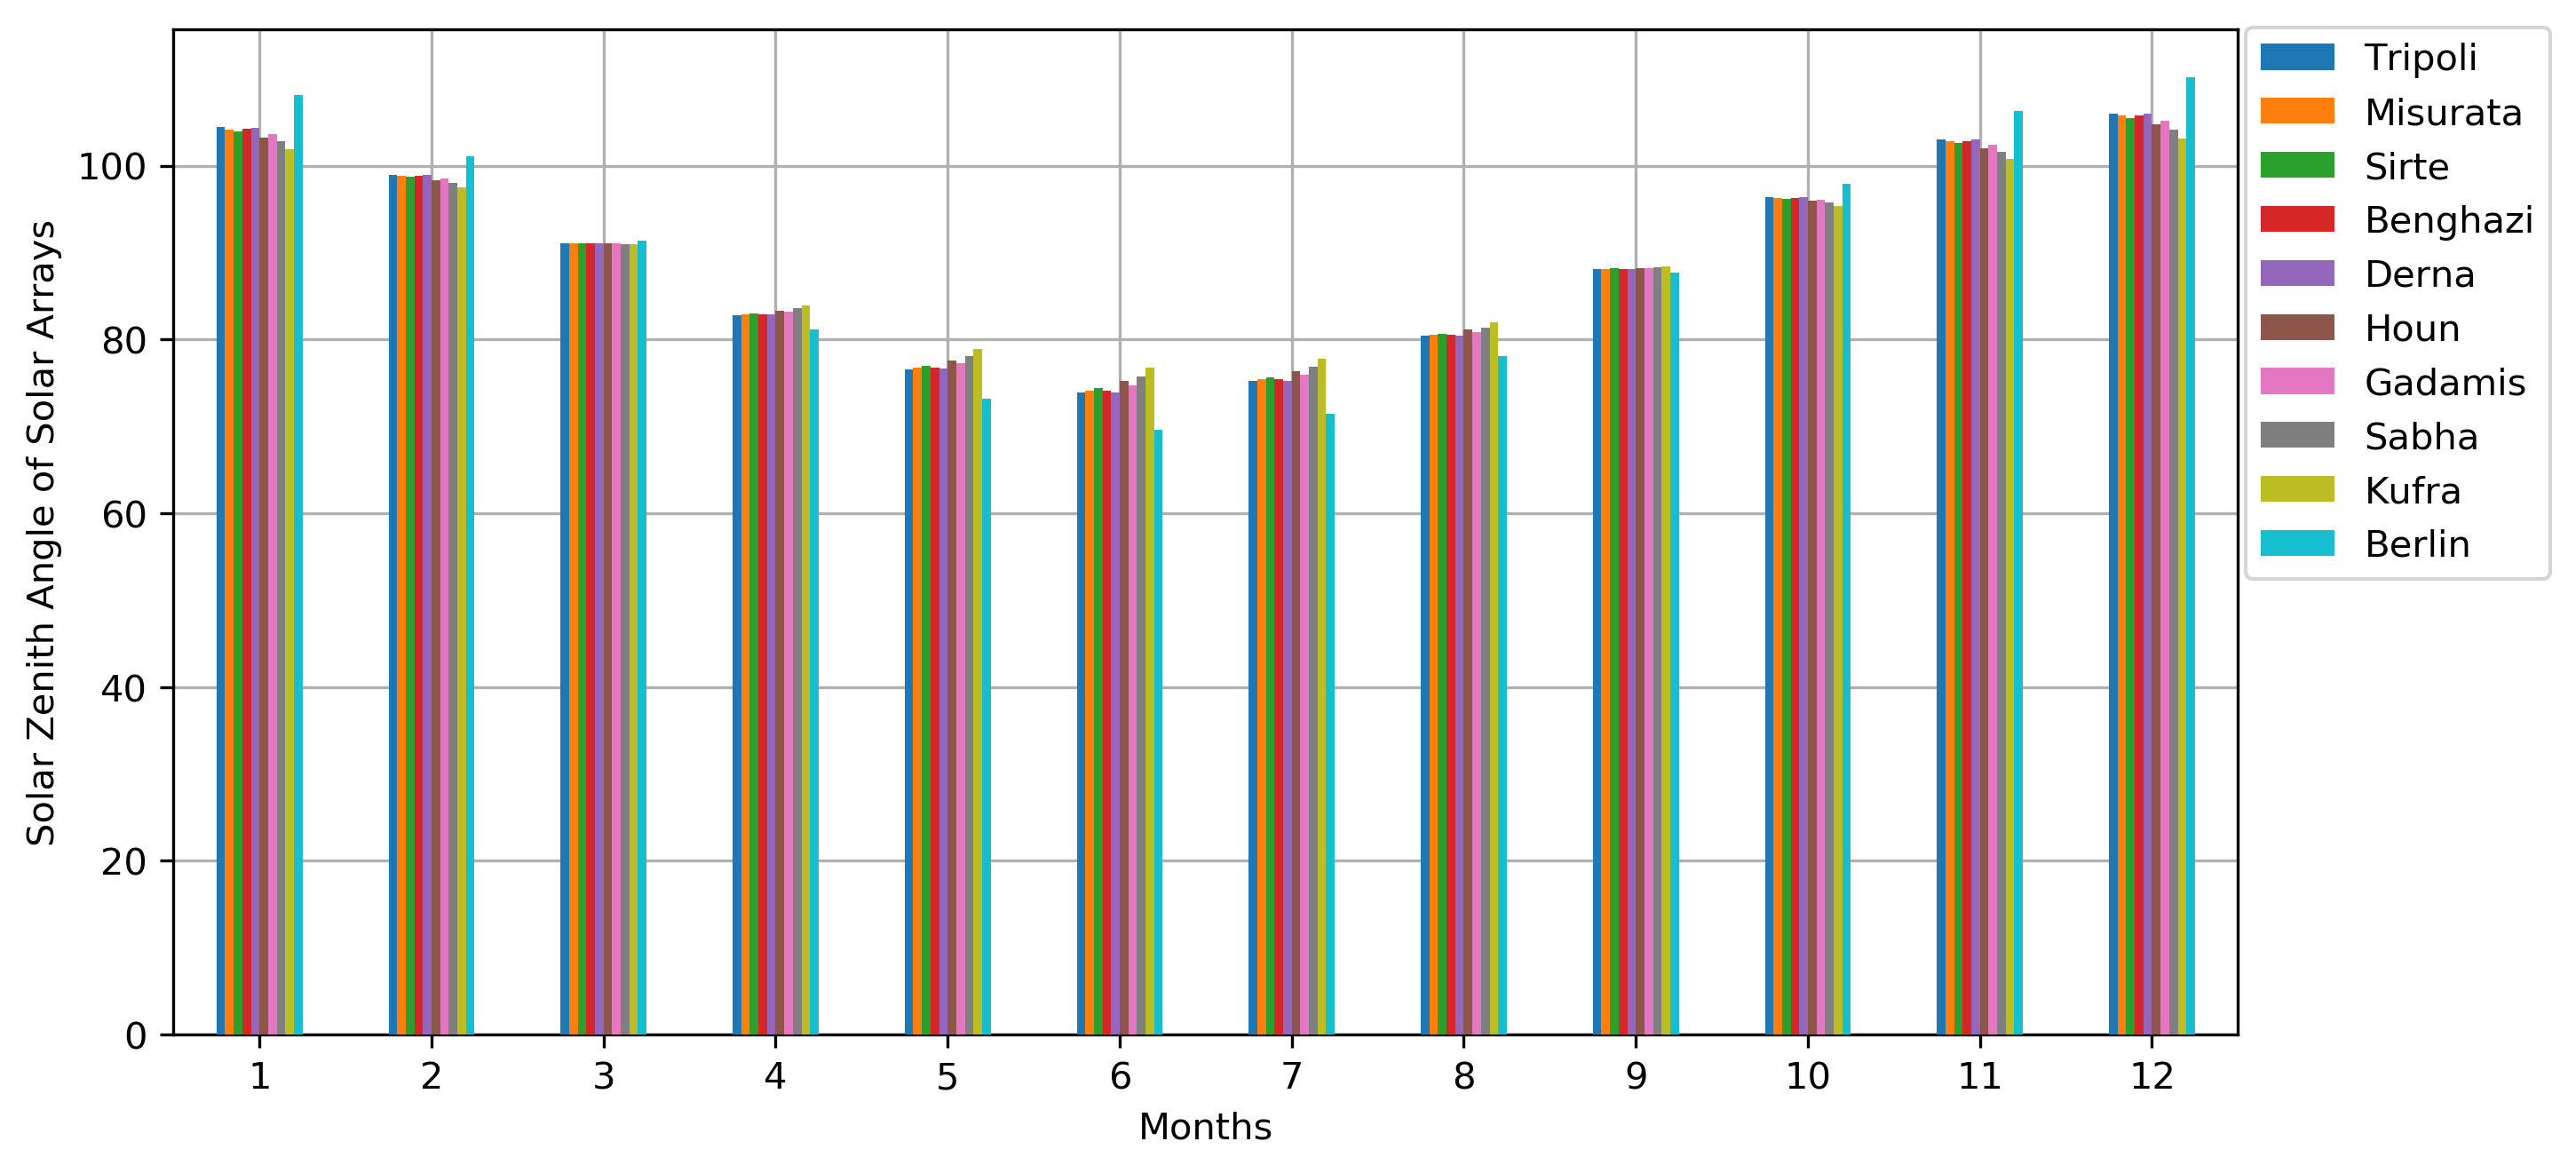

In [95]:
plt.rcParams['figure.figsize'] = [10, 5.0]
plt.rcParams['figure.dpi'] = 300

solar_zenith_comparison_and_Berlin.plot.bar(zorder=3)
# plt.yticks(np.arange(0, 1, 0.1))

plt.xticks(rotation=0)
plt.xlabel('Months');
plt.ylabel('Solar Zenith Angle of Solar Arrays');
plt.legend(bbox_to_anchor=(1.16, 1.02),loc='upper right')
# plt.legend(bbox_to_anchor=(1.04, 1.03),loc='upper right')

plt.grid()

In [96]:
tilt_comparison_and_Berlin.mean()

Tripoli     18.151714
Misurata    18.119038
Sirte       18.062335
Benghazi    17.823561
Derna       17.758093
Houn        17.916950
Gadamis     17.770342
Sabha       17.811866
Kufra       17.742777
Berlin      18.767128
dtype: float64

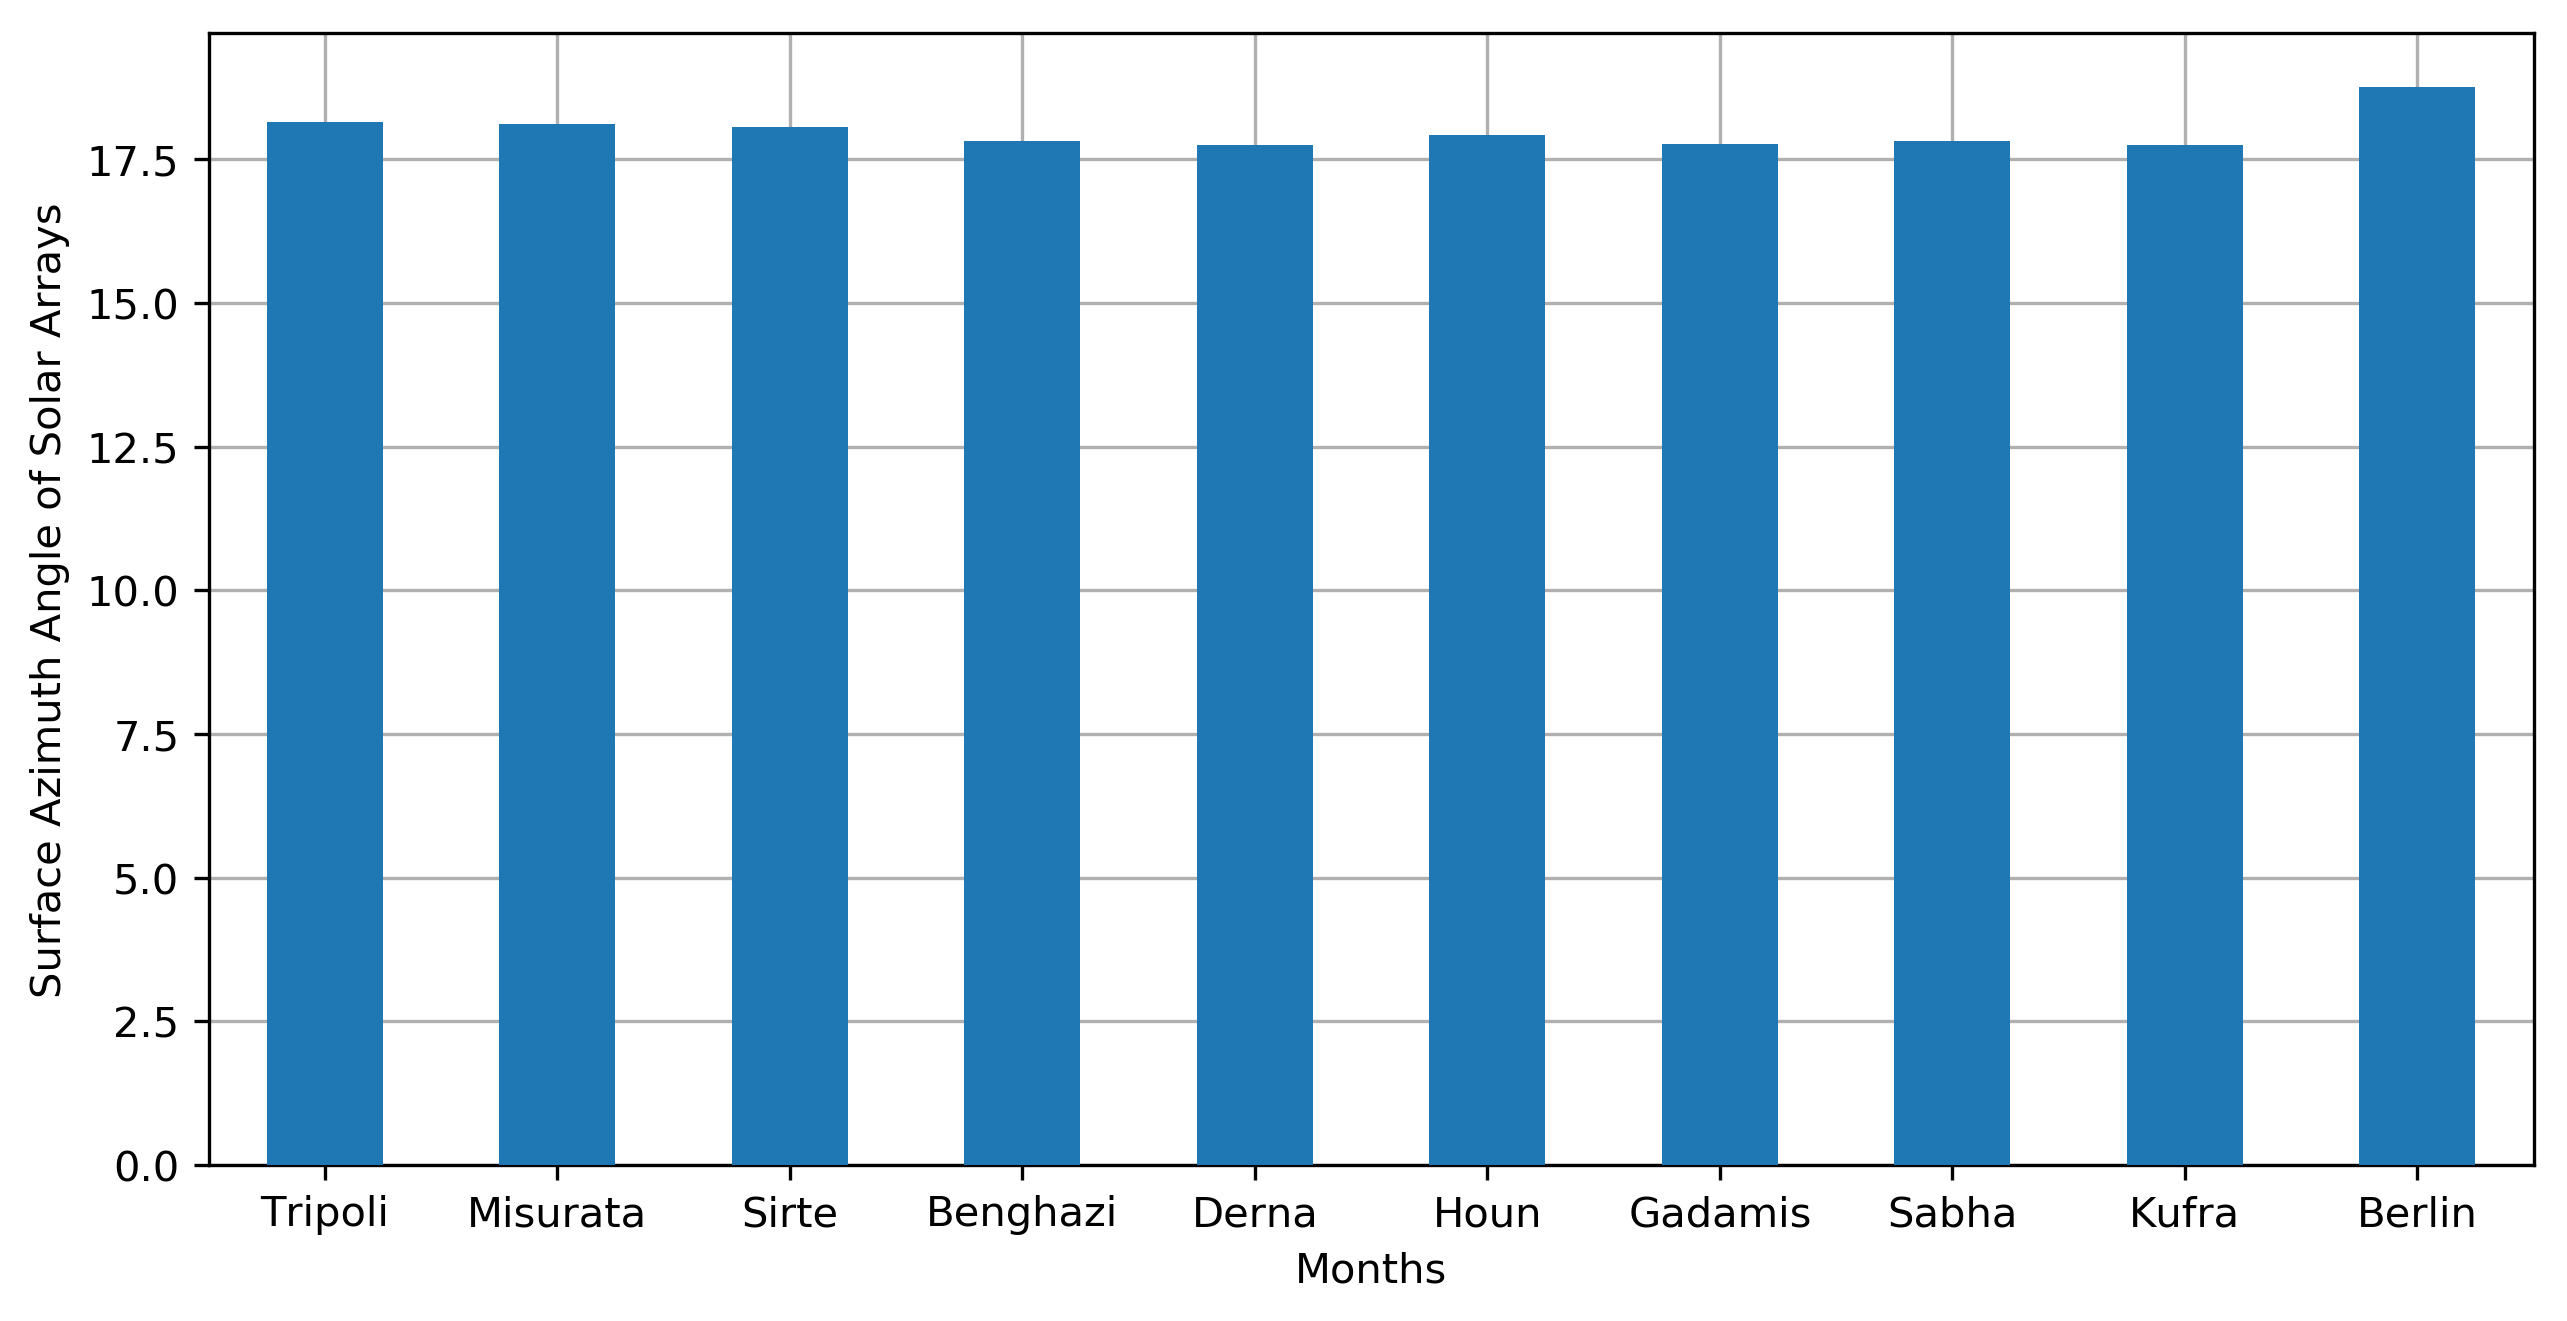

In [97]:
plt.rcParams['figure.figsize'] = [10, 5.0]
plt.rcParams['figure.dpi'] = 300

tilt_comparison_and_Berlin.mean().plot.bar(zorder=3)
# plt.yticks(np.arange(0, 1, 0.1))

plt.xticks(rotation=0)
plt.xlabel('Months');
plt.ylabel('Surface Azimuth Angle of Solar Arrays');
# plt.legend(bbox_to_anchor=(1.16, 1.02),loc='upper right')
# plt.legend(bbox_to_anchor=(1.04, 1.03),loc='upper right')

plt.grid()

In [98]:
solar_azimuth_comparison_and_Berlin.mean()

Tripoli     178.173451
Misurata    179.987931
Sirte       181.550566
Benghazi    182.360694
Derna       180.203590
Houn        180.942808
Gadamis     177.275132
Sabha       179.434118
Kufra       179.531960
Berlin      178.392513
dtype: float64

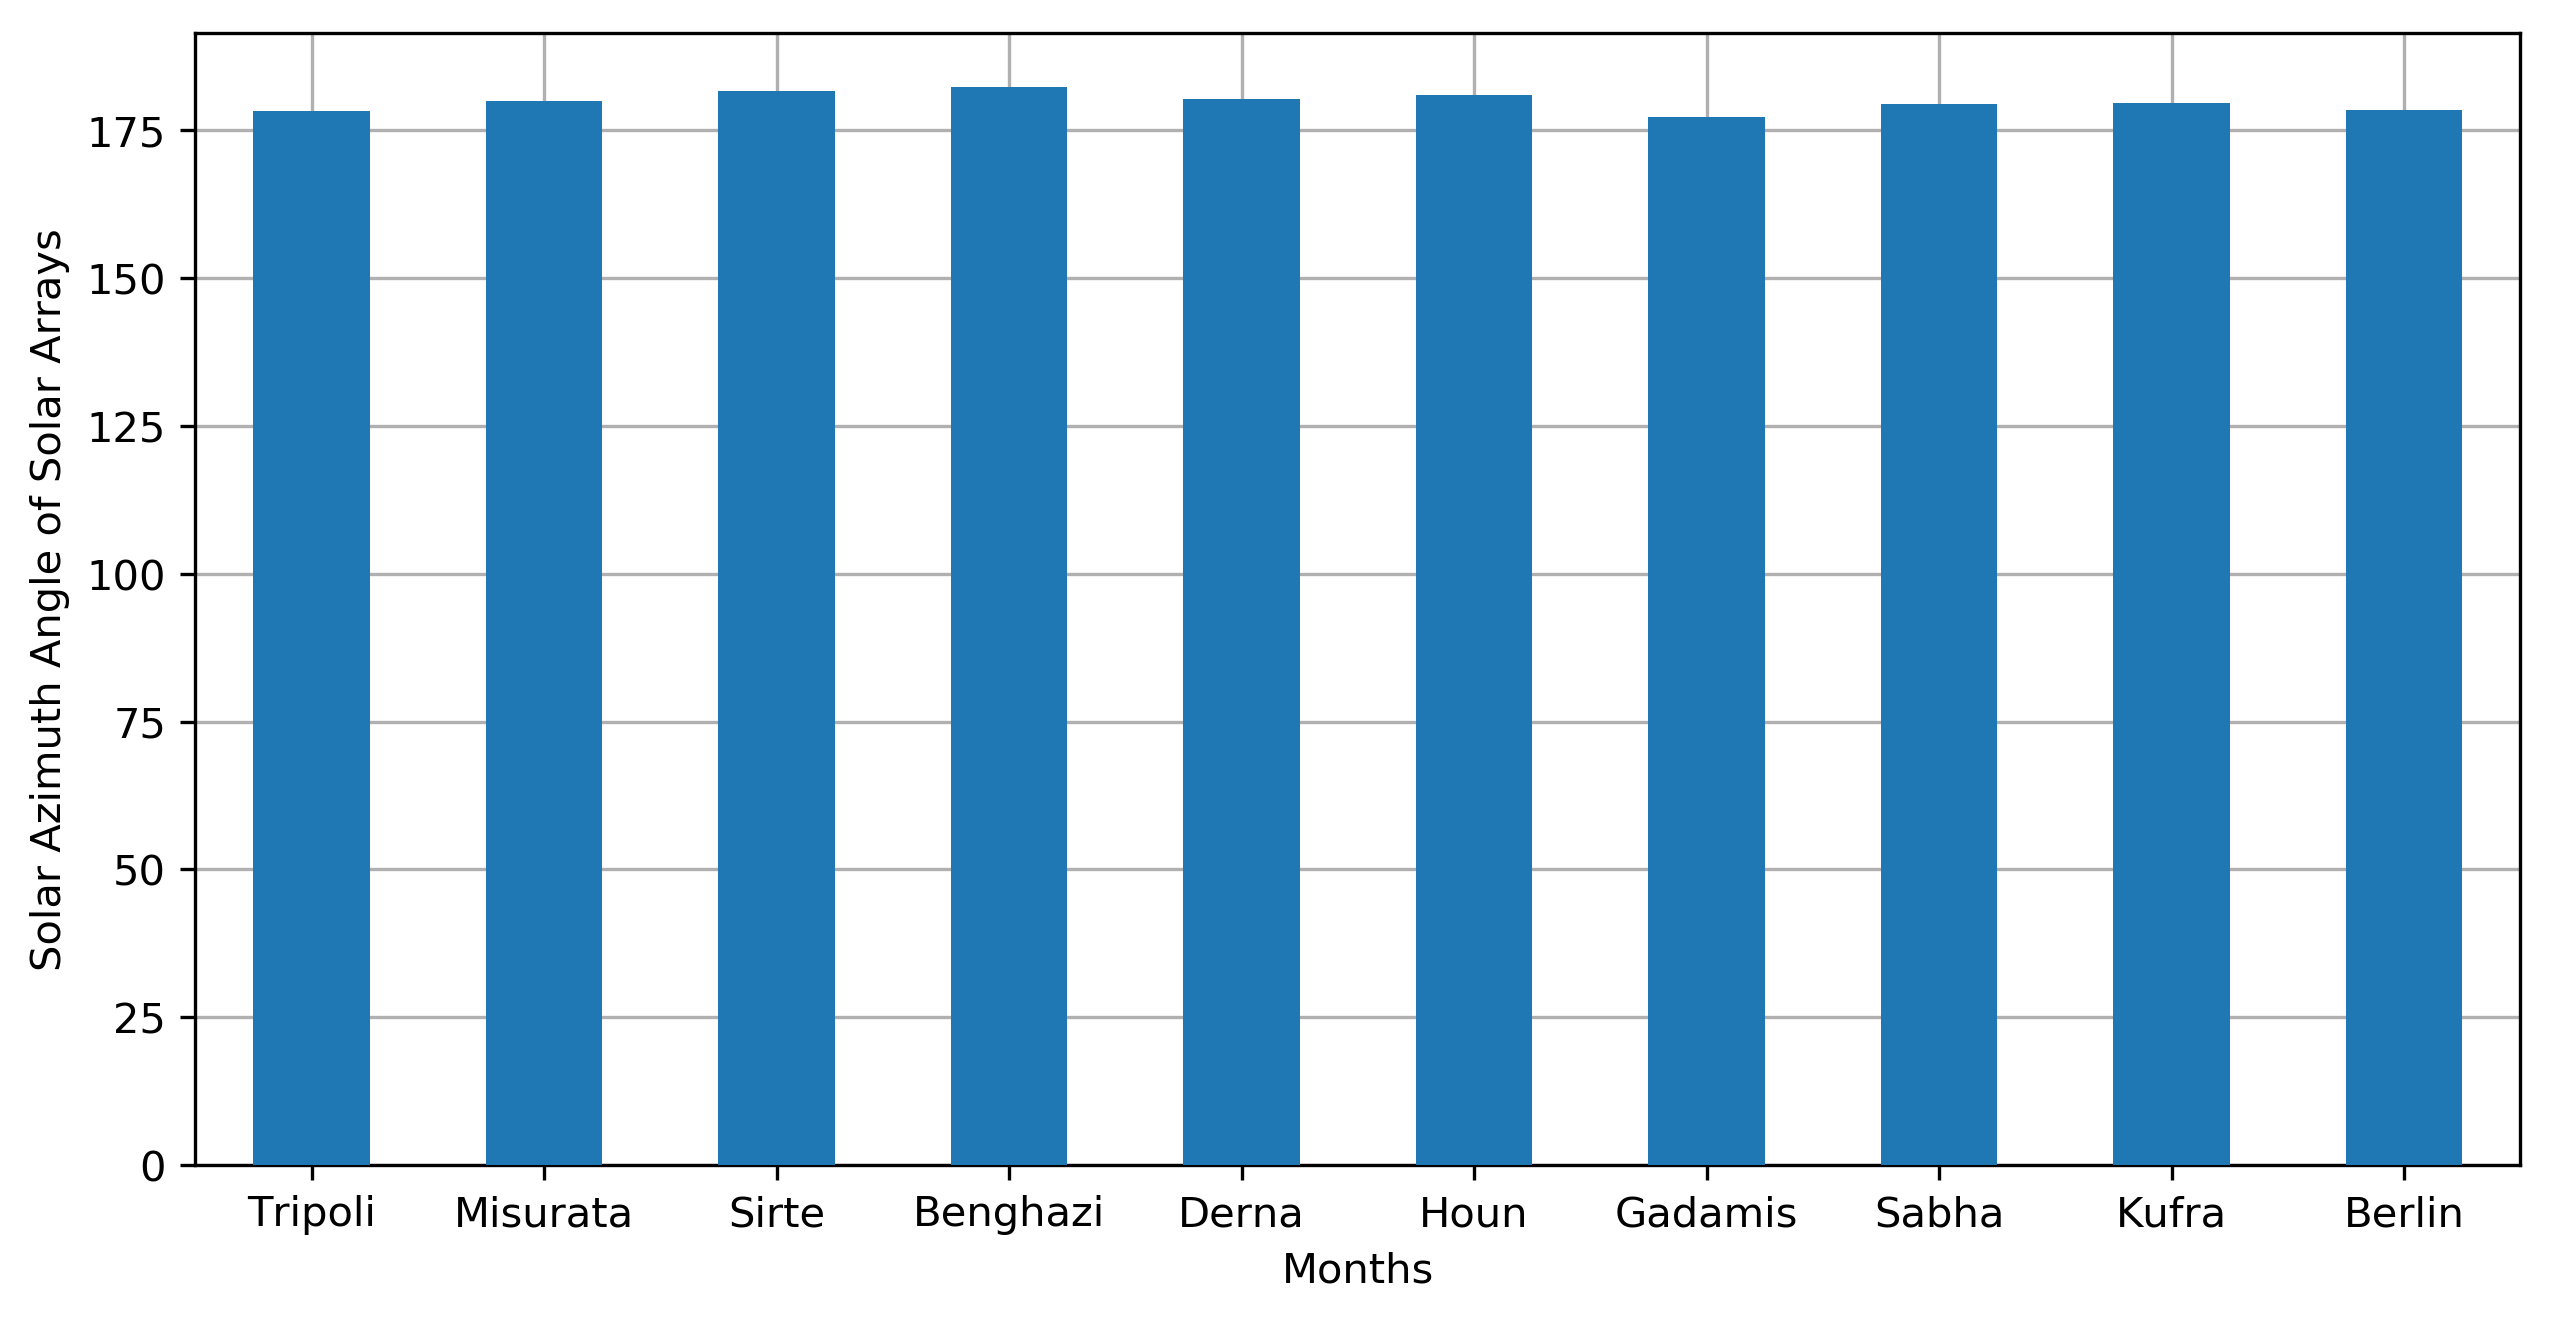

In [99]:
plt.rcParams['figure.figsize'] = [10, 5.0]
plt.rcParams['figure.dpi'] = 300

solar_azimuth_comparison_and_Berlin.mean().plot.bar(zorder=3)
# plt.yticks(np.arange(0, 1, 0.1))

plt.xticks(rotation=0)
plt.xlabel('Months');
plt.ylabel('Solar Azimuth Angle of Solar Arrays');
# plt.legend(bbox_to_anchor=(1.16, 1.02),loc='upper right')
# plt.legend(bbox_to_anchor=(1.04, 1.03),loc='upper right')

plt.grid()

In [100]:
df_Mis['tilt'].mean()
df_Mis['azimuth'].mean()  ###Surface Azimuth

90.86301369863014

In [101]:
df_angles=pd.DataFrame({'Tilt':df_Mis['tilt'],'Surface Azimuth':df_Mis['azimuth'],'Solar Azimuth':df_Mis['solar_azimuth'],'Solar Zenith':df_Mis['solar_zenith']})
df_angles.describe()

Tilt  Surface Azimuth  Solar Azimuth  Solar Zenith
count  8760.000000      8760.000000    8760.000000   8760.000000
mean     18.128860        90.863014     180.002379     89.702219
std      23.512816       110.405989      99.443708     40.025235
min       0.000000         0.000000       6.917526     10.523995
25%       0.000000         0.000000      89.574493     56.806248
50%       2.220210        90.000000     180.403588     89.140909
75%      35.357944       270.000000     270.385792    122.325215
max      73.365816       270.000000     352.160204    169.674094